In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_excel('/content/drive/MyDrive/Clustering Clean Ads_Data-2.xlsx')

In [5]:
df.head()

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0  2020-9-2-17       Format1          300        250    75000  Inter222   
1  2020-9-2-10       Format1          300        250    75000  Inter227   
2  2020-9-1-22       Format1          300        250    75000  Inter222   
3  2020-9-3-20       Format1          300        250    75000  Inter228   
4  2020-9-4-15       Format1          300        250    75000  Inter217   

  Platform Device Type   Format  Available_Impressions  Matched_Queries  \
0    Video     Desktop  Display                   1806              325   
1      App      Mobile    Video                   1780              285   
2    Video     Desktop  Display                   2727              356   
3    Video      Mobile    Video                   2430              497   
4      Web     Desktop    Video                   1218              242   

   Impressions  Clicks  Spend   Fee  Revenue     CTR  CPM  CPC  
0          323       1    0.0  0.35      0.0  0.0031  0.0  0.0  
1          285       1    0.0  0.35      0.0  0.0035  0.0  0.0  
2          355       1    0.0  0.35      0.0  0.0028  0.0  0.0  
3          495       1    0.0  0.35      0.0  0.0020  0.0  0.0  
4          242       1    0.0  0.35      0.0  0.0041  0.0  0.0

In [6]:
df.tail()

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
23061   2020-9-13-7       Format5          720        300   216000  Inter220   
23062   2020-11-2-7       Format5          720        300   216000  Inter224   
23063  2020-9-14-22       Format5          720        300   216000  Inter218   
23064  2020-11-18-2       Format4          120        600    72000  inter230   
23065   2020-9-14-0       Format5          720        300   216000  Inter221   

      Platform Device Type Format  Available_Impressions  Matched_Queries  \
23061      Web      Mobile  Video                      1                1   
23062      Web     Desktop  Video                      3                2   
23063      App      Mobile  Video                      2                1   
23064    Video      Mobile  Video                      7                1   
23065      App      Mobile  Video                      2                2   

       Impressions  Clicks  Spend   Fee  Revenue  CTR  CPM  CPC  
23061            1       1   0.07  0.35   0.0455  NaN  NaN  NaN  
23062            2       1   0.04  0.35   0.0260  NaN  NaN  NaN  
23063            1       1   0.05  0.35   0.0325  NaN  NaN  NaN  
23064            1       1   0.07  0.35   0.0455  NaN  NaN  NaN  
23065            2       1   0.09  0.35   0.0585  NaN  NaN  NaN

In [7]:
df.shape

(23066, 19)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [9]:
df.describe()

Ad - Length     Ad- Width        Ad Size  Available_Impressions  \
count  23066.000000  23066.000000   23066.000000           2.306600e+04   
mean     385.163097    337.896037   96674.468048           2.432044e+06   
std      233.651434    203.092885   61538.329557           4.742888e+06   
min      120.000000     70.000000   33600.000000           1.000000e+00   
25%      120.000000    250.000000   72000.000000           3.367225e+04   
50%      300.000000    300.000000   72000.000000           4.837710e+05   
75%      720.000000    600.000000   84000.000000           2.527712e+06   
max      728.000000    600.000000  216000.000000           2.759286e+07   

       Matched_Queries   Impressions         Clicks         Spend  \
count     2.306600e+04  2.306600e+04   23066.000000  23066.000000   
mean      1.295099e+06  1.241520e+06   10678.518816   2706.625689   
std       2.512970e+06  2.429400e+06   17353.409363   4067.927273   
min       1.000000e+00  1.000000e+00       1.000000      0.000000   
25%       1.828250e+04  7.990500e+03     710.000000     85.180000   
50%       2.580875e+05  2.252900e+05    4425.000000   1425.125000   
75%       1.180700e+06  1.112428e+06   12793.750000   3121.400000   
max       1.470202e+07  1.419477e+07  143049.000000  26931.870000   

                Fee       Revenue           CTR           CPM           CPC  
count  23066.000000  23066.000000  18330.000000  18330.000000  18330.000000  
mean       0.335123   1924.252331      0.073661      7.672045      0.351061  
std        0.031963   3105.238410      0.075160      6.481391      0.343334  
min        0.210000      0.000000      0.000100      0.000000      0.000000  
25%        0.330000     55.365375      0.002600      1.710000      0.090000  
50%        0.350000    926.335000      0.082550      7.660000      0.160000  
75%        0.350000   2091.338150      0.130000     12.510000      0.570000  
max        0.350000  21276.180000      1.000000     81.560000      7.260000

In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

In [12]:
def calculate_ctr(x):
    clicks=df.Clicks
    impressions=df.Impressions
    ctr= (clicks/impressions)*100
    return ctr

In [13]:
def calculate_cpm(x):
    spend=df.Spend
    impressions=df.Impressions
    cpm= (spend/impressions)*1000
    return cpm

In [14]:
def calculate_cpc(x):
    spend=df.Spend
    clicks=df.Clicks
    cpc= (spend/clicks)
    return cpc

In [15]:
df['CTR']= df[['CTR']].apply(lambda x: calculate_ctr(x))
df['CPM']= df[['CPM']].apply(lambda x: calculate_cpm(x))
df['CPC']= df[['CPC']].apply(lambda x: calculate_cpc(x))

In [16]:
df.isnull().sum()

Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

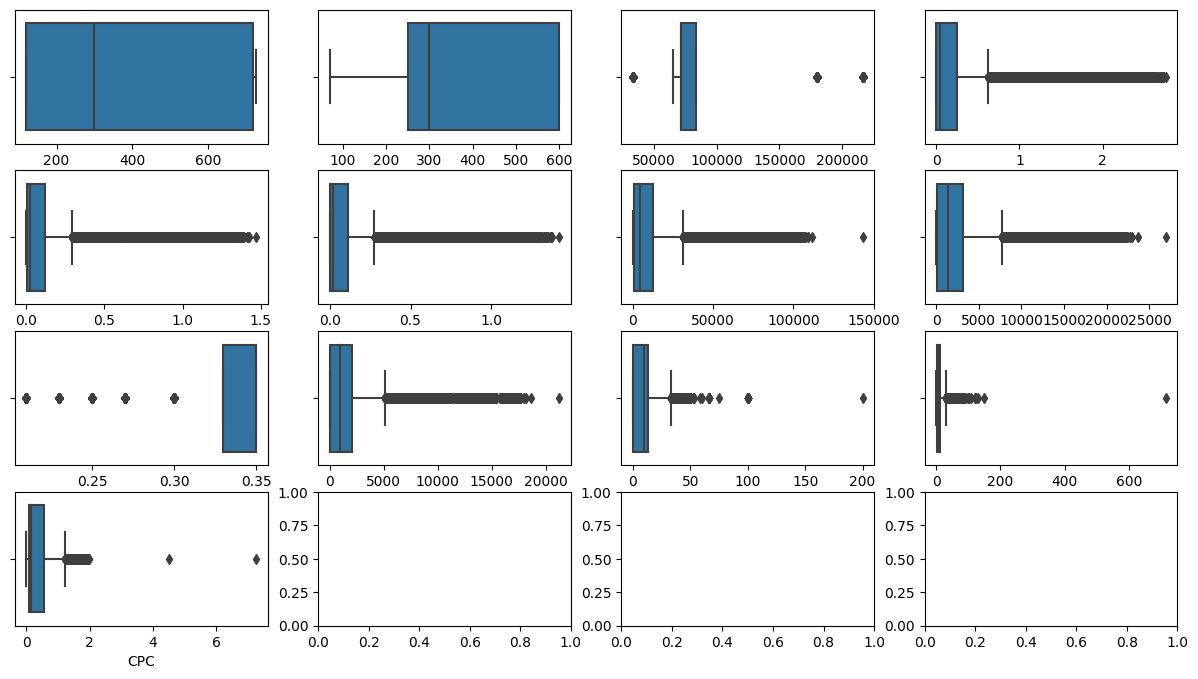

In [17]:
fig, axes = plt.subplots(nrows=4,ncols=4)
fig.set_size_inches(15,8)
sns.boxplot(data=df,x='Ad - Length', ax=axes[0][0])
sns.boxplot(data =df,x='Ad- Width', ax=axes[0][1])
sns.boxplot(data =df,x='Ad Size', ax=axes[0][2])
sns.boxplot(data =df,x='Available_Impressions', ax=axes[0][3])
sns.boxplot(data =df,x='Matched_Queries', ax=axes[1][0])
sns.boxplot(data =df,x='Impressions', ax=axes[1][1])
sns.boxplot(data =df,x='Clicks', ax=axes[1][2])
sns.boxplot(data =df,x='Spend', ax=axes[1][3])
sns.boxplot(data =df,x='Fee', ax=axes[2][0])
sns.boxplot(data =df,x='Revenue', ax=axes[2][1])
sns.boxplot(data =df,x='CTR', ax=axes[2][2])
sns.boxplot(data =df,x='CPM', ax=axes[2][3])
sns.boxplot(data =df,x='CPC', ax=axes[3][0])
plt.show()

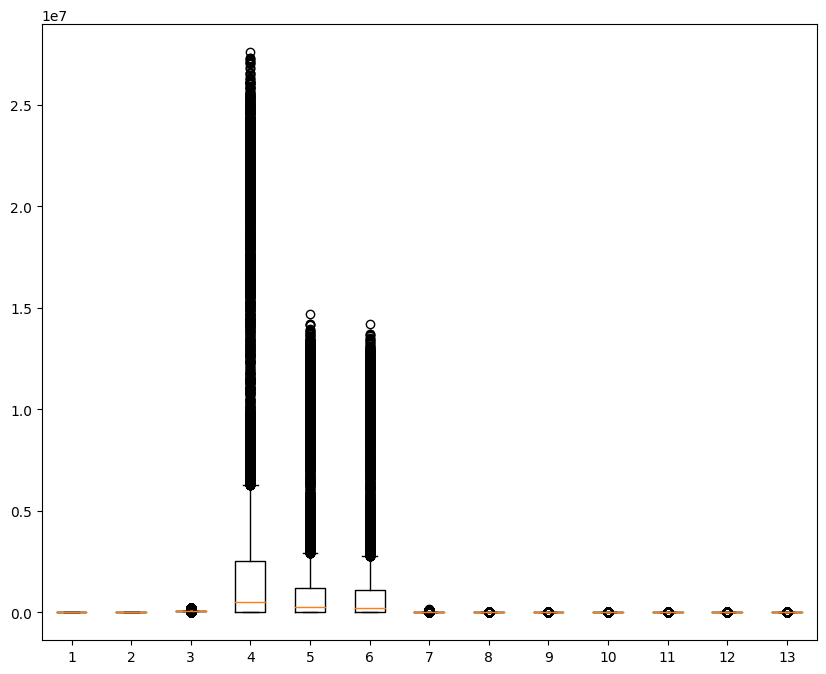

In [18]:
num_df = ['Ad - Length','Ad- Width','Ad Size','Available_Impressions','Matched_Queries','Impressions','Clicks','Spend','Fee','Revenue','CTR','CPM','CPC']
fig, ax = plt.subplots(figsize=(10, 8))
boxplots = ax.boxplot(df[num_df])
plt.show()

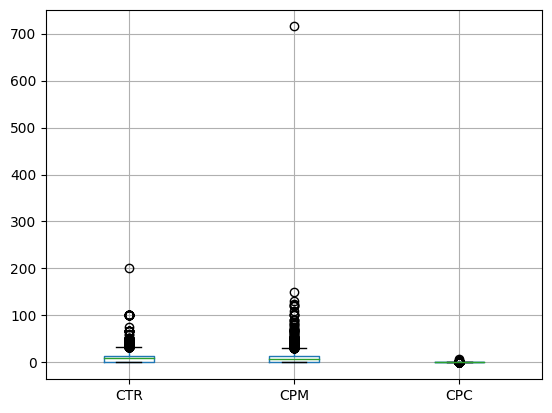

In [19]:
df.boxplot(column=['CTR','CPM','CPC'])
plt.show()

In [20]:
def remove_outliers(col):
  sorted(col)
  Q1, Q3=np.percentile(col,[25,75])
  IQR = Q3-Q1
  lower_range = Q1-(1.5*IQR)
  upper_range = Q3+(1.5*IQR)
  return lower_range, upper_range

In [21]:
lr,ur=remove_outliers(df['Ad - Length'])
lr1,ur1=remove_outliers(df['Ad- Width'])
lr2,ur2=remove_outliers(df['Ad Size'])
lr3,ur3=remove_outliers(df['Available_Impressions'])
lr4,ur4=remove_outliers(df['Matched_Queries'])
lr5,ur5=remove_outliers(df['Impressions'])
lr6,ur6=remove_outliers(df['Clicks'])
lr7,ur7=remove_outliers(df['Spend'])
lr8,ur8=remove_outliers(df['Fee'])
lr9,ur9=remove_outliers(df['Revenue'])
lr10,ur10=remove_outliers(df['CTR'])
lr11,ur11=remove_outliers(df['CPM'])
lr12,ur12=remove_outliers(df['CPC'])

In [22]:
df['Ad - Length']=np.where(df['Ad - Length'] > ur,ur,df['Ad - Length'])
df['Ad - Length']=np.where(df['Ad - Length'] < lr,lr,df['Ad - Length'])
df['Ad- Width']=np.where(df['Ad- Width'] > ur1,ur1,df['Ad- Width'])
df['Ad- Width']=np.where(df['Ad- Width'] < lr1,lr1,df['Ad- Width'])
df['Ad Size']=np.where(df['Ad Size'] > ur2,ur2,df['Ad Size'])
df['Ad Size']=np.where(df['Ad Size'] < lr2,lr2,df['Ad Size'])
df['Available_Impressions']=np.where(df['Available_Impressions'] > ur3,ur3,df['Available_Impressions'])
df['Available_Impressions']=np.where(df['Available_Impressions'] < lr3,lr3,df['Available_Impressions'])
df['Matched_Queries']=np.where(df['Matched_Queries'] > ur4,ur4,df['Matched_Queries'])
df['Matched_Queries']=np.where(df['Matched_Queries'] < lr4,lr4,df['Matched_Queries'])
df['Impressions']=np.where(df['Impressions'] > ur5,ur5,df['Impressions'])
df['Impressions']=np.where(df['Impressions'] < lr5,lr5,df['Impressions'])
df['Clicks']=np.where(df['Clicks'] > ur6,ur6,df['Clicks'])
df['Clicks']=np.where(df['Clicks'] < lr6,lr6,df['Clicks'])
df['Spend']=np.where(df['Spend'] > ur7,ur7,df['Spend'])
df['Spend']=np.where(df['Spend'] < lr7,lr7,df['Spend'])
df['Fee']=np.where(df['Fee'] > ur8,ur8,df['Fee'])
df['Fee']=np.where(df['Fee'] < lr8,lr8,df['Fee'])
df['Revenue']=np.where(df['Revenue'] > ur9,ur9,df['Revenue'])
df['Revenue']=np.where(df['Revenue'] < lr9,lr9,df['Revenue'])
df['CTR']=np.where(df['CTR'] > ur10,ur10,df['CTR'])
df['CTR']=np.where(df['CTR'] < lr10,lr10,df['CTR'])
df['CPM']=np.where(df['CPM'] > ur11,ur11,df['CPM'])
df['CPM']=np.where(df['CPM'] < lr11,lr11,df['CPM'])
df['CPC']=np.where(df['CPC'] > ur12,ur12,df['CPC'])
df['CPC']=np.where(df['CPC'] < lr12,lr12,df['CPC'])

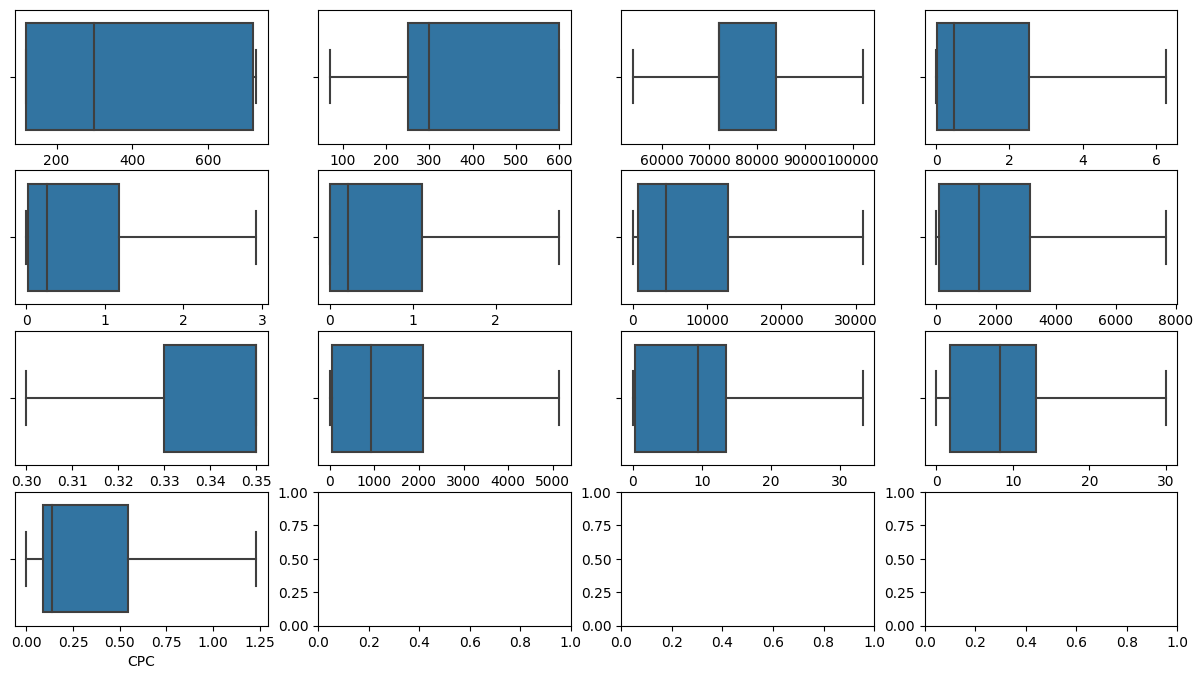

In [23]:
fig, axes = plt.subplots(nrows=4,ncols=4)
fig.set_size_inches(15,8)
sns.boxplot(data=df,x='Ad - Length', ax=axes[0][0])
sns.boxplot(data =df,x='Ad- Width', ax=axes[0][1])
sns.boxplot(data =df,x='Ad Size', ax=axes[0][2])
sns.boxplot(data =df,x='Available_Impressions', ax=axes[0][3])
sns.boxplot(data =df,x='Matched_Queries', ax=axes[1][0])
sns.boxplot(data =df,x='Impressions', ax=axes[1][1])
sns.boxplot(data =df,x='Clicks', ax=axes[1][2])
sns.boxplot(data =df,x='Spend', ax=axes[1][3])
sns.boxplot(data =df,x='Fee', ax=axes[2][0])
sns.boxplot(data =df,x='Revenue', ax=axes[2][1])
sns.boxplot(data =df,x='CTR', ax=axes[2][2])
sns.boxplot(data =df,x='CPM', ax=axes[2][3])
sns.boxplot(data =df,x='CPC', ax=axes[3][0])
plt.show()

In [24]:
df_num = df.drop(columns = ["Timestamp","InventoryType","Ad Type","Platform","Device Type","Format"])

In [25]:
df_num.head()

Ad - Length  Ad- Width  Ad Size  Available_Impressions  Matched_Queries  \
0        300.0      250.0  75000.0                 1806.0            325.0   
1        300.0      250.0  75000.0                 1780.0            285.0   
2        300.0      250.0  75000.0                 2727.0            356.0   
3        300.0      250.0  75000.0                 2430.0            497.0   
4        300.0      250.0  75000.0                 1218.0            242.0   

   Impressions  Clicks  Spend   Fee  Revenue       CTR  CPM  CPC  
0        323.0     1.0    0.0  0.35      0.0  0.309598  0.0  0.0  
1        285.0     1.0    0.0  0.35      0.0  0.350877  0.0  0.0  
2        355.0     1.0    0.0  0.35      0.0  0.281690  0.0  0.0  
3        495.0     1.0    0.0  0.35      0.0  0.202020  0.0  0.0  
4        242.0     1.0    0.0  0.35      0.0  0.413223  0.0  0.0

In [26]:
from scipy.stats import zscore
df_scaled=df_num.apply(zscore)

In [27]:
df_scaled.head()

Ad - Length  Ad- Width   Ad Size  Available_Impressions  Matched_Queries  \
0    -0.364496  -0.432797 -0.102518              -0.755333        -0.778949   
1    -0.364496  -0.432797 -0.102518              -0.755345        -0.778988   
2    -0.364496  -0.432797 -0.102518              -0.754900        -0.778919   
3    -0.364496  -0.432797 -0.102518              -0.755040        -0.778781   
4    -0.364496  -0.432797 -0.102518              -0.755610        -0.779030   

   Impressions    Clicks    Spend       Fee   Revenue       CTR       CPM  \
0    -0.768478 -0.867488 -0.89317  0.535724 -0.880093 -0.958836 -1.194498   
1    -0.768516 -0.867488 -0.89317  0.535724 -0.880093 -0.953835 -1.194498   
2    -0.768445 -0.867488 -0.89317  0.535724 -0.880093 -0.962218 -1.194498   
3    -0.768302 -0.867488 -0.89317  0.535724 -0.880093 -0.971871 -1.194498   
4    -0.768560 -0.867488 -0.89317  0.535724 -0.880093 -0.946281 -1.194498   

        CPC  
0 -1.042561  
1 -1.042561  
2 -1.042561  
3 -1.042561  
4 -1.042561

In [28]:
df.describe().T

count          mean           std           min  \
Ad - Length            23066.0  3.851631e+02  2.336514e+02    120.000000   
Ad- Width              23066.0  3.378960e+02  2.030929e+02     70.000000   
Ad Size                23066.0  7.657684e+04  1.538132e+04  54000.000000   
Available_Impressions  23066.0  1.607253e+06  2.125528e+06      1.000000   
Matched_Queries        23066.0  7.995380e+05  1.026037e+06      1.000000   
Impressions            23066.0  7.536120e+05  9.802568e+05      1.000000   
Clicks                 23066.0  8.306828e+03  9.574779e+03      1.000000   
Spend                  23066.0  2.166060e+03  2.425190e+03      0.000000   
Fee                    23066.0  3.402883e-01  1.812855e-02      0.300000   
Revenue                23066.0  1.449389e+03  1.646894e+03      0.000000   
CTR                    23066.0  8.223203e+00  8.253522e+00      0.010874   
CPM                    23066.0  8.219181e+00  6.881016e+00      0.000000   
CPC                    23066.0  3.300346e-01  3.165682e-01      0.000000   

                                25%            50%           75%           max  
Ad - Length              120.000000     300.000000  7.200000e+02  7.280000e+02  
Ad- Width                250.000000     300.000000  6.000000e+02  6.000000e+02  
Ad Size                72000.000000   72000.000000  8.400000e+04  1.020000e+05  
Available_Impressions  33672.250000  483771.000000  2.527712e+06  6.268771e+06  
Matched_Queries        18282.500000  258087.500000  1.180700e+06  2.924326e+06  
Impressions             7990.500000  225290.000000  1.112428e+06  2.769086e+06  
Clicks                   710.000000    4425.000000  1.279375e+04  3.091938e+04  
Spend                     85.180000    1425.125000  3.121400e+03  7.675730e+03  
Fee                        0.330000       0.350000  3.500000e-01  3.500000e-01  
Revenue                   55.365375     926.335000  2.091338e+03  5.145297e+03  
CTR                        0.265107       9.391248  1.347057e+01  3.327877e+01  
CPM                        1.749084       8.371566  1.304202e+01  2.998142e+01  
CPC                        0.089736       0.139347  5.462421e-01  1.231002e+00

In [29]:
df_scaled.describe().T

count          mean       std       min       25%  \
Ad - Length            23066.0  1.281478e-16  1.000022 -1.134891 -1.134891   
Ad- Width              23066.0 -1.182903e-16  1.000022 -1.319110 -0.432797   
Ad Size                23066.0  3.055833e-16  1.000022 -1.467840 -0.297564   
Available_Impressions  23066.0  9.857525e-18  1.000022 -0.756182 -0.740341   
Matched_Queries        23066.0  1.971505e-17  1.000022 -0.779265 -0.761447   
Impressions            23066.0  0.000000e+00  1.000022 -0.768806 -0.760655   
Clicks                 23066.0 -1.182903e-16  1.000022 -0.867488 -0.793438   
Spend                  23066.0 -9.857525e-17  1.000022 -0.893170 -0.858046   
Fee                    23066.0  1.143473e-15  1.000022 -2.222416 -0.567532   
Revenue                23066.0  3.943010e-17  1.000022 -0.880093 -0.846474   
CTR                    23066.0  1.380054e-16  1.000022 -0.995031 -0.964227   
CPM                    23066.0  2.464381e-17  1.000022 -1.194498 -0.940303   
CPC                    23066.0  3.943010e-17  1.000022 -1.042561 -0.759091   

                            50%       75%       max  
Ad - Length           -0.364496  1.433093  1.467332  
Ad- Width             -0.186599  1.290590  1.290590  
Ad Size               -0.297564  0.482620  1.652896  
Available_Impressions -0.528577  0.433059  2.193158  
Matched_Queries       -0.527722  0.371498  2.070914  
Impressions           -0.538975  0.366051  2.056111  
Clicks                -0.405431  0.468629  2.361729  
Spend                 -0.305523  0.393932  2.271900  
Fee                    0.535724  0.535724  0.535724  
Revenue               -0.317607  0.389803  2.244218  
CTR                    0.141524  0.635787  3.035808  
CPM                    0.022146  0.700905  3.162718  
CPC                   -0.602371  0.682987  2.846105

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df_num)
data_standard=scaler.transform(df_num)
data_standard=pd.DataFrame(data_standard, columns=df_num.columns)
data_standard.describe()

Ad - Length     Ad- Width       Ad Size  Available_Impressions  \
count  2.306600e+04  2.306600e+04  2.306600e+04           2.306600e+04   
mean   1.281478e-16 -1.182903e-16  3.055833e-16           9.857525e-18   
std    1.000022e+00  1.000022e+00  1.000022e+00           1.000022e+00   
min   -1.134891e+00 -1.319110e+00 -1.467840e+00          -7.561823e-01   
25%   -1.134891e+00 -4.327968e-01 -2.975645e-01          -7.403406e-01   
50%   -3.644957e-01 -1.865987e-01 -2.975645e-01          -5.285774e-01   
75%    1.433093e+00  1.290590e+00  4.826195e-01           4.330590e-01   
max    1.467332e+00  1.290590e+00  1.652896e+00           2.193158e+00   

       Matched_Queries   Impressions        Clicks         Spend  \
count     2.306600e+04  23066.000000  2.306600e+04  2.306600e+04   
mean      1.971505e-17      0.000000 -1.182903e-16 -9.857525e-17   
std       1.000022e+00      1.000022  1.000022e+00  1.000022e+00   
min      -7.792648e-01     -0.768806 -8.674882e-01 -8.931702e-01   
25%      -7.614468e-01     -0.760655 -7.934379e-01 -8.580464e-01   
50%      -5.277221e-01     -0.538975 -4.054310e-01 -3.055230e-01   
75%       3.714976e-01      0.366051  4.686290e-01  3.939323e-01   
max       2.070914e+00      2.056111  2.361729e+00  2.271900e+00   

                Fee       Revenue           CTR           CPM           CPC  
count  2.306600e+04  2.306600e+04  2.306600e+04  2.306600e+04  2.306600e+04  
mean   1.143473e-15  3.943010e-17  1.380054e-16  2.464381e-17  3.943010e-17  
std    1.000022e+00  1.000022e+00  1.000022e+00  1.000022e+00  1.000022e+00  
min   -2.222416e+00 -8.800933e-01 -9.950306e-01 -1.194498e+00 -1.042561e+00  
25%   -5.675316e-01 -8.464745e-01 -9.642269e-01 -9.403026e-01 -7.590912e-01  
50%    5.357244e-01 -3.176070e-01  1.415239e-01  2.214626e-02 -6.023707e-01  
75%    5.357244e-01  3.898027e-01  6.357869e-01  7.009055e-01  6.829874e-01  
max    5.357244e-01  2.244218e+00  3.035808e+00  3.162718e+00  2.846105e+00

In [31]:
from scipy.cluster.hierarchy import dendrogram, linkage

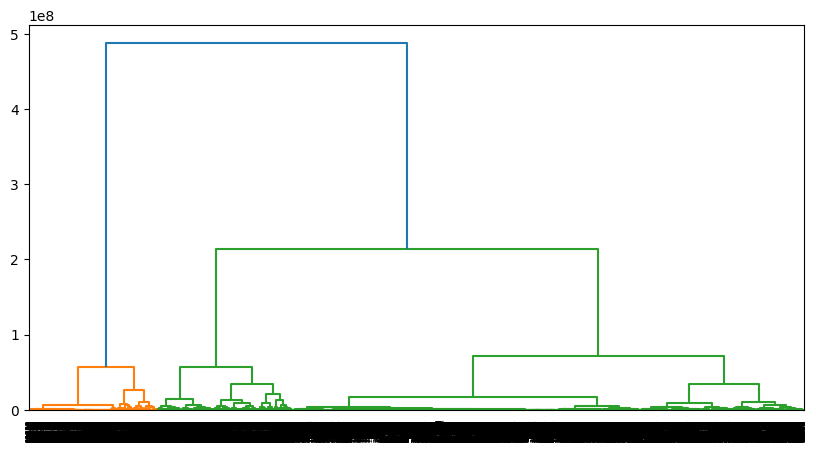

In [32]:
plt.figure(figsize=(10, 5))
wardlink = linkage(df_num, method = 'ward')
dend = dendrogram (wardlink)

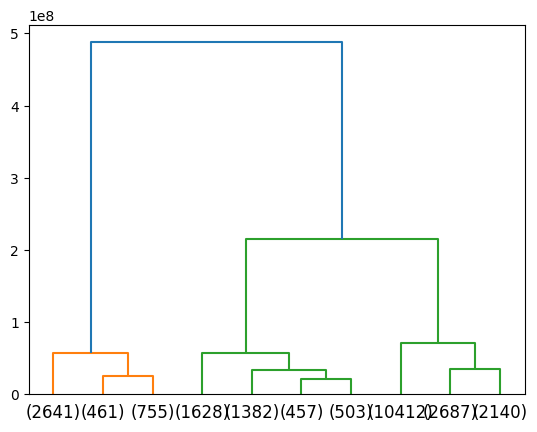

In [33]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [34]:
wardlink_euc = linkage(df_num, method = 'ward', metric='euclidean')

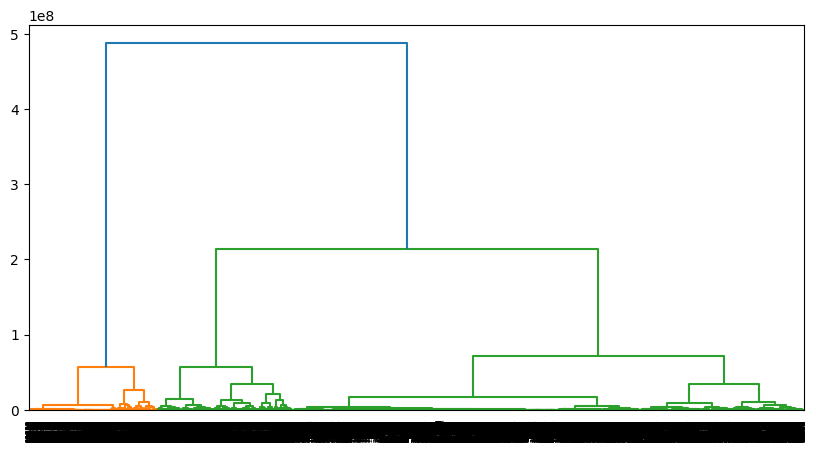

In [35]:
plt.figure(figsize=(10, 5))
dendrogram(wardlink_euc)
plt.show()

In [36]:
from sklearn . cluster import KMeans

In [37]:
wss =[]

In [38]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(df_scaled)
    wss.append(KM.inertia_)

In [39]:
wss

[299857.99999999866,
 183349.10202886112,
 130878.34788742894,
 95133.92434119384,
 61539.18919785395,
 51676.89230709949,
 44598.262627232885,
 39597.86882669636,
 36080.73809268758,
 32998.43901108066]

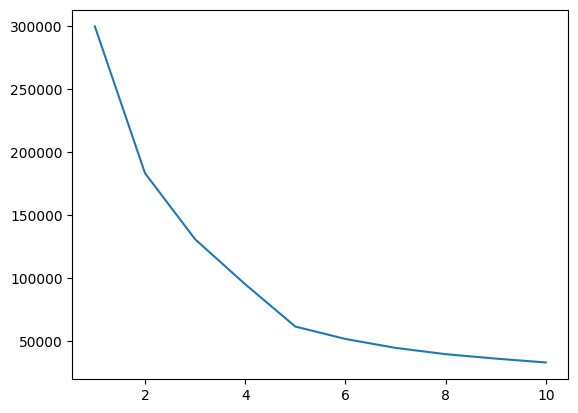

In [40]:
plt.plot(range(1,11), wss);

In [41]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [42]:
sil_score=[]

In [43]:
for i in range(2,11):
    k_means = KMeans(n_clusters=i)
    k_means.fit(df_scaled)
    labels = k_means.labels_

In [44]:
score = silhouette_score(df_scaled,labels)
sil_score.append(score)

In [45]:
sil_score

[0.4363792852831799]

In [46]:
k_means = KMeans(n_clusters = 2,random_state=1)
k_means.fit(df_scaled)
labels2 = k_means.labels_
silhouette_score(df_scaled,labels2,random_state=1)

0.38572769619101077

In [47]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(df_scaled)
labels3 = k_means.labels_
silhouette_score(df_scaled,labels3,random_state=1)

0.3825486036570082

In [48]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(df_scaled)
labels4 = k_means.labels_
silhouette_score(df_scaled,labels4,random_state=1)

0.45324270552598256

In [49]:
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(df_scaled)
labels5 = k_means.labels_
silhouette_score(df_scaled,labels5,random_state=1)

0.5240956940501831

In [50]:
k_means = KMeans(n_clusters = 6,random_state=1)
k_means.fit(df_scaled)
labels6 = k_means.labels_
silhouette_score(df_scaled,labels6,random_state=1)

0.5221533662938636

In [51]:
k_means = KMeans(n_clusters = 7,random_state=1)
k_means.fit(df_scaled)
labels7 = k_means.labels_
silhouette_score(df_scaled,labels7,random_state=1)

0.5165635029478517

In [52]:
k_means = KMeans(n_clusters = 8,random_state=1)
k_means.fit(df_scaled)
labels8 = k_means.labels_
silhouette_score(df_scaled,labels8,random_state=1)

0.47972249893837277

In [53]:
k_means = KMeans(n_clusters = 9,random_state=1)
k_means.fit(df_scaled)
labels9 = k_means.labels_
silhouette_score(df_scaled,labels9,random_state=1)

0.4320636564025043

In [54]:
k_means = KMeans(n_clusters = 10,random_state=1)
k_means.fit(df_scaled)
labels10 = k_means.labels_
silhouette_score(df_scaled,labels10,random_state=1)

0.43124854581084165

In [55]:
df["Clus_kmeans5"] = labels5
df

Timestamp InventoryType  Ad - Length  Ad- Width   Ad Size   Ad Type  \
0       2020-9-2-17       Format1        300.0      250.0   75000.0  Inter222   
1       2020-9-2-10       Format1        300.0      250.0   75000.0  Inter227   
2       2020-9-1-22       Format1        300.0      250.0   75000.0  Inter222   
3       2020-9-3-20       Format1        300.0      250.0   75000.0  Inter228   
4       2020-9-4-15       Format1        300.0      250.0   75000.0  Inter217   
...             ...           ...          ...        ...       ...       ...   
23061   2020-9-13-7       Format5        720.0      300.0  102000.0  Inter220   
23062   2020-11-2-7       Format5        720.0      300.0  102000.0  Inter224   
23063  2020-9-14-22       Format5        720.0      300.0  102000.0  Inter218   
23064  2020-11-18-2       Format4        120.0      600.0   72000.0  inter230   
23065   2020-9-14-0       Format5        720.0      300.0  102000.0  Inter221   

      Platform Device Type   Format  Available_Impressions  Matched_Queries  \
0        Video     Desktop  Display                 1806.0            325.0   
1          App      Mobile    Video                 1780.0            285.0   
2        Video     Desktop  Display                 2727.0            356.0   
3        Video      Mobile    Video                 2430.0            497.0   
4          Web     Desktop    Video                 1218.0            242.0   
...        ...         ...      ...                    ...              ...   
23061      Web      Mobile    Video                    1.0              1.0   
23062      Web     Desktop    Video                    3.0              2.0   
23063      App      Mobile    Video                    2.0              1.0   
23064    Video      Mobile    Video                    7.0              1.0   
23065      App      Mobile    Video                    2.0              2.0   

       Impressions  Clicks  Spend   Fee  Revenue        CTR        CPM   CPC  \
0            323.0     1.0   0.00  0.35   0.0000   0.309598   0.000000  0.00   
1            285.0     1.0   0.00  0.35   0.0000   0.350877   0.000000  0.00   
2            355.0     1.0   0.00  0.35   0.0000   0.281690   0.000000  0.00   
3            495.0     1.0   0.00  0.35   0.0000   0.202020   0.000000  0.00   
4            242.0     1.0   0.00  0.35   0.0000   0.413223   0.000000  0.00   
...            ...     ...    ...   ...      ...        ...        ...   ...   
23061          1.0     1.0   0.07  0.35   0.0455  33.278766  29.981418  0.07   
23062          2.0     1.0   0.04  0.35   0.0260  33.278766  20.000000  0.04   
23063          1.0     1.0   0.05  0.35   0.0325  33.278766  29.981418  0.05   
23064          1.0     1.0   0.07  0.35   0.0455  33.278766  29.981418  0.07   
23065          2.0     1.0   0.09  0.35   0.0585  33.278766  29.981418  0.09   

       Clus_kmeans5  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
...             ...  
23061             1  
23062             1  
23063             1  
23064             4  
23065             1  

[23066 rows x 20 columns]

In [56]:
df.Clus_kmeans5.value_counts().sort_index()

0    6275
1    4676
2    4054
3    1537
4    6524
Name: Clus_kmeans5, dtype: int64

In [57]:
df.groupby('Clus_kmeans5').agg({'Clicks':'mean', 'Spend':'mean', 'Revenue':'mean', 'CPM':'mean','CTR':'mean', 'CPC':'mean'})

Clicks        Spend      Revenue        CPM        CTR  \
Clus_kmeans5                                                                 
0              3263.131952  1500.090563   977.424163   1.788731   0.404392   
1             14127.278203  1252.285569   815.541831  11.728833  13.289690   
2             11245.754810  5739.327617  3878.748366   1.573280   0.217242   
3             30572.439330  6546.373195  4471.776116  15.385753  13.752664   
4              1914.448804   209.162609   135.993379  14.330063  15.784443   

                   CPC  
Clus_kmeans5            
0             0.528129  
1             0.090012  
2             0.748699  
3             0.111918  
4             0.102764

In [58]:
df.groupby('Clus_kmeans5').agg({'Clicks':sum , 'Spend':sum, 'Revenue':sum, 'CPM':sum,'CTR':sum, 'CPC':sum})

Clicks        Spend       Revenue           CPM  \
Clus_kmeans5                                                          
0             2.047615e+07   9413068.28  6.133337e+06  11224.284454   
1             6.605915e+07   5855687.32  3.813474e+06  54844.024508   
2             4.559029e+07  23267234.16  1.572445e+07   6378.078386   
3             4.698984e+07  10061775.60  6.873120e+06  23647.902183   
4             1.248986e+07   1364576.86  8.872208e+05  93489.330857   

                        CTR          CPC  
Clus_kmeans5                              
0               2537.560855  3314.007060  
1              62142.588360   420.897618  
2                880.699140  3035.225734  
3              21137.845174   172.017801  
4             102977.707115   670.430790

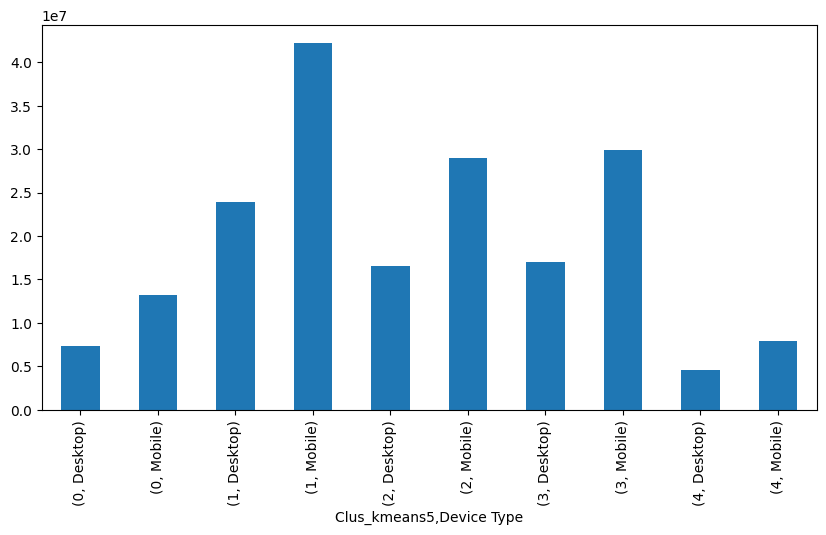

In [59]:
df1=df.groupby(['Clus_kmeans5','Device Type']).sum()['Clicks'].plot(kind='bar', figsize=(10,5))

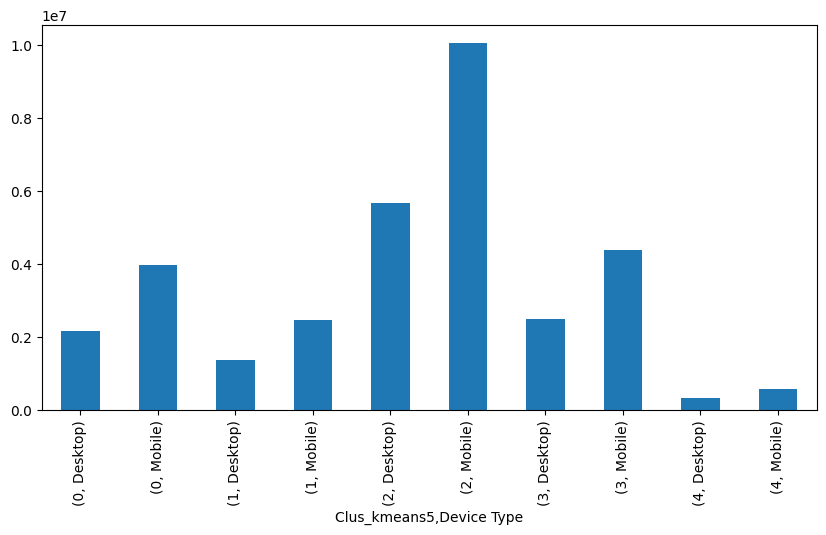

In [60]:
df2=df.groupby(['Clus_kmeans5','Device Type']).sum()['Revenue'].plot(kind='bar', figsize=(10,5))

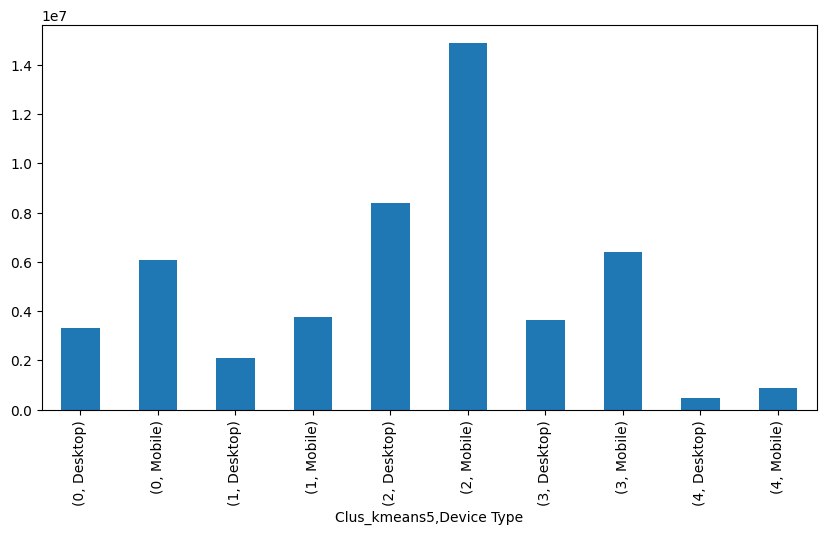

In [61]:
df3=df.groupby(['Clus_kmeans5','Device Type']).sum()['Spend'].plot(kind='bar', figsize=(10,5))

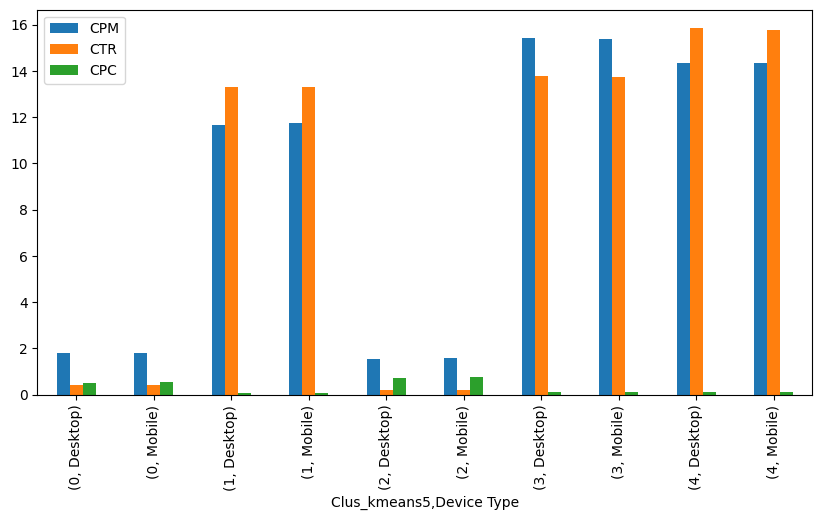

In [62]:
df4=df.groupby(['Clus_kmeans5','Device Type']).mean()[['CPM', 'CTR', 'CPC']].plot(kind='bar', figsize=(10,5))

#Problem - 2

In [63]:
df = pd.read_excel('/content/drive/MyDrive/PCA India Data_Census.xlsx')

In [64]:
df.head()

State Code  Dist.Code            State    Area Name  No_HH  TOT_M  TOT_F  \
0           1          1  Jammu & Kashmir      Kupwara   7707  23388  29796   
1           1          2  Jammu & Kashmir       Badgam   6218  19585  23102   
2           1          3  Jammu & Kashmir  Leh(Ladakh)   4452   6546  10964   
3           1          4  Jammu & Kashmir       Kargil   1320   2784   4206   
4           1          5  Jammu & Kashmir        Punch  11654  20591  29981   

   M_06  F_06  M_SC  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  \
0  5862  6196     3  ...           1150            749            180   
1  4482  3733     7  ...            525            715            123   
2  1082  1018     3  ...            114            188             44   
3   563   677     0  ...            194            247             61   
4  5157  4587    20  ...            874           1928            465   

   MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  \
0            237            680            252             32             46   
1            229            186            148             76            178   
2             89              3             34              0              4   
3            128             13             50              4             10   
4           1043            205            302             24            105   

   NON_WORK_M  NON_WORK_F  
0         258         214  
1         140         160  
2          67          61  
3         116          59  
4         180         478  

[5 rows x 61 columns]

In [65]:
df.tail()

State Code  Dist.Code                     State                Area Name  \
635          34        636                Puducherry                     Mahe   
636          34        637                Puducherry                 Karaikal   
637          35        638  Andaman & Nicobar Island                 Nicobars   
638          35        639  Andaman & Nicobar Island  North  & Middle Andaman   
639          35        640  Andaman & Nicobar Island            South Andaman   

     No_HH  TOT_M  TOT_F  M_06  F_06  M_SC  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  \
635   3333   8154  11781  1146  1203    21  ...             32             47   
636  10612  12346  21691  1544  1533  2234  ...            155            337   
637   1275   1549   2630   227   225     0  ...            104            134   
638   3762   5200   8012   723   664     0  ...            136            172   
639   7975  11977  18049  1470  1358     0  ...            173            122   

     MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  \
635              0              0              0              0   
636              3             14             38            130   
637              9              4              2              6   
638             24             44             11             21   
639              6              2             17             17   

     MARG_OT_0_3_M  MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
635              0              0          32          47  
636              4             23         110         170  
637             17             47          76          77  
638              1              4         100         103  
639              2              4         148          99  

[5 rows x 61 columns]

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [67]:
df.shape

(640, 61)

In [68]:
df.describe().T

count           mean            std    min       25%      50%  \
State Code      640.0      17.114062       9.426486    1.0      9.00     18.0   
Dist.Code       640.0     320.500000     184.896367    1.0    160.75    320.5   
No_HH           640.0   51222.871875   48135.405475  350.0  19484.00  35837.0   
TOT_M           640.0   79940.576563   73384.511114  391.0  30228.00  58339.0   
TOT_F           640.0  122372.084375  113600.717282  698.0  46517.75  87724.5   
M_06            640.0   12309.098438   11500.906881   56.0   4733.75   9159.0   
F_06            640.0   11942.300000   11326.294567   56.0   4672.25   8663.0   
M_SC            640.0   13820.946875   14426.373130    0.0   3466.25   9591.5   
F_SC            640.0   20778.392188   21727.887713    0.0   5603.25  13709.0   
M_ST            640.0    6191.807813    9912.668948    0.0    293.75   2333.5   
F_ST            640.0   10155.640625   15875.701488    0.0    429.50   3834.5   
M_LIT           640.0   57967.979688   55910.282466  286.0  21298.00  42693.5   
F_LIT           640.0   66359.565625   75037.860207  371.0  20932.00  43796.5   
M_ILL           640.0   21972.596875   19825.605268  105.0   8590.00  15767.5   
F_ILL           640.0   56012.518750   47116.693769  327.0  22367.00  42386.0   
TOT_WORK_M      640.0   37992.407813   36419.537491  100.0  13753.50  27936.5   
TOT_WORK_F      640.0   41295.760938   37192.360943  357.0  16097.75  30588.5   
MAINWORK_M      640.0   30204.446875   31480.915680   65.0   9787.00  21250.5   
MAINWORK_F      640.0   28198.846875   29998.262689  240.0   9502.25  18484.0   
MAIN_CL_M       640.0    5424.342188    4739.161969    0.0   2023.50   4160.5   
MAIN_CL_F       640.0    5486.042188    5326.362728    0.0   1920.25   3908.5   
MAIN_AL_M       640.0    5849.109375    6399.507966    0.0   1070.25   3936.5   
MAIN_AL_F       640.0    8925.995312   12864.287584    0.0   1408.75   3933.5   
MAIN_HH_M       640.0     883.893750    1278.642345    0.0    187.50    498.5   
MAIN_HH_F       640.0    1380.773438    3179.414449    0.0    248.75    540.5   
MAIN_OT_M       640.0   18047.101562   26068.480886   36.0   3997.50   9598.0   
MAIN_OT_F       640.0   12406.035938   18972.202369  153.0   3142.50   6380.5   
MARGWORK_M      640.0    7787.960938    7410.791691   35.0   2937.50   5627.0   
MARGWORK_F      640.0   13096.914062   10996.474528  117.0   5424.50  10175.0   
MARG_CL_M       640.0    1040.737500    1311.546847    0.0    311.75    606.5   
MARG_CL_F       640.0    2307.682813    3564.626095    0.0    630.25   1226.0   
MARG_AL_M       640.0    3304.326562    3781.555707    0.0    873.50   2062.0   
MARG_AL_F       640.0    6463.281250    6773.876298    0.0   1402.50   4020.5   
MARG_HH_M       640.0     316.742188     462.661891    0.0     71.75    166.0   
MARG_HH_F       640.0     786.626562    1198.718213    0.0    171.75    429.0   
MARG_OT_M       640.0    3126.154687    3609.391821    7.0    935.50   2036.0   
MARG_OT_F       640.0    3539.323438    4115.191314   19.0   1071.75   2349.5   
MARGWORK_3_6_M  640.0   41948.168750   39045.316918  291.0  16208.25  30315.0   
MARGWORK_3_6_F  640.0   81076.323438   82970.406216  341.0  26619.50  56793.0   
MARG_CL_3_6_M   640.0    6394.987500    6019.806644   27.0   2372.00   4630.0   
MARG_CL_3_6_F   640.0   10339.864063    8467.473429   85.0   4351.50   8295.0   
MARG_AL_3_6_M   640.0     789.848438     905.639279    0.0    235.50    480.5   
MARG_AL_3_6_F   640.0    1749.584375    2496.541514    0.0    497.25    985.5   
MARG_HH_3_6_M   640.0    2743.635938    3059.586387    0.0    718.75   1714.5   
MARG_HH_3_6_F   640.0    5169.850000    5335.640960    0.0   1113.75   3294.0   
MARG_OT_3_6_M   640.0     245.362500     358.728567    0.0     58.00    129.5   
MARG_OT_3_6_F   640.0     585.884375     900.025817    0.0    127.75    320.5   
MARGWORK_0_3_M  640.0    2616.140625    3036.964381    7.0    755.00   1681.5   
MARGWORK_0_3_F  640.0    2834.545312    3327.83

In [69]:
df.duplicated().sum()

0

In [70]:
df.isnull().sum()

State Code       0
Dist.Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_HH_0_3_F    0
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
Length: 61, dtype: int64

In [71]:
pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 2.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.7/202.7 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 51.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 kB 35.2 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42034 sha256=1a321ba6d0e0832ae4d0dfb30e043c5efcbbbc194e8c528b003ed109a67bab86
  Stored in directory: /root/.cache/pip/wheels/c5/94/da/41abe415f64706710726291086a814dd8b9e0dab1c491ef6ed
Successfully built factor_analyzer


In [72]:
gender_ratio = df['TOT_F'] / df['TOT_M']
highest_gr = df.loc[gender_ratio.idxmax(), 'State']
lowest_gr = df.loc[gender_ratio.idxmin(), 'State']
print(f"Highest gender ratio: {highest_gr}, lowest gender ratio: {lowest_gr}")

Highest gender ratio: Andhra Pradesh, lowest gender ratio: Lakshadweep


In [73]:
district_gr = df.groupby(['State', 'Dist.Code'])['TOT_M', 'TOT_F'].sum()
district_gr['gender_ratio'] = district_gr['TOT_F'] / district_gr['TOT_M']
highest_gr_district = district_gr.loc[district_gr['gender_ratio'].idxmax()]
lowest_gr_district = district_gr.loc[district_gr['gender_ratio'].idxmin()]
print(f"Highest gender ratio district: {highest_gr_district.name[1]} in {highest_gr_district.name[0]}, lowest gender ratio district: {lowest_gr_district.name[1]} in {lowest_gr_district.name[0]}")

Highest gender ratio district: 547 in Andhra Pradesh, lowest gender ratio district: 587 in Lakshadweep


<Axes: xlabel='No_HH'>

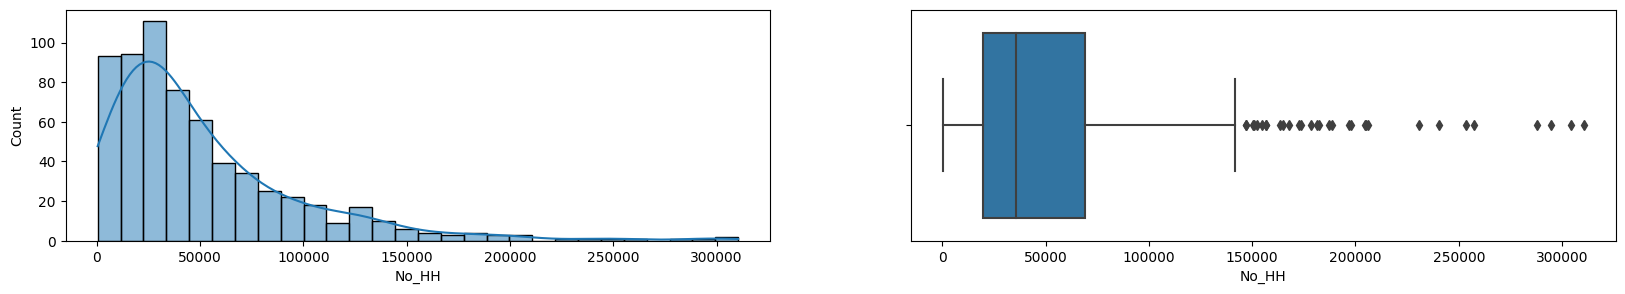

In [74]:
fig_dims = (20, 3) 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims) 
sns.histplot(df.No_HH, kde=True, ax=axs[0]) 
sns.boxplot(x= 'No_HH', data=df, ax=axs[1])

<Axes: xlabel='TOT_M'>

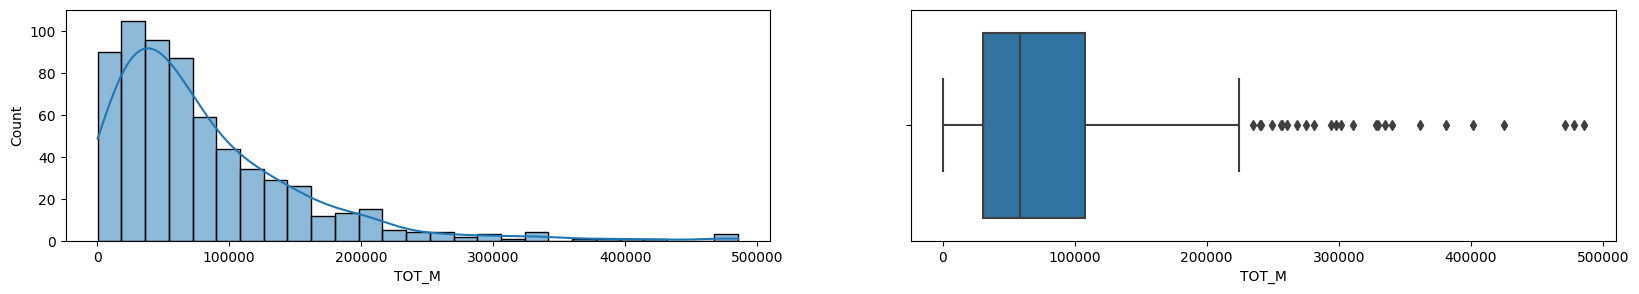

In [75]:
fig_dims = (20, 3) 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims) 
sns.histplot(df.TOT_M, kde=True, ax=axs[0]) 
sns.boxplot(x= 'TOT_M', data=df, ax=axs[1])

<Axes: xlabel='TOT_F'>

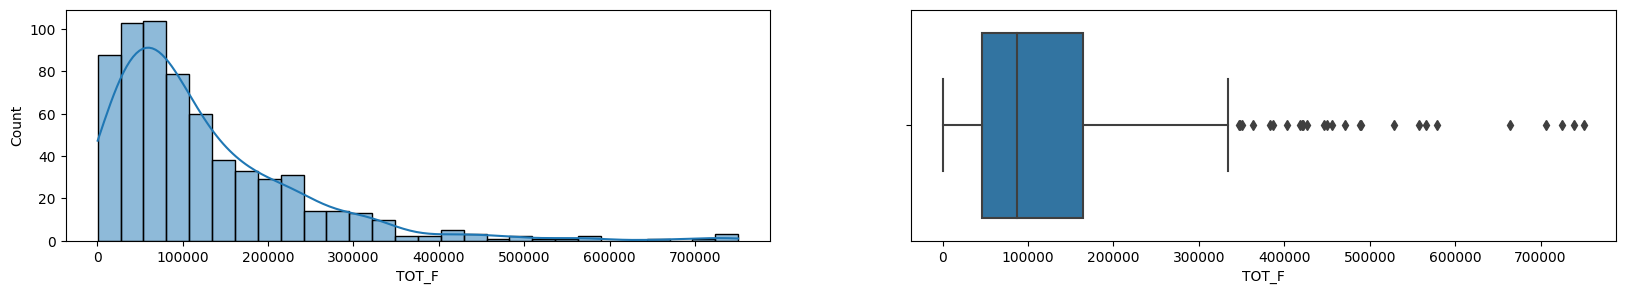

In [76]:
fig_dims = (20, 3) 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims) 
sns.histplot(df.TOT_F, kde=True, ax=axs[0]) 
sns.boxplot(x= 'TOT_F', data=df, ax=axs[1])

<Axes: xlabel='TOT_WORK_M'>

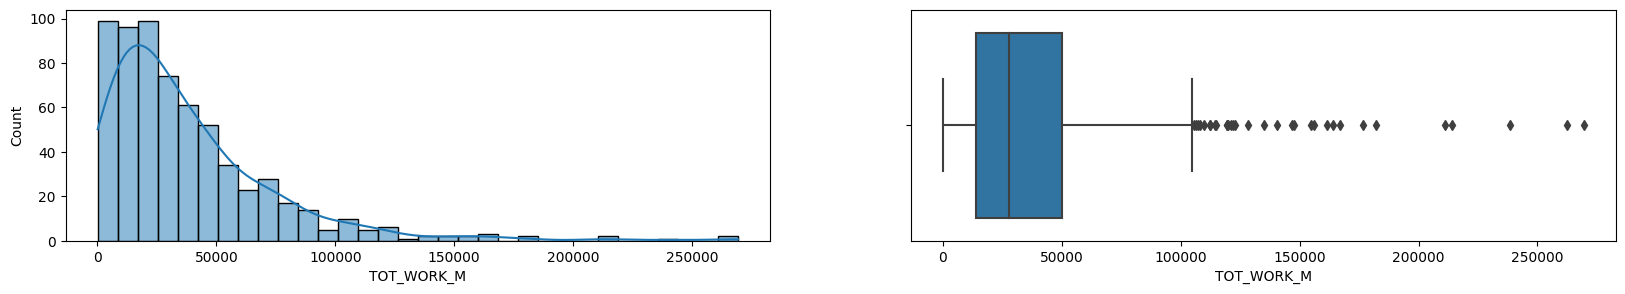

In [77]:
fig_dims = (20, 3) 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims) 
sns.histplot(df.TOT_WORK_M, kde=True, ax=axs[0]) 
sns.boxplot(x= 'TOT_WORK_M', data=df, ax=axs[1])

<Axes: xlabel='TOT_WORK_F'>

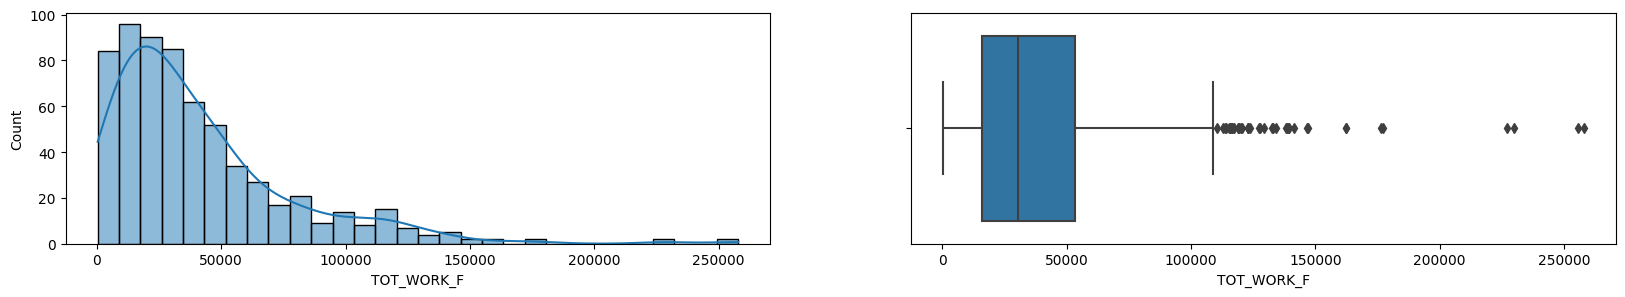

In [78]:
fig_dims = (20, 3) 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims) 
sns.histplot(df.TOT_WORK_F, kde=True, ax=axs[0]) 
sns.boxplot(x= 'TOT_WORK_F', data=df, ax=axs[1])

In [79]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

59

In [80]:
df_num.head()

State Code  Dist.Code  No_HH  TOT_M  TOT_F  M_06  F_06  M_SC  F_SC  M_ST  \
0           1          1   7707  23388  29796  5862  6196     3     0  1999   
1           1          2   6218  19585  23102  4482  3733     7     6   427   
2           1          3   4452   6546  10964  1082  1018     3     6  5806   
3           1          4   1320   2784   4206   563   677     0     0  2666   
4           1          5  11654  20591  29981  5157  4587    20    33  7670   

   ...  MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  MARG_AL_0_3_F  \
0  ...           1150            749            180            237   
1  ...            525            715            123            229   
2  ...            114            188             44             89   
3  ...            194            247             61            128   
4  ...            874           1928            465           1043   

   MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  NON_WORK_M  \
0            680            252             32             46         258   
1            186            148             76            178         140   
2              3             34              0              4          67   
3             13             50              4             10         116   
4            205            302             24            105         180   

   NON_WORK_F  
0         214  
1         160  
2          61  
3          59  
4         478  

[5 rows x 59 columns]

In [81]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df[column], kde=False, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.show()

Description of State Code
----------------------------------------------------------------------------
count    640.000000
mean      17.114062
std        9.426486
min        1.000000
25%        9.000000
50%       18.000000
75%       24.000000
max       35.000000
Name: State Code, dtype: float64 Distribution of State Code
----------------------------------------------------------------------------


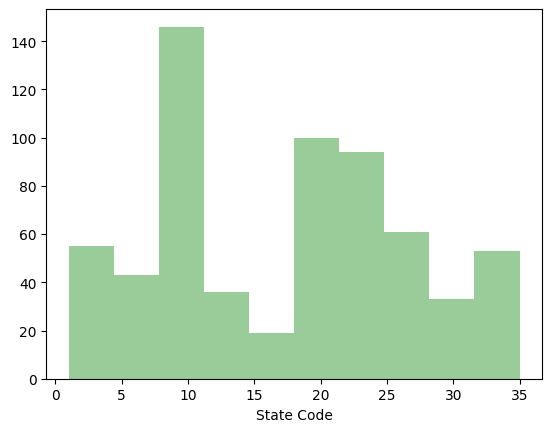

BoxPlot of State Code
----------------------------------------------------------------------------


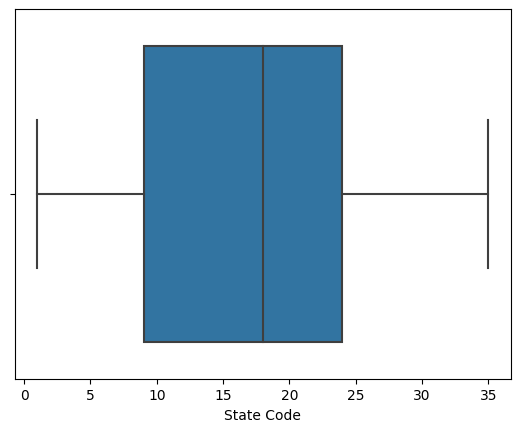

Description of Dist.Code
----------------------------------------------------------------------------
count    640.000000
mean     320.500000
std      184.896367
min        1.000000
25%      160.750000
50%      320.500000
75%      480.250000
max      640.000000
Name: Dist.Code, dtype: float64 Distribution of Dist.Code
----------------------------------------------------------------------------


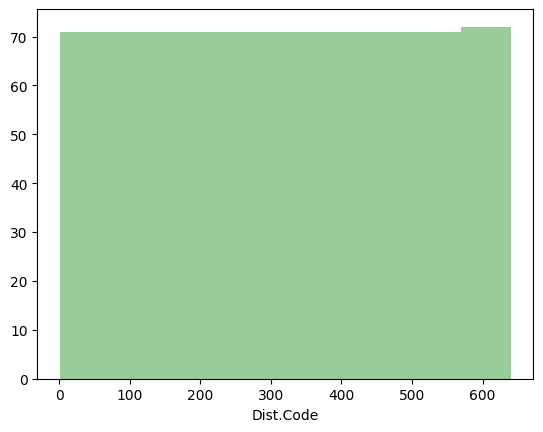

BoxPlot of Dist.Code
----------------------------------------------------------------------------


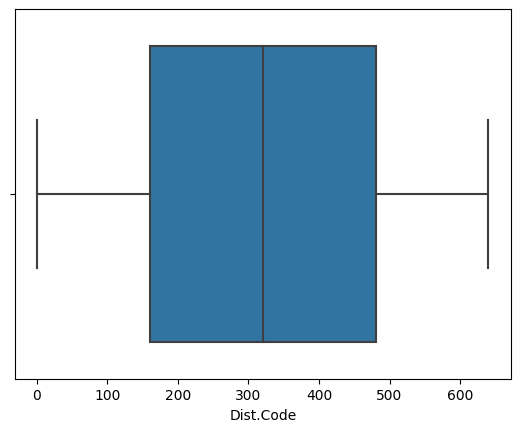

Description of No_HH
----------------------------------------------------------------------------
count       640.000000
mean      51222.871875
std       48135.405475
min         350.000000
25%       19484.000000
50%       35837.000000
75%       68892.000000
max      310450.000000
Name: No_HH, dtype: float64 Distribution of No_HH
----------------------------------------------------------------------------


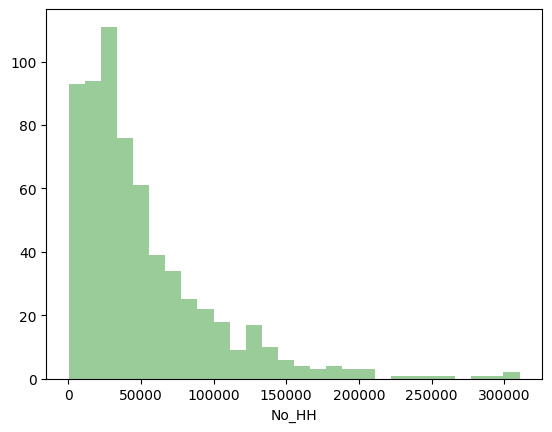

BoxPlot of No_HH
----------------------------------------------------------------------------


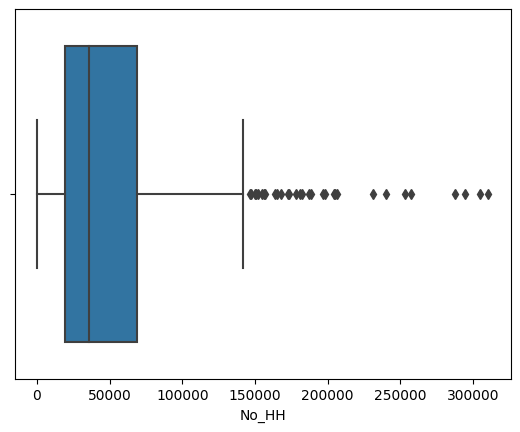

Description of TOT_M
----------------------------------------------------------------------------
count       640.000000
mean      79940.576563
std       73384.511114
min         391.000000
25%       30228.000000
50%       58339.000000
75%      107918.500000
max      485417.000000
Name: TOT_M, dtype: float64 Distribution of TOT_M
----------------------------------------------------------------------------


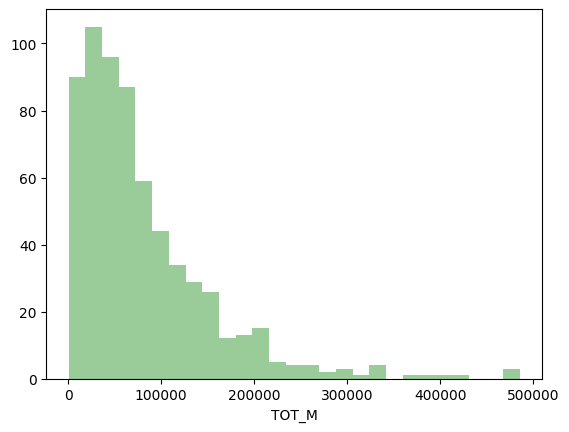

BoxPlot of TOT_M
----------------------------------------------------------------------------


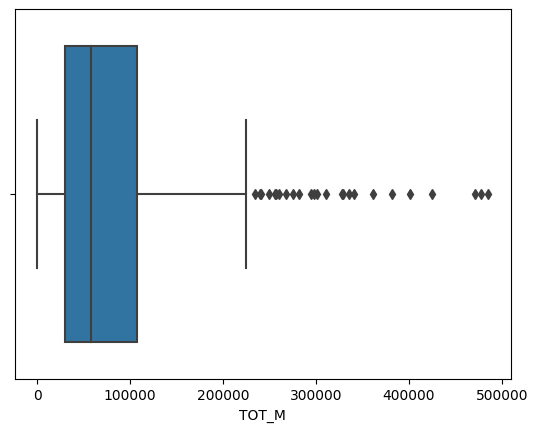

Description of TOT_F
----------------------------------------------------------------------------
count       640.000000
mean     122372.084375
std      113600.717282
min         698.000000
25%       46517.750000
50%       87724.500000
75%      164251.750000
max      750392.000000
Name: TOT_F, dtype: float64 Distribution of TOT_F
----------------------------------------------------------------------------


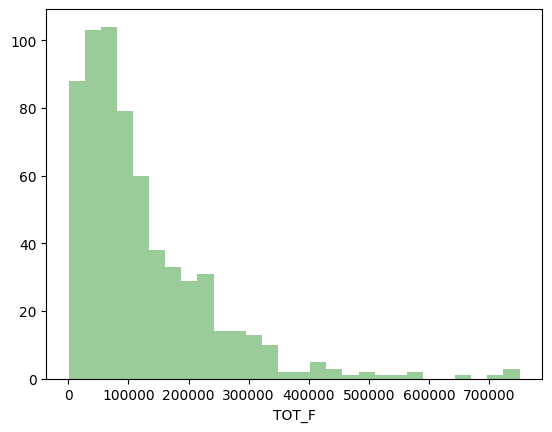

BoxPlot of TOT_F
----------------------------------------------------------------------------


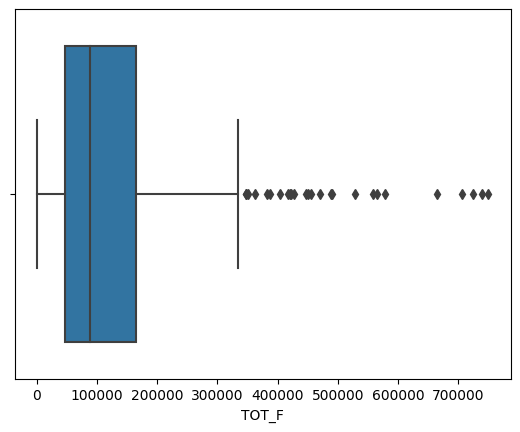

Description of M_06
----------------------------------------------------------------------------
count      640.000000
mean     12309.098438
std      11500.906881
min         56.000000
25%       4733.750000
50%       9159.000000
75%      16520.250000
max      96223.000000
Name: M_06, dtype: float64 Distribution of M_06
----------------------------------------------------------------------------


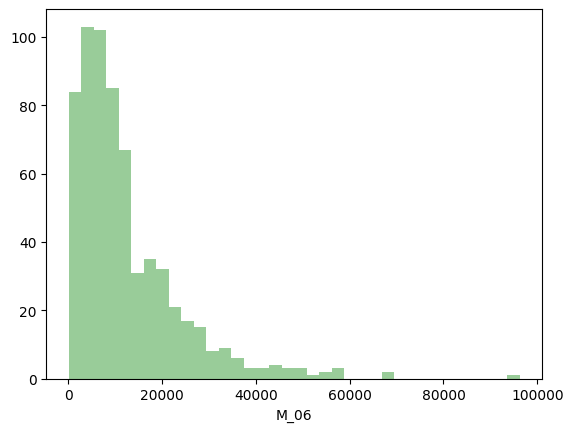

BoxPlot of M_06
----------------------------------------------------------------------------


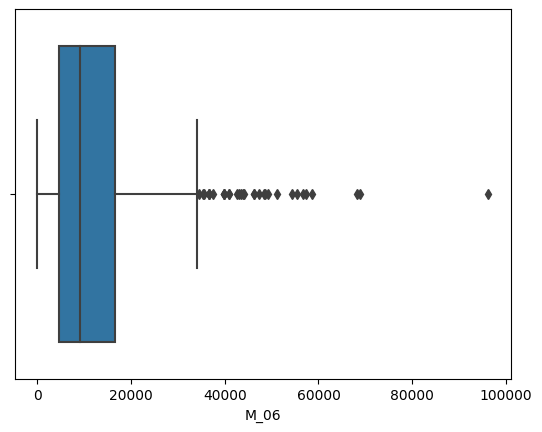

Description of F_06
----------------------------------------------------------------------------
count      640.000000
mean     11942.300000
std      11326.294567
min         56.000000
25%       4672.250000
50%       8663.000000
75%      15902.250000
max      95129.000000
Name: F_06, dtype: float64 Distribution of F_06
----------------------------------------------------------------------------


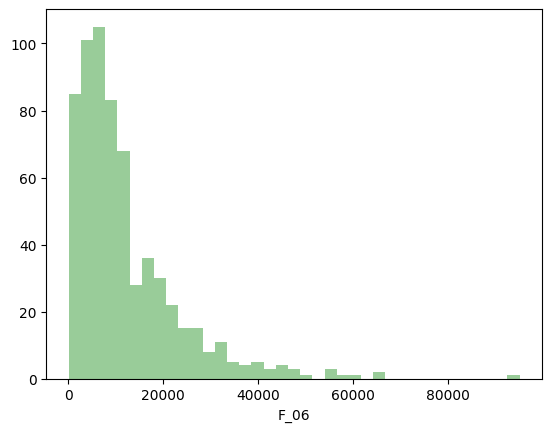

BoxPlot of F_06
----------------------------------------------------------------------------


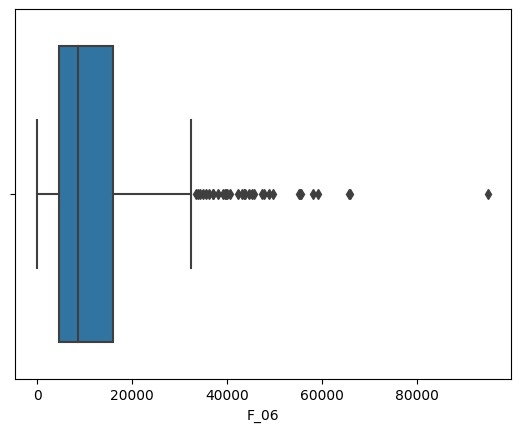

Description of M_SC
----------------------------------------------------------------------------
count       640.000000
mean      13820.946875
std       14426.373130
min           0.000000
25%        3466.250000
50%        9591.500000
75%       19429.750000
max      103307.000000
Name: M_SC, dtype: float64 Distribution of M_SC
----------------------------------------------------------------------------


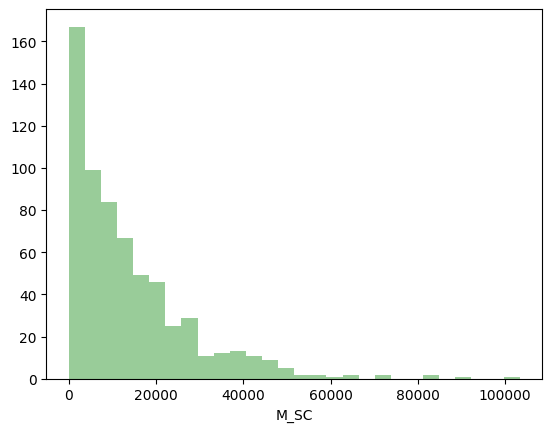

BoxPlot of M_SC
----------------------------------------------------------------------------


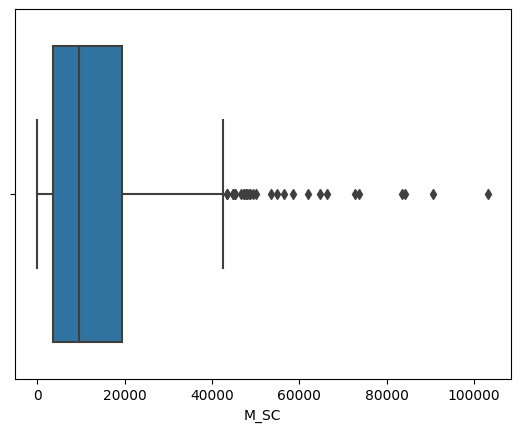

Description of F_SC
----------------------------------------------------------------------------
count       640.000000
mean      20778.392188
std       21727.887713
min           0.000000
25%        5603.250000
50%       13709.000000
75%       29180.000000
max      156429.000000
Name: F_SC, dtype: float64 Distribution of F_SC
----------------------------------------------------------------------------


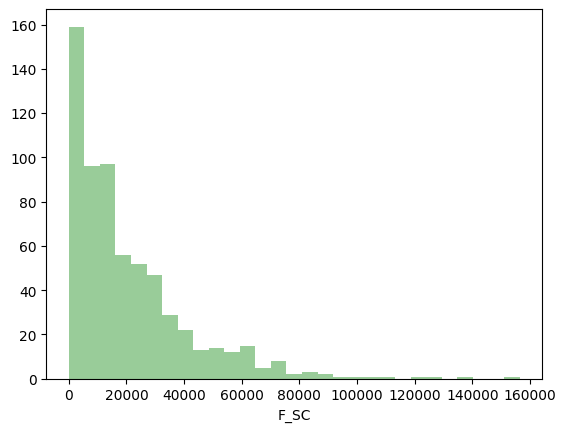

BoxPlot of F_SC
----------------------------------------------------------------------------


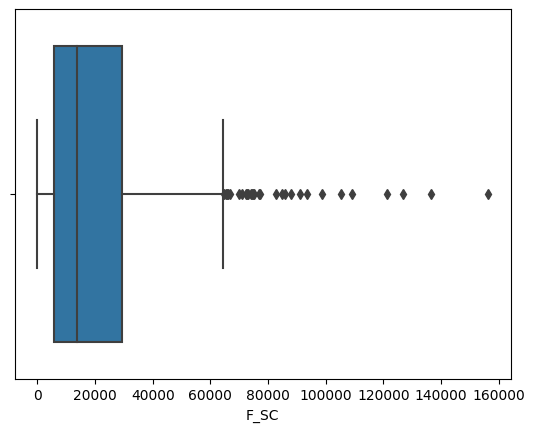

Description of M_ST
----------------------------------------------------------------------------
count      640.000000
mean      6191.807813
std       9912.668948
min          0.000000
25%        293.750000
50%       2333.500000
75%       7658.000000
max      96785.000000
Name: M_ST, dtype: float64 Distribution of M_ST
----------------------------------------------------------------------------


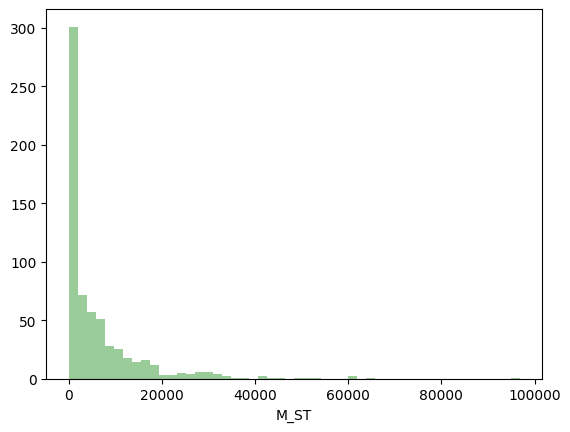

BoxPlot of M_ST
----------------------------------------------------------------------------


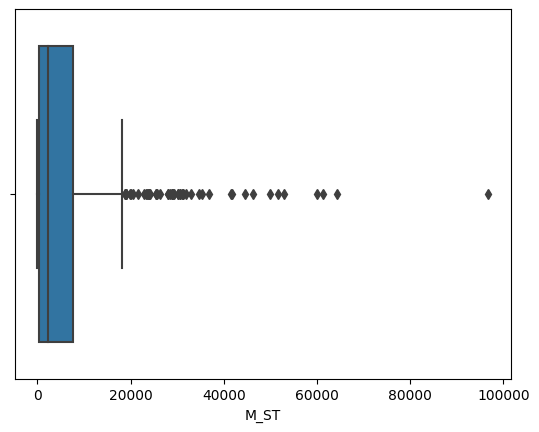

Description of F_ST
----------------------------------------------------------------------------
count       640.000000
mean      10155.640625
std       15875.701488
min           0.000000
25%         429.500000
50%        3834.500000
75%       12480.250000
max      130119.000000
Name: F_ST, dtype: float64 Distribution of F_ST
----------------------------------------------------------------------------


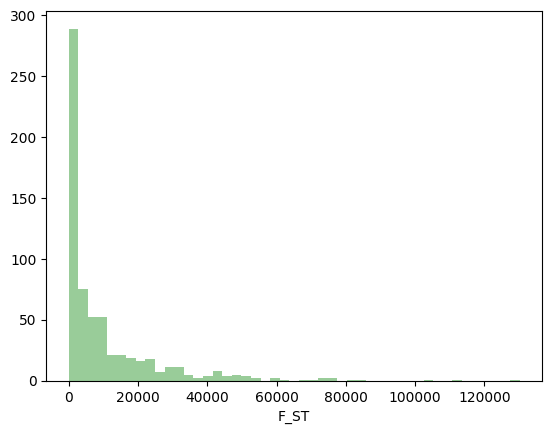

BoxPlot of F_ST
----------------------------------------------------------------------------


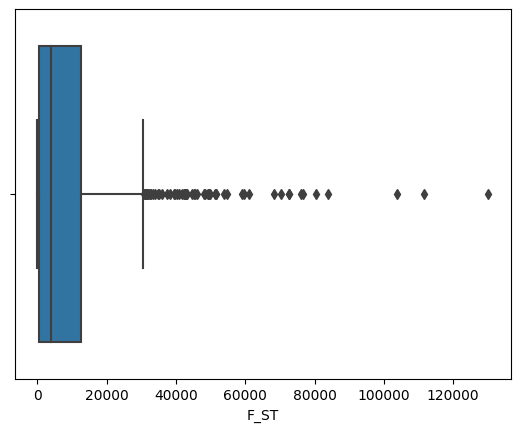

Description of M_LIT
----------------------------------------------------------------------------
count       640.000000
mean      57967.979688
std       55910.282466
min         286.000000
25%       21298.000000
50%       42693.500000
75%       77989.500000
max      403261.000000
Name: M_LIT, dtype: float64 Distribution of M_LIT
----------------------------------------------------------------------------


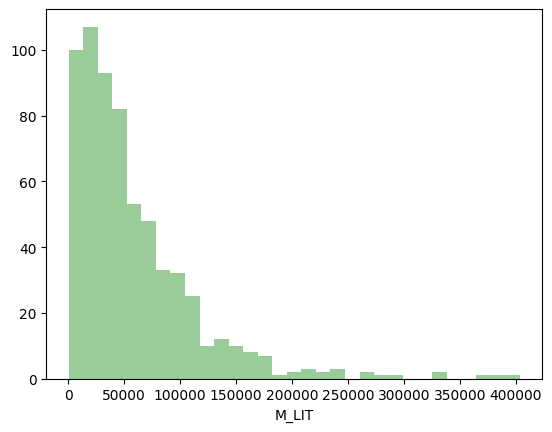

BoxPlot of M_LIT
----------------------------------------------------------------------------


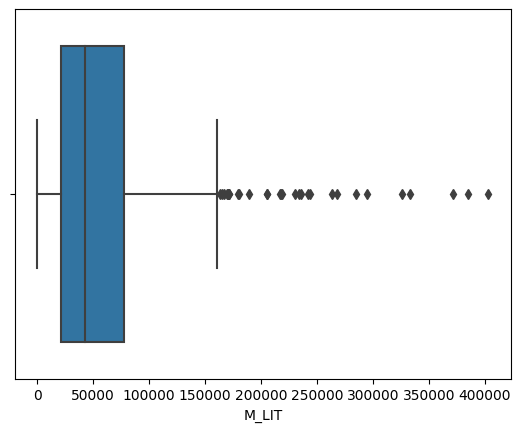

Description of F_LIT
----------------------------------------------------------------------------
count       640.000000
mean      66359.565625
std       75037.860207
min         371.000000
25%       20932.000000
50%       43796.500000
75%       84799.750000
max      571140.000000
Name: F_LIT, dtype: float64 Distribution of F_LIT
----------------------------------------------------------------------------


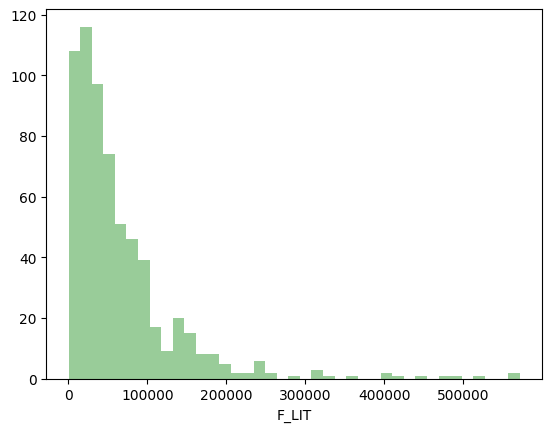

BoxPlot of F_LIT
----------------------------------------------------------------------------


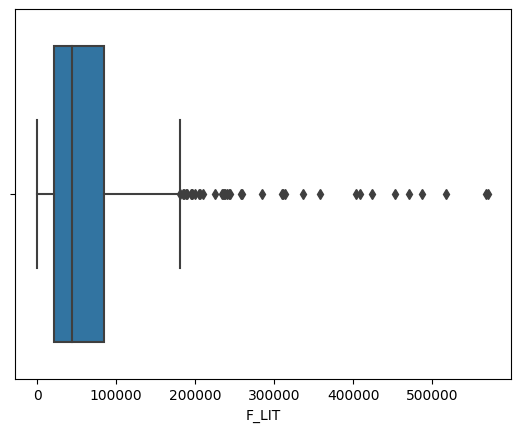

Description of M_ILL
----------------------------------------------------------------------------
count       640.000000
mean      21972.596875
std       19825.605268
min         105.000000
25%        8590.000000
50%       15767.500000
75%       29512.500000
max      105961.000000
Name: M_ILL, dtype: float64 Distribution of M_ILL
----------------------------------------------------------------------------


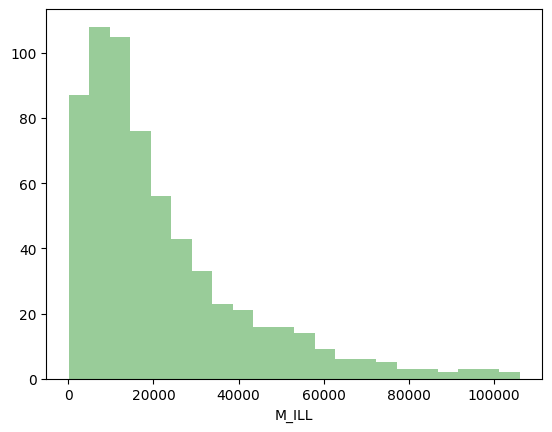

BoxPlot of M_ILL
----------------------------------------------------------------------------


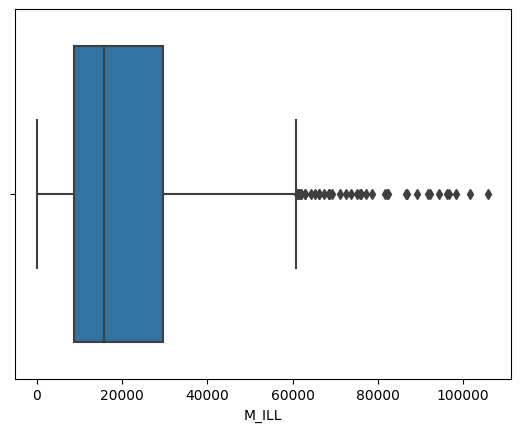

Description of F_ILL
----------------------------------------------------------------------------
count       640.000000
mean      56012.518750
std       47116.693769
min         327.000000
25%       22367.000000
50%       42386.000000
75%       78471.000000
max      254160.000000
Name: F_ILL, dtype: float64 Distribution of F_ILL
----------------------------------------------------------------------------


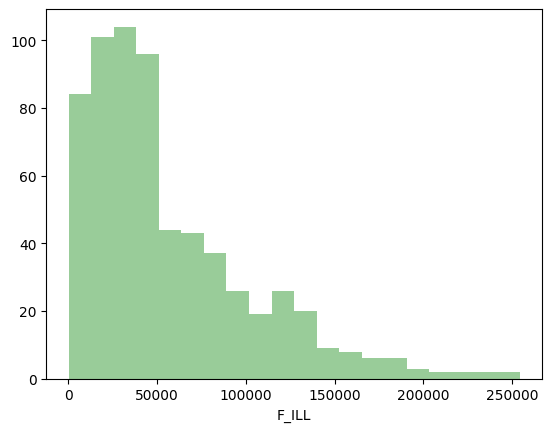

BoxPlot of F_ILL
----------------------------------------------------------------------------


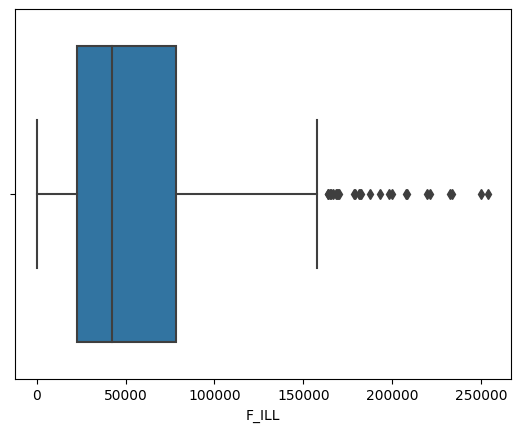

Description of TOT_WORK_M
----------------------------------------------------------------------------
count       640.000000
mean      37992.407813
std       36419.537491
min         100.000000
25%       13753.500000
50%       27936.500000
75%       50226.750000
max      269422.000000
Name: TOT_WORK_M, dtype: float64 Distribution of TOT_WORK_M
----------------------------------------------------------------------------


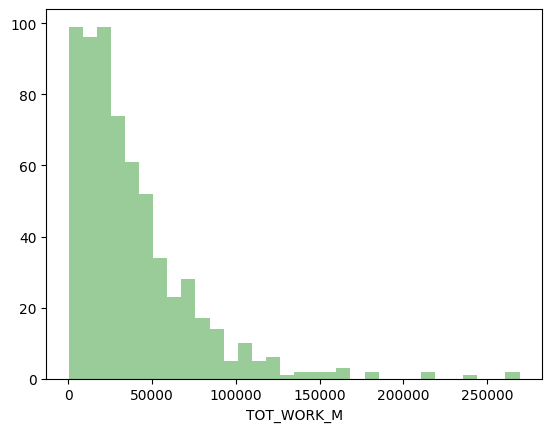

BoxPlot of TOT_WORK_M
----------------------------------------------------------------------------


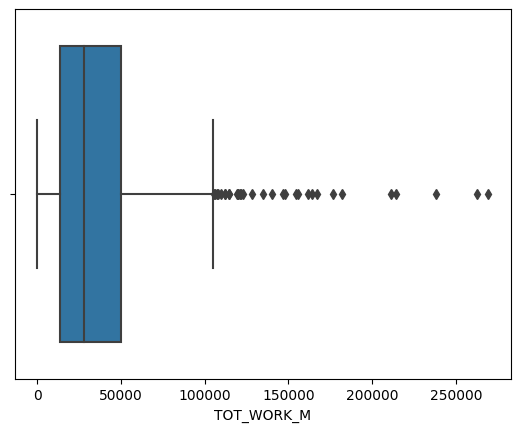

Description of TOT_WORK_F
----------------------------------------------------------------------------
count       640.000000
mean      41295.760938
std       37192.360943
min         357.000000
25%       16097.750000
50%       30588.500000
75%       53234.250000
max      257848.000000
Name: TOT_WORK_F, dtype: float64 Distribution of TOT_WORK_F
----------------------------------------------------------------------------


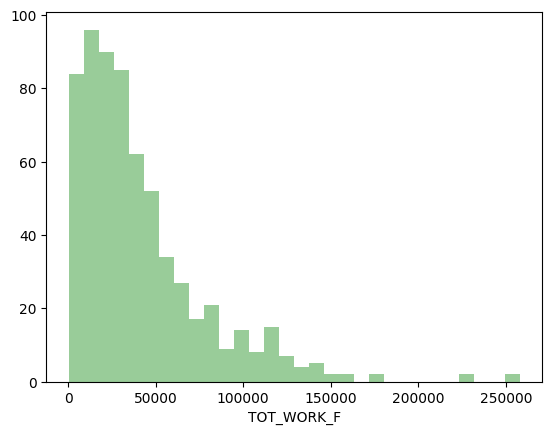

BoxPlot of TOT_WORK_F
----------------------------------------------------------------------------


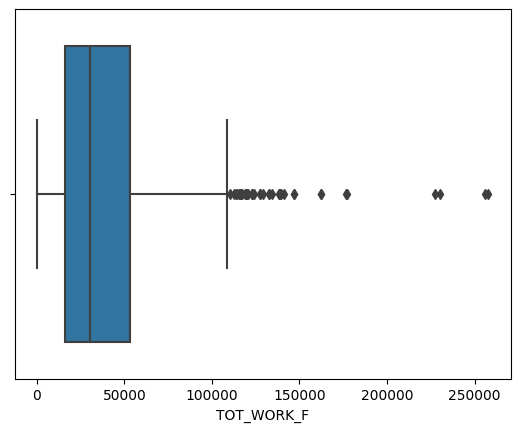

Description of MAINWORK_M
----------------------------------------------------------------------------
count       640.000000
mean      30204.446875
std       31480.915680
min          65.000000
25%        9787.000000
50%       21250.500000
75%       40119.000000
max      247911.000000
Name: MAINWORK_M, dtype: float64 Distribution of MAINWORK_M
----------------------------------------------------------------------------


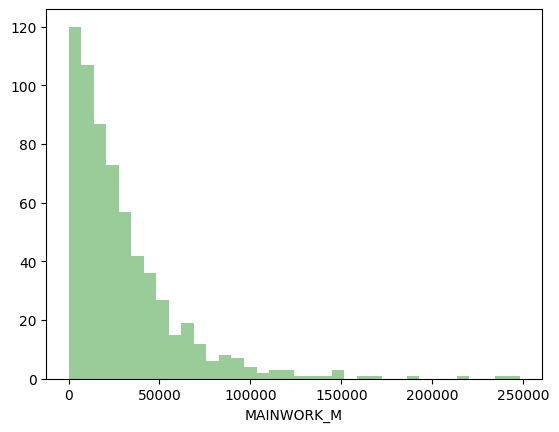

BoxPlot of MAINWORK_M
----------------------------------------------------------------------------


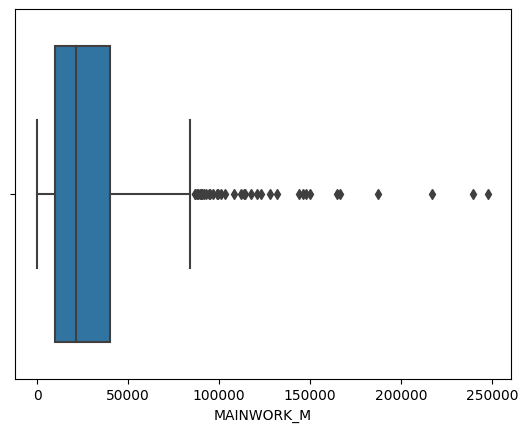

Description of MAINWORK_F
----------------------------------------------------------------------------
count       640.000000
mean      28198.846875
std       29998.262689
min         240.000000
25%        9502.250000
50%       18484.000000
75%       35063.250000
max      226166.000000
Name: MAINWORK_F, dtype: float64 Distribution of MAINWORK_F
----------------------------------------------------------------------------


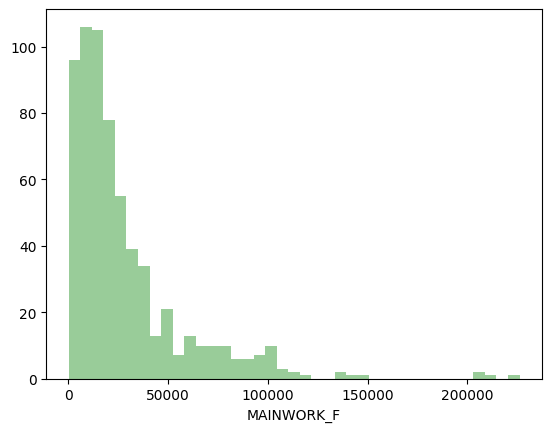

BoxPlot of MAINWORK_F
----------------------------------------------------------------------------


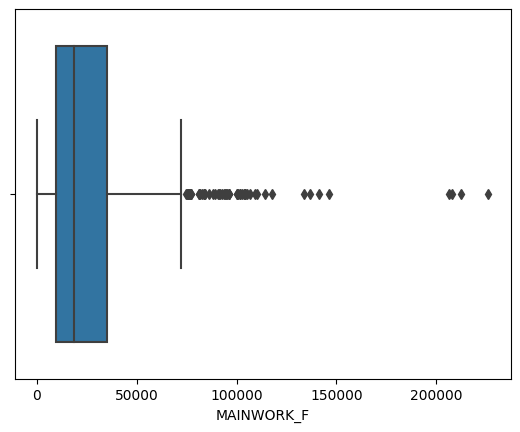

Description of MAIN_CL_M
----------------------------------------------------------------------------
count      640.000000
mean      5424.342188
std       4739.161969
min          0.000000
25%       2023.500000
50%       4160.500000
75%       7695.000000
max      29113.000000
Name: MAIN_CL_M, dtype: float64 Distribution of MAIN_CL_M
----------------------------------------------------------------------------


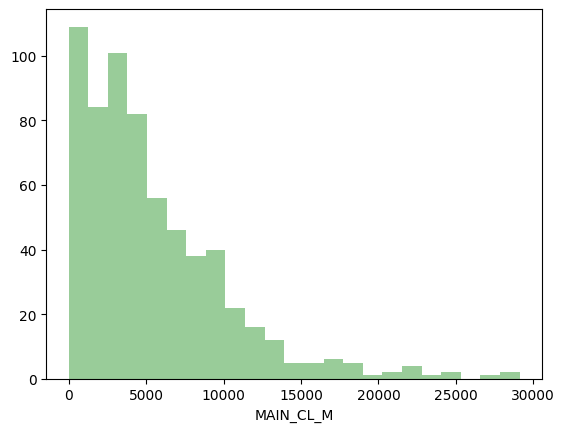

BoxPlot of MAIN_CL_M
----------------------------------------------------------------------------


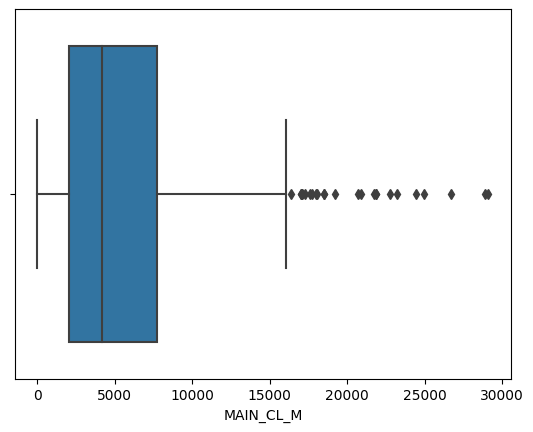

Description of MAIN_CL_F
----------------------------------------------------------------------------
count      640.000000
mean      5486.042188
std       5326.362728
min          0.000000
25%       1920.250000
50%       3908.500000
75%       7286.250000
max      36193.000000
Name: MAIN_CL_F, dtype: float64 Distribution of MAIN_CL_F
----------------------------------------------------------------------------


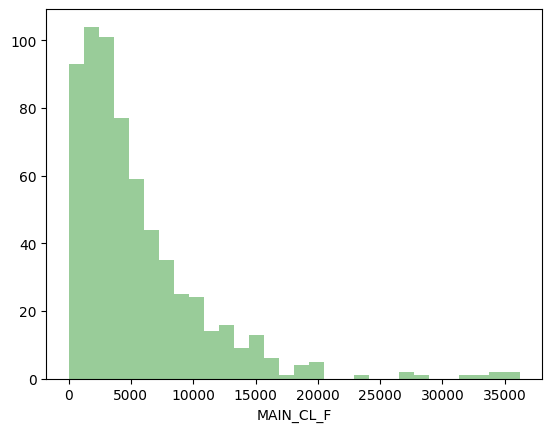

BoxPlot of MAIN_CL_F
----------------------------------------------------------------------------


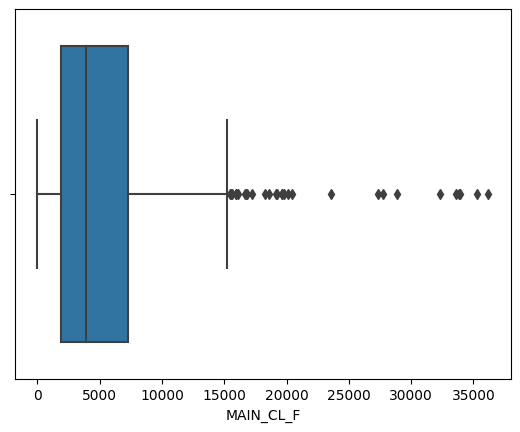

Description of MAIN_AL_M
----------------------------------------------------------------------------
count      640.000000
mean      5849.109375
std       6399.507966
min          0.000000
25%       1070.250000
50%       3936.500000
75%       8067.250000
max      40843.000000
Name: MAIN_AL_M, dtype: float64 Distribution of MAIN_AL_M
----------------------------------------------------------------------------


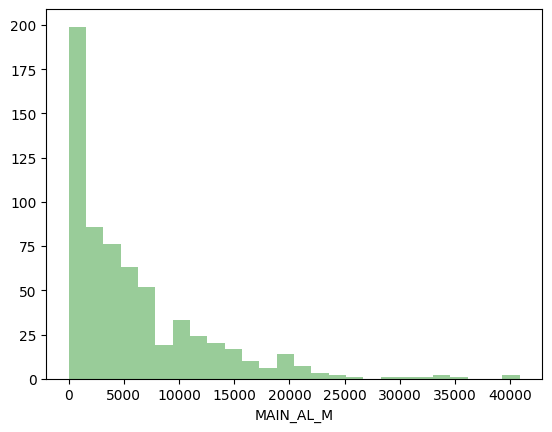

BoxPlot of MAIN_AL_M
----------------------------------------------------------------------------


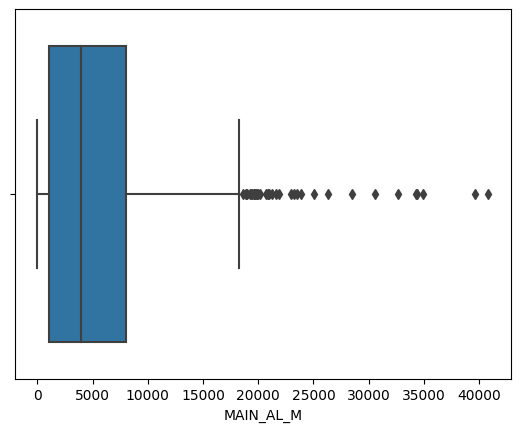

Description of MAIN_AL_F
----------------------------------------------------------------------------
count      640.000000
mean      8925.995312
std      12864.287584
min          0.000000
25%       1408.750000
50%       3933.500000
75%      10617.500000
max      87945.000000
Name: MAIN_AL_F, dtype: float64 Distribution of MAIN_AL_F
----------------------------------------------------------------------------


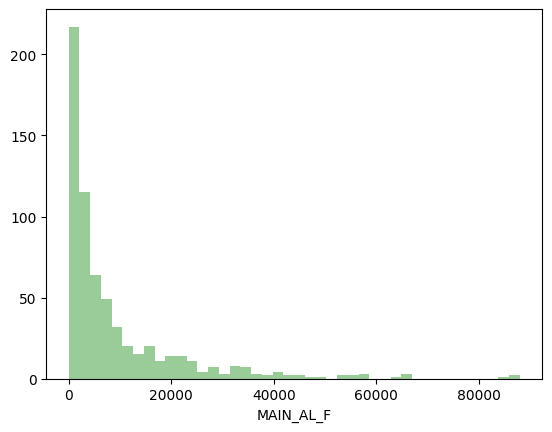

BoxPlot of MAIN_AL_F
----------------------------------------------------------------------------


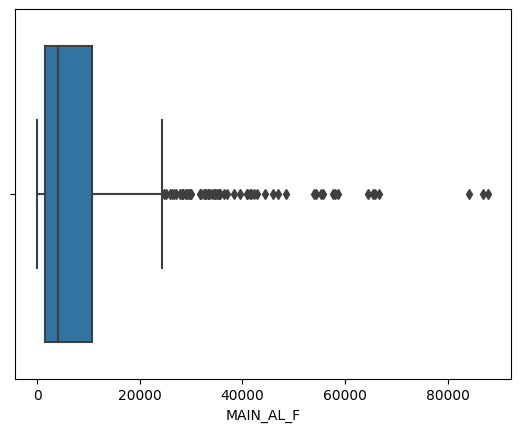

Description of MAIN_HH_M
----------------------------------------------------------------------------
count      640.000000
mean       883.893750
std       1278.642345
min          0.000000
25%        187.500000
50%        498.500000
75%       1099.250000
max      16429.000000
Name: MAIN_HH_M, dtype: float64 Distribution of MAIN_HH_M
----------------------------------------------------------------------------


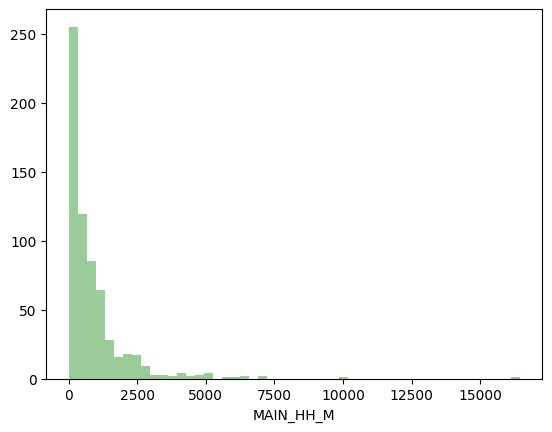

BoxPlot of MAIN_HH_M
----------------------------------------------------------------------------


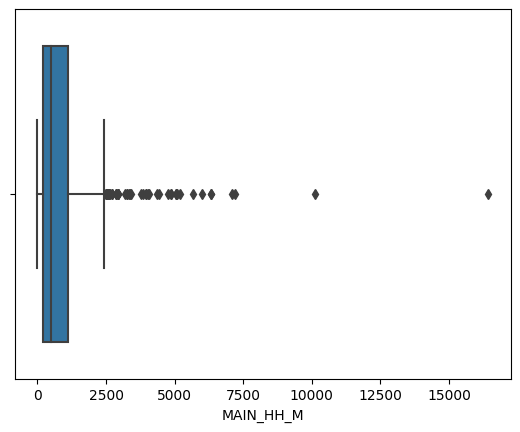

Description of MAIN_HH_F
----------------------------------------------------------------------------
count      640.000000
mean      1380.773438
std       3179.414449
min          0.000000
25%        248.750000
50%        540.500000
75%       1435.750000
max      45979.000000
Name: MAIN_HH_F, dtype: float64 Distribution of MAIN_HH_F
----------------------------------------------------------------------------


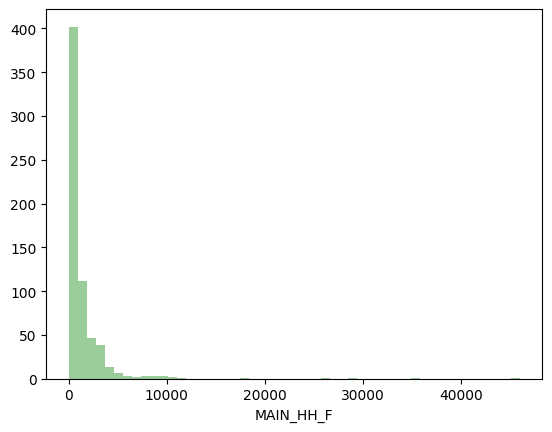

BoxPlot of MAIN_HH_F
----------------------------------------------------------------------------


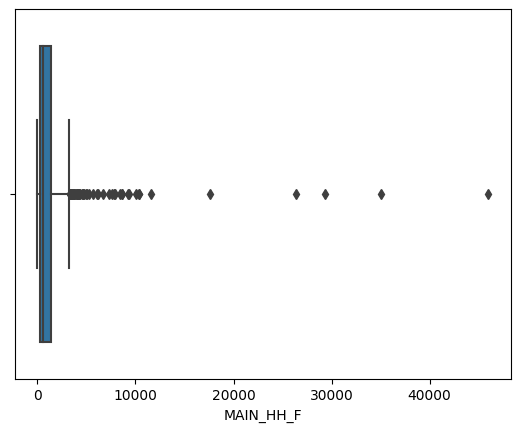

Description of MAIN_OT_M
----------------------------------------------------------------------------
count       640.000000
mean      18047.101562
std       26068.480886
min          36.000000
25%        3997.500000
50%        9598.000000
75%       21249.500000
max      240855.000000
Name: MAIN_OT_M, dtype: float64 Distribution of MAIN_OT_M
----------------------------------------------------------------------------


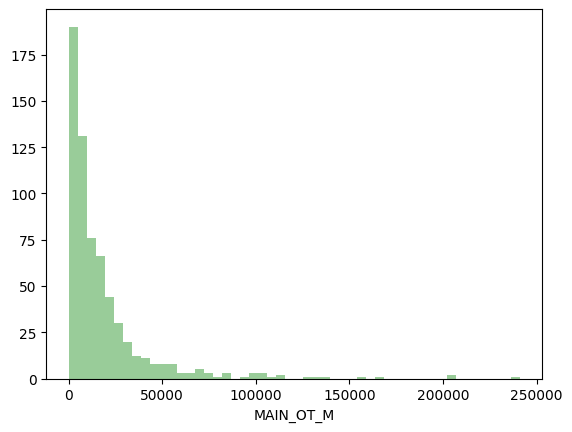

BoxPlot of MAIN_OT_M
----------------------------------------------------------------------------


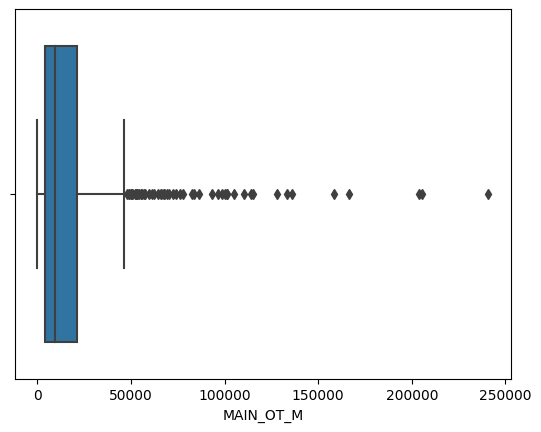

Description of MAIN_OT_F
----------------------------------------------------------------------------
count       640.000000
mean      12406.035938
std       18972.202369
min         153.000000
25%        3142.500000
50%        6380.500000
75%       14368.250000
max      209355.000000
Name: MAIN_OT_F, dtype: float64 Distribution of MAIN_OT_F
----------------------------------------------------------------------------


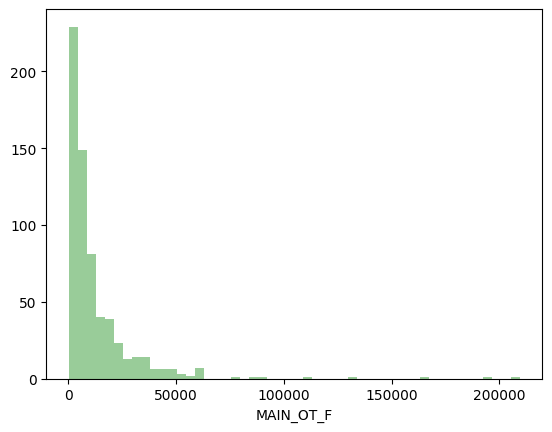

BoxPlot of MAIN_OT_F
----------------------------------------------------------------------------


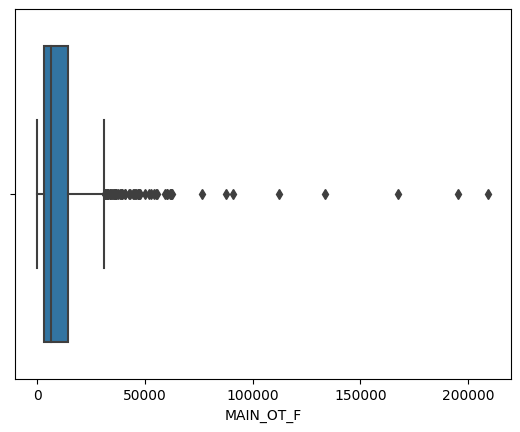

Description of MARGWORK_M
----------------------------------------------------------------------------
count      640.000000
mean      7787.960938
std       7410.791691
min         35.000000
25%       2937.500000
50%       5627.000000
75%       9800.250000
max      47553.000000
Name: MARGWORK_M, dtype: float64 Distribution of MARGWORK_M
----------------------------------------------------------------------------


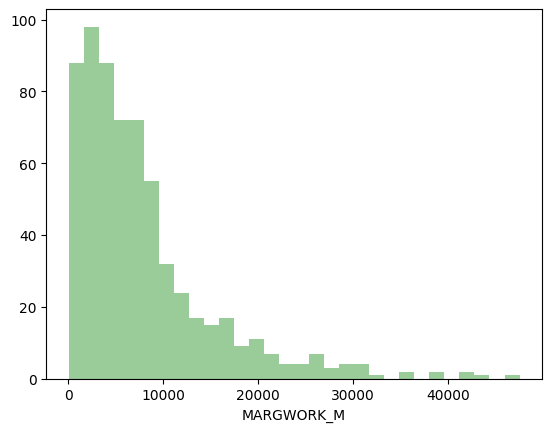

BoxPlot of MARGWORK_M
----------------------------------------------------------------------------


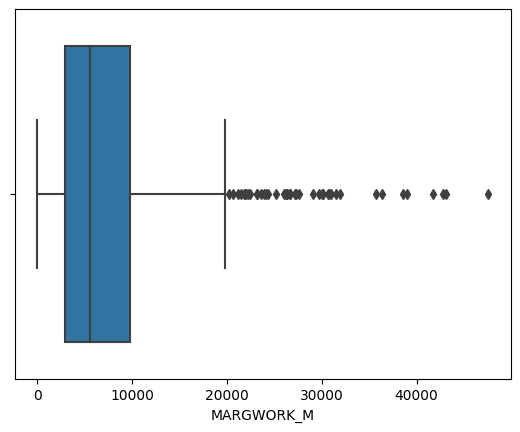

Description of MARGWORK_F
----------------------------------------------------------------------------
count      640.000000
mean     13096.914062
std      10996.474528
min        117.000000
25%       5424.500000
50%      10175.000000
75%      18879.250000
max      66915.000000
Name: MARGWORK_F, dtype: float64 Distribution of MARGWORK_F
----------------------------------------------------------------------------


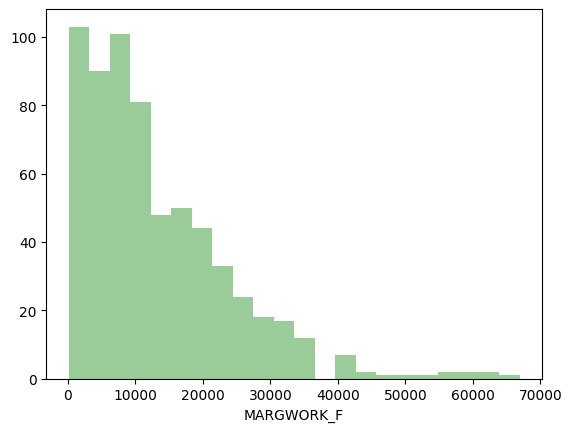

BoxPlot of MARGWORK_F
----------------------------------------------------------------------------


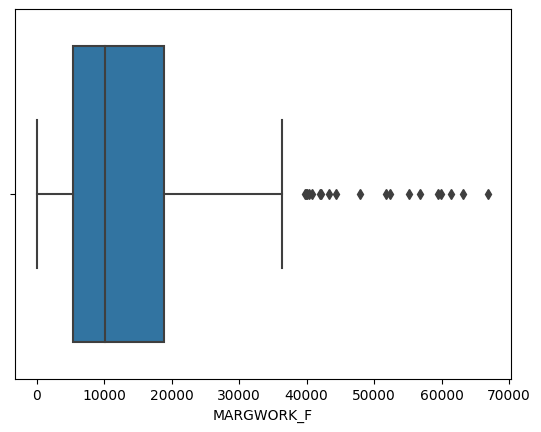

Description of MARG_CL_M
----------------------------------------------------------------------------
count      640.000000
mean      1040.737500
std       1311.546847
min          0.000000
25%        311.750000
50%        606.500000
75%       1281.000000
max      13201.000000
Name: MARG_CL_M, dtype: float64 Distribution of MARG_CL_M
----------------------------------------------------------------------------


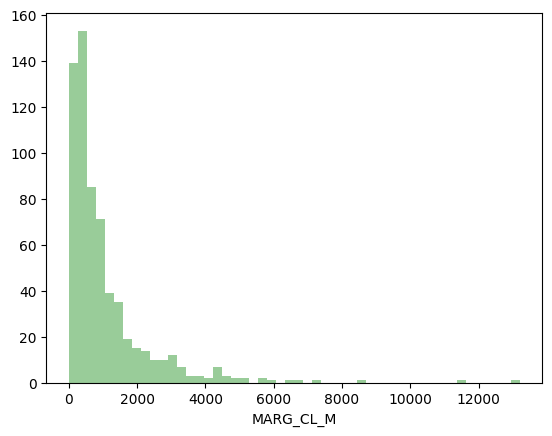

BoxPlot of MARG_CL_M
----------------------------------------------------------------------------


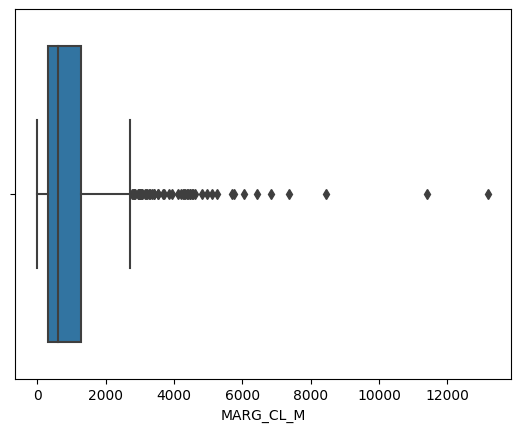

Description of MARG_CL_F
----------------------------------------------------------------------------
count      640.000000
mean      2307.682813
std       3564.626095
min          0.000000
25%        630.250000
50%       1226.000000
75%       2659.250000
max      44324.000000
Name: MARG_CL_F, dtype: float64 Distribution of MARG_CL_F
----------------------------------------------------------------------------


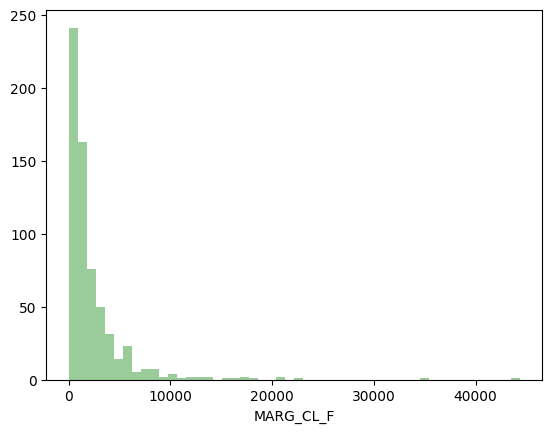

BoxPlot of MARG_CL_F
----------------------------------------------------------------------------


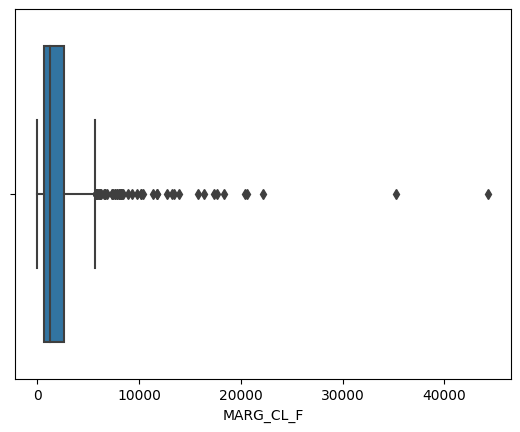

Description of MARG_AL_M
----------------------------------------------------------------------------
count      640.000000
mean      3304.326562
std       3781.555707
min          0.000000
25%        873.500000
50%       2062.000000
75%       4300.750000
max      23719.000000
Name: MARG_AL_M, dtype: float64 Distribution of MARG_AL_M
----------------------------------------------------------------------------


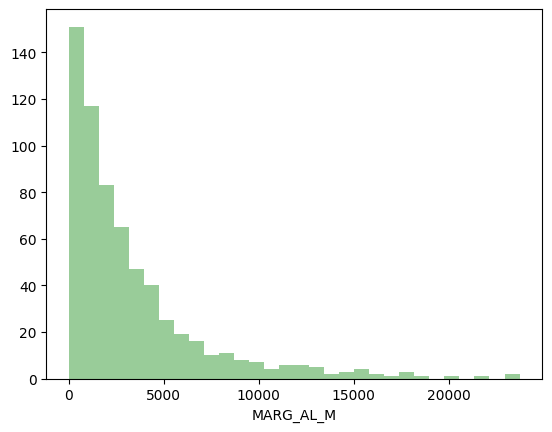

BoxPlot of MARG_AL_M
----------------------------------------------------------------------------


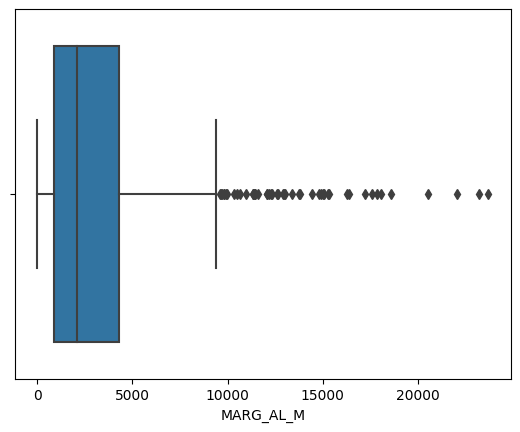

Description of MARG_AL_F
----------------------------------------------------------------------------
count      640.000000
mean      6463.281250
std       6773.876298
min          0.000000
25%       1402.500000
50%       4020.500000
75%       9089.250000
max      45301.000000
Name: MARG_AL_F, dtype: float64 Distribution of MARG_AL_F
----------------------------------------------------------------------------


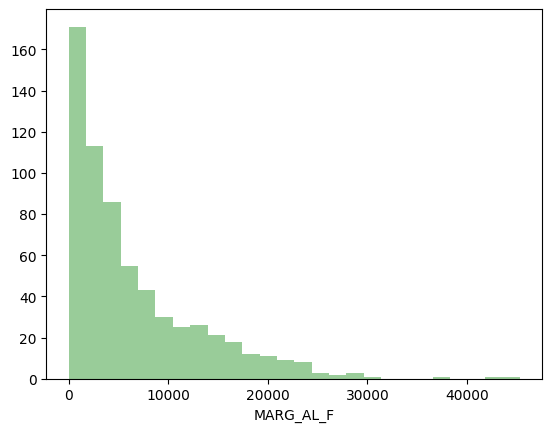

BoxPlot of MARG_AL_F
----------------------------------------------------------------------------


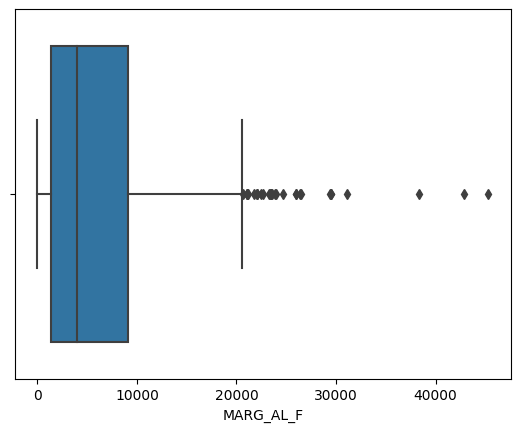

Description of MARG_HH_M
----------------------------------------------------------------------------
count     640.000000
mean      316.742188
std       462.661891
min         0.000000
25%        71.750000
50%       166.000000
75%       356.500000
max      4298.000000
Name: MARG_HH_M, dtype: float64 Distribution of MARG_HH_M
----------------------------------------------------------------------------


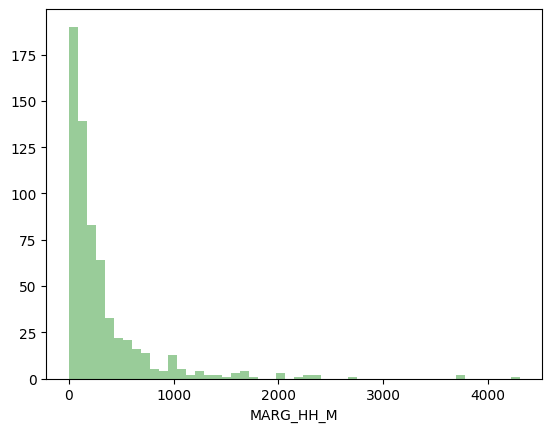

BoxPlot of MARG_HH_M
----------------------------------------------------------------------------


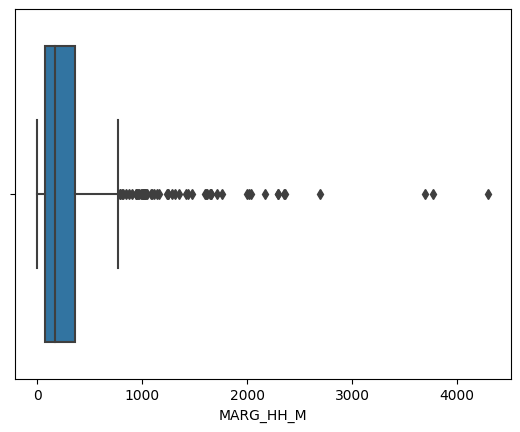

Description of MARG_HH_F
----------------------------------------------------------------------------
count      640.000000
mean       786.626562
std       1198.718213
min          0.000000
25%        171.750000
50%        429.000000
75%        962.500000
max      15448.000000
Name: MARG_HH_F, dtype: float64 Distribution of MARG_HH_F
----------------------------------------------------------------------------


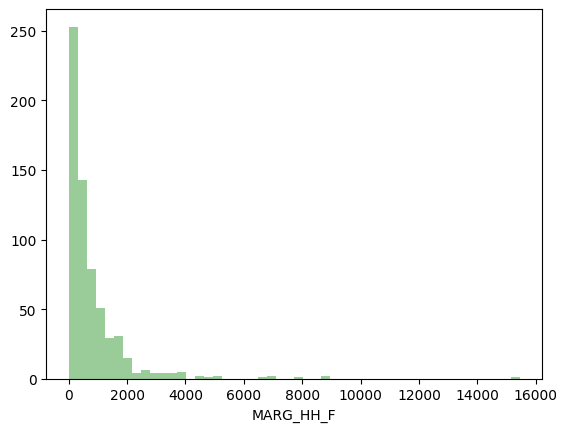

BoxPlot of MARG_HH_F
----------------------------------------------------------------------------


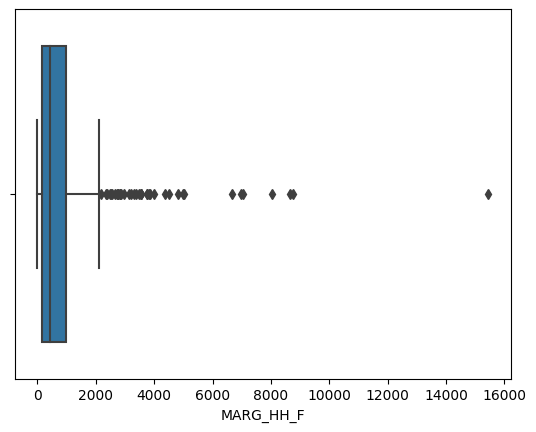

Description of MARG_OT_M
----------------------------------------------------------------------------
count      640.000000
mean      3126.154687
std       3609.391821
min          7.000000
25%        935.500000
50%       2036.000000
75%       3985.250000
max      24728.000000
Name: MARG_OT_M, dtype: float64 Distribution of MARG_OT_M
----------------------------------------------------------------------------


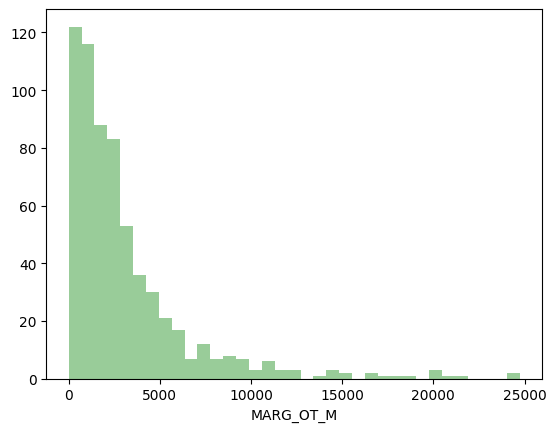

BoxPlot of MARG_OT_M
----------------------------------------------------------------------------


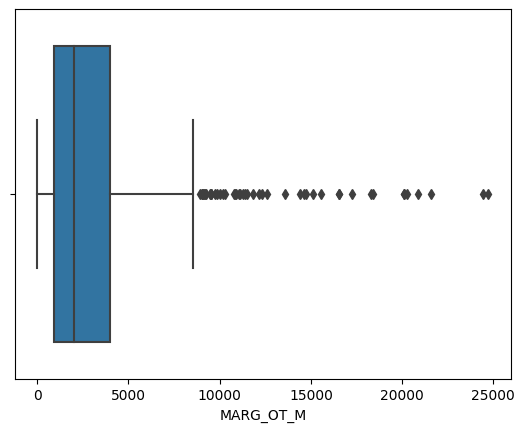

Description of MARG_OT_F
----------------------------------------------------------------------------
count      640.000000
mean      3539.323438
std       4115.191314
min         19.000000
25%       1071.750000
50%       2349.500000
75%       4400.500000
max      36377.000000
Name: MARG_OT_F, dtype: float64 Distribution of MARG_OT_F
----------------------------------------------------------------------------


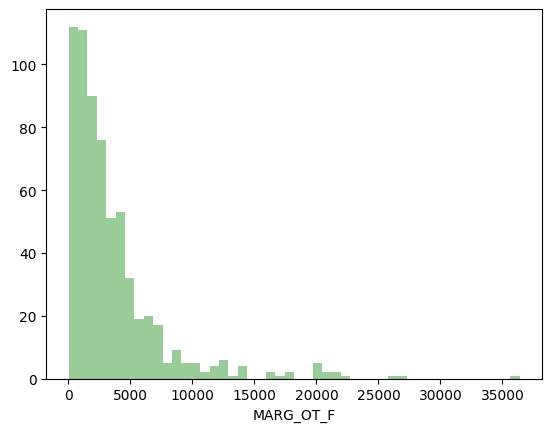

BoxPlot of MARG_OT_F
----------------------------------------------------------------------------


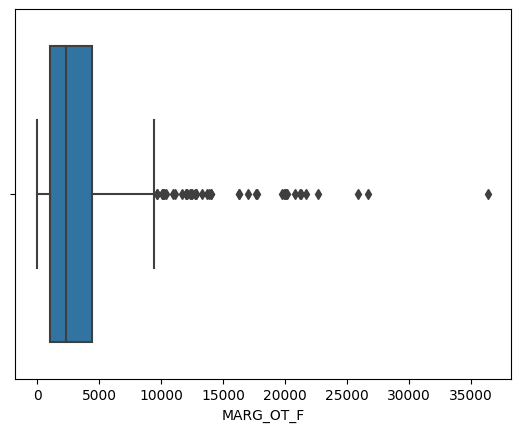

Description of MARGWORK_3_6_M
----------------------------------------------------------------------------
count       640.000000
mean      41948.168750
std       39045.316918
min         291.000000
25%       16208.250000
50%       30315.000000
75%       57218.750000
max      300937.000000
Name: MARGWORK_3_6_M, dtype: float64 Distribution of MARGWORK_3_6_M
----------------------------------------------------------------------------


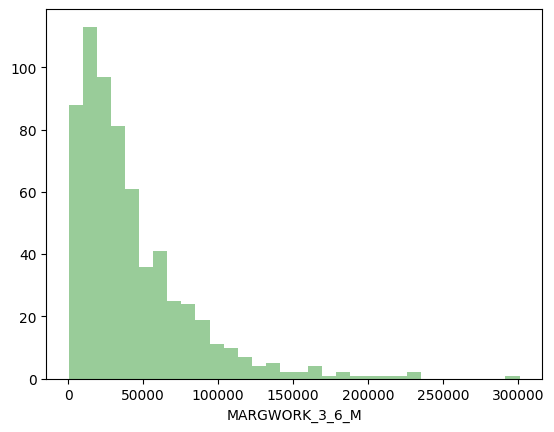

BoxPlot of MARGWORK_3_6_M
----------------------------------------------------------------------------


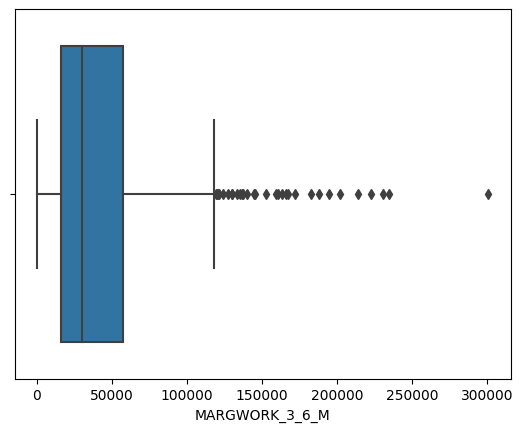

Description of MARGWORK_3_6_F
----------------------------------------------------------------------------
count       640.000000
mean      81076.323438
std       82970.406216
min         341.000000
25%       26619.500000
50%       56793.000000
75%      107924.000000
max      676450.000000
Name: MARGWORK_3_6_F, dtype: float64 Distribution of MARGWORK_3_6_F
----------------------------------------------------------------------------


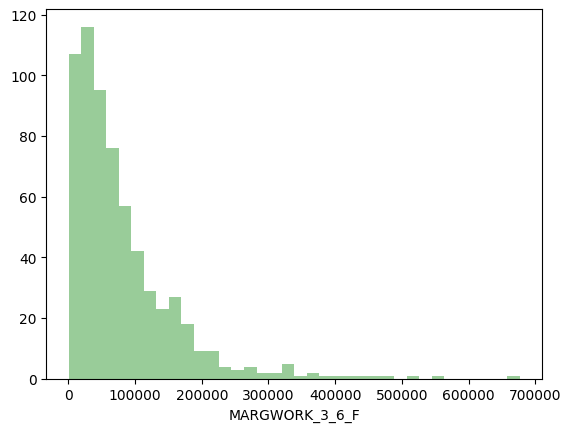

BoxPlot of MARGWORK_3_6_F
----------------------------------------------------------------------------


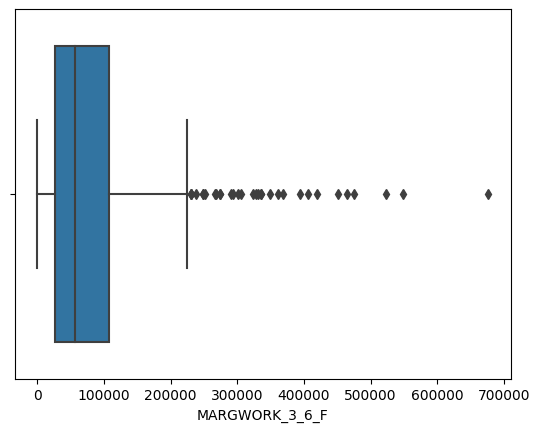

Description of MARG_CL_3_6_M
----------------------------------------------------------------------------
count      640.000000
mean      6394.987500
std       6019.806644
min         27.000000
25%       2372.000000
50%       4630.000000
75%       8167.000000
max      39106.000000
Name: MARG_CL_3_6_M, dtype: float64 Distribution of MARG_CL_3_6_M
----------------------------------------------------------------------------


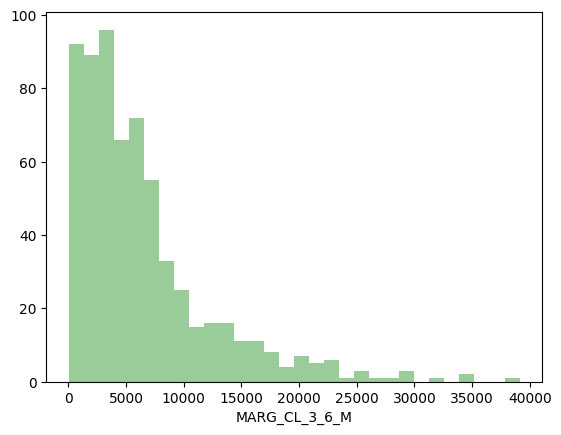

BoxPlot of MARG_CL_3_6_M
----------------------------------------------------------------------------


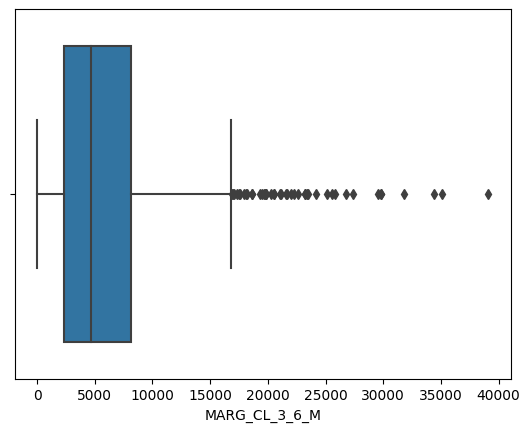

Description of MARG_CL_3_6_F
----------------------------------------------------------------------------
count      640.000000
mean     10339.864063
std       8467.473429
min         85.000000
25%       4351.500000
50%       8295.000000
75%      15102.000000
max      50065.000000
Name: MARG_CL_3_6_F, dtype: float64 Distribution of MARG_CL_3_6_F
----------------------------------------------------------------------------


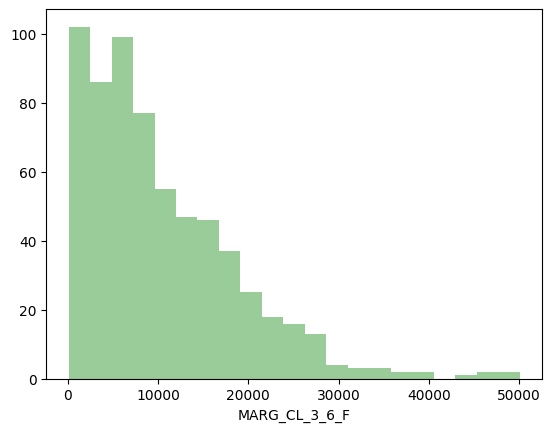

BoxPlot of MARG_CL_3_6_F
----------------------------------------------------------------------------


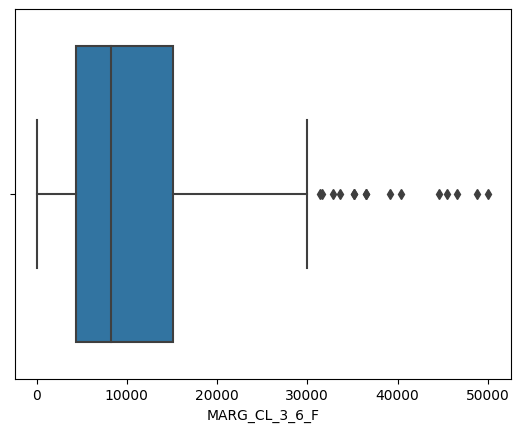

Description of MARG_AL_3_6_M
----------------------------------------------------------------------------
count     640.000000
mean      789.848438
std       905.639279
min         0.000000
25%       235.500000
50%       480.500000
75%       986.000000
max      7426.000000
Name: MARG_AL_3_6_M, dtype: float64 Distribution of MARG_AL_3_6_M
----------------------------------------------------------------------------


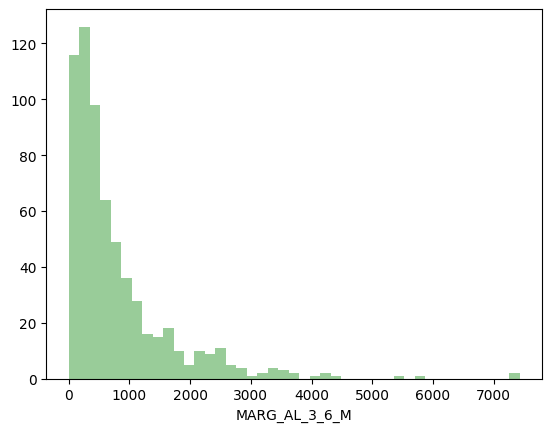

BoxPlot of MARG_AL_3_6_M
----------------------------------------------------------------------------


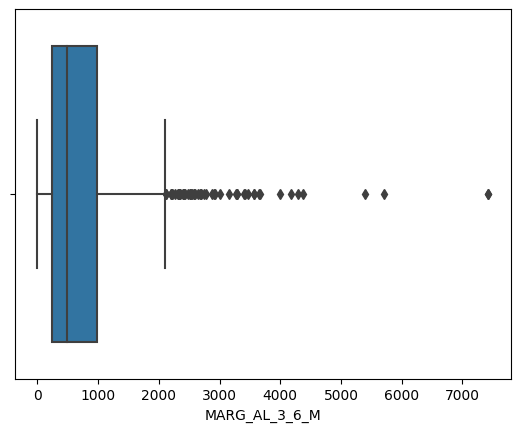

Description of MARG_AL_3_6_F
----------------------------------------------------------------------------
count      640.000000
mean      1749.584375
std       2496.541514
min          0.000000
25%        497.250000
50%        985.500000
75%       2059.000000
max      27171.000000
Name: MARG_AL_3_6_F, dtype: float64 Distribution of MARG_AL_3_6_F
----------------------------------------------------------------------------


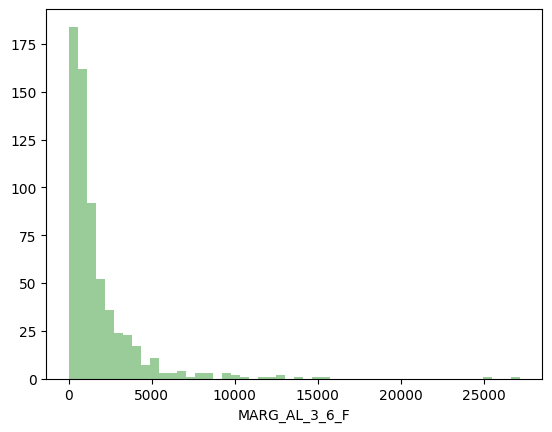

BoxPlot of MARG_AL_3_6_F
----------------------------------------------------------------------------


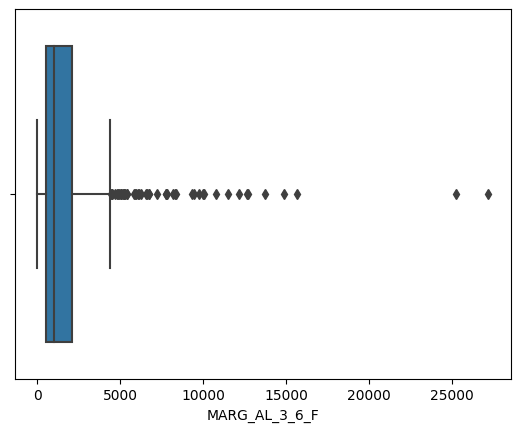

Description of MARG_HH_3_6_M
----------------------------------------------------------------------------
count      640.000000
mean      2743.635938
std       3059.586387
min          0.000000
25%        718.750000
50%       1714.500000
75%       3702.250000
max      19343.000000
Name: MARG_HH_3_6_M, dtype: float64 Distribution of MARG_HH_3_6_M
----------------------------------------------------------------------------


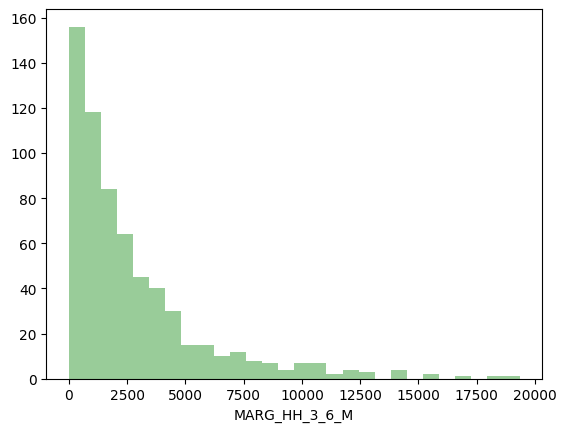

BoxPlot of MARG_HH_3_6_M
----------------------------------------------------------------------------


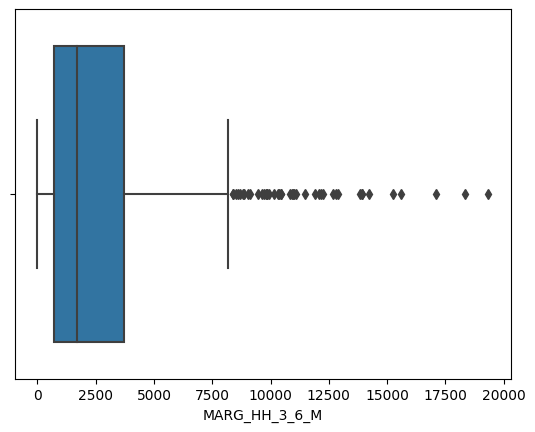

Description of MARG_HH_3_6_F
----------------------------------------------------------------------------
count      640.00000
mean      5169.85000
std       5335.64096
min          0.00000
25%       1113.75000
50%       3294.00000
75%       7502.25000
max      36253.00000
Name: MARG_HH_3_6_F, dtype: float64 Distribution of MARG_HH_3_6_F
----------------------------------------------------------------------------


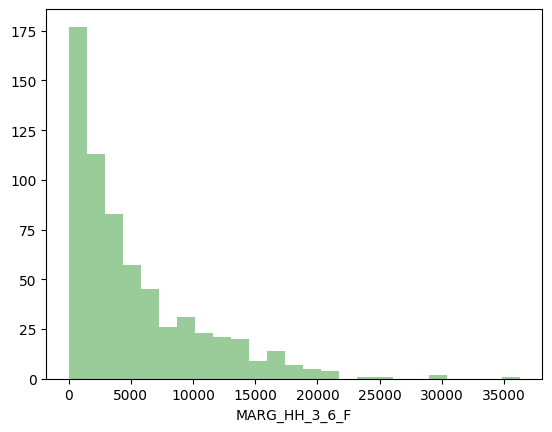

BoxPlot of MARG_HH_3_6_F
----------------------------------------------------------------------------


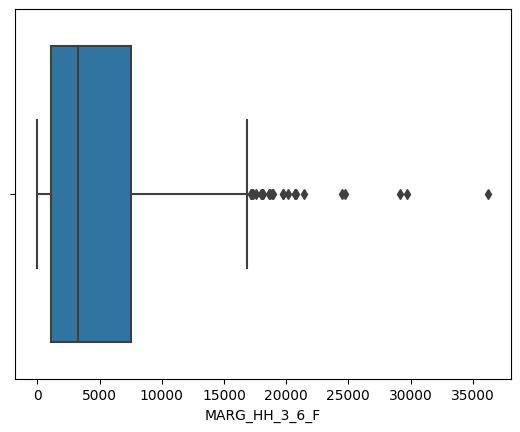

Description of MARG_OT_3_6_M
----------------------------------------------------------------------------
count     640.000000
mean      245.362500
std       358.728567
min         0.000000
25%        58.000000
50%       129.500000
75%       276.000000
max      3535.000000
Name: MARG_OT_3_6_M, dtype: float64 Distribution of MARG_OT_3_6_M
----------------------------------------------------------------------------


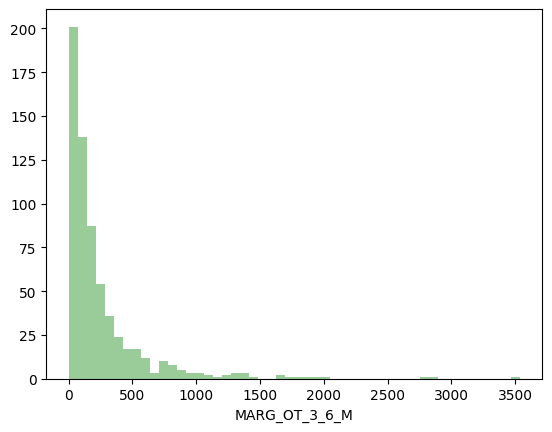

BoxPlot of MARG_OT_3_6_M
----------------------------------------------------------------------------


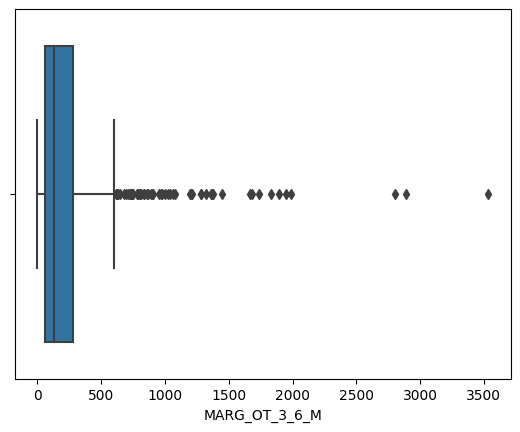

Description of MARG_OT_3_6_F
----------------------------------------------------------------------------
count      640.000000
mean       585.884375
std        900.025817
min          0.000000
25%        127.750000
50%        320.500000
75%        719.250000
max      12094.000000
Name: MARG_OT_3_6_F, dtype: float64 Distribution of MARG_OT_3_6_F
----------------------------------------------------------------------------


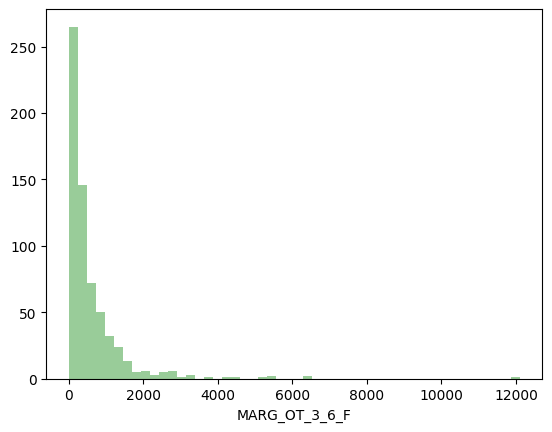

BoxPlot of MARG_OT_3_6_F
----------------------------------------------------------------------------


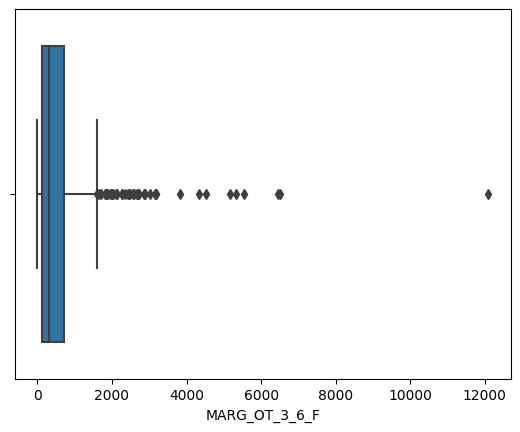

Description of MARGWORK_0_3_M
----------------------------------------------------------------------------
count      640.000000
mean      2616.140625
std       3036.964381
min          7.000000
25%        755.000000
50%       1681.500000
75%       3320.250000
max      20648.000000
Name: MARGWORK_0_3_M, dtype: float64 Distribution of MARGWORK_0_3_M
----------------------------------------------------------------------------


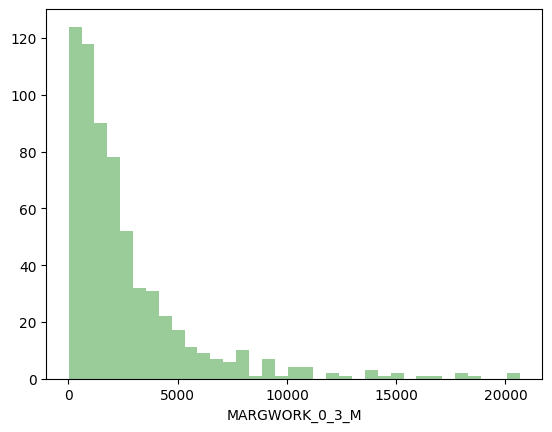

BoxPlot of MARGWORK_0_3_M
----------------------------------------------------------------------------


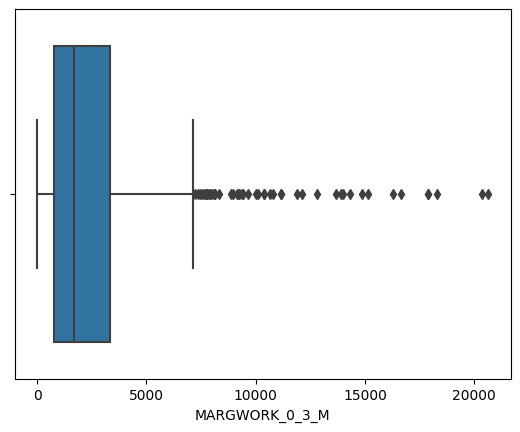

Description of MARGWORK_0_3_F
----------------------------------------------------------------------------
count      640.000000
mean      2834.545312
std       3327.836932
min         14.000000
25%        833.500000
50%       1834.500000
75%       3610.500000
max      25844.000000
Name: MARGWORK_0_3_F, dtype: float64 Distribution of MARGWORK_0_3_F
----------------------------------------------------------------------------


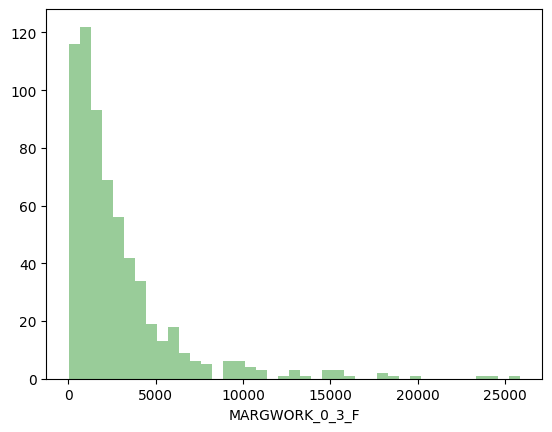

BoxPlot of MARGWORK_0_3_F
----------------------------------------------------------------------------


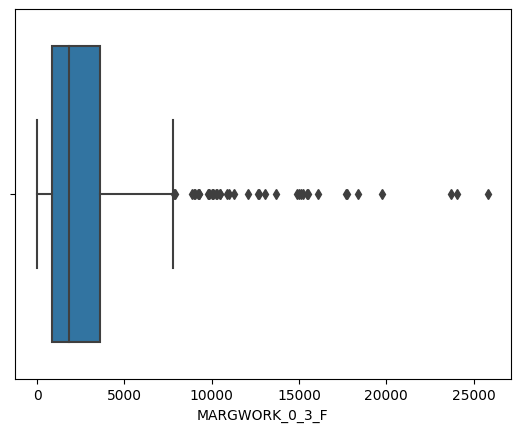

Description of MARG_CL_0_3_M
----------------------------------------------------------------------------
count     640.000000
mean     1392.973438
std      1489.707052
min         4.000000
25%       489.500000
50%       949.000000
75%      1714.000000
max      9875.000000
Name: MARG_CL_0_3_M, dtype: float64 Distribution of MARG_CL_0_3_M
----------------------------------------------------------------------------


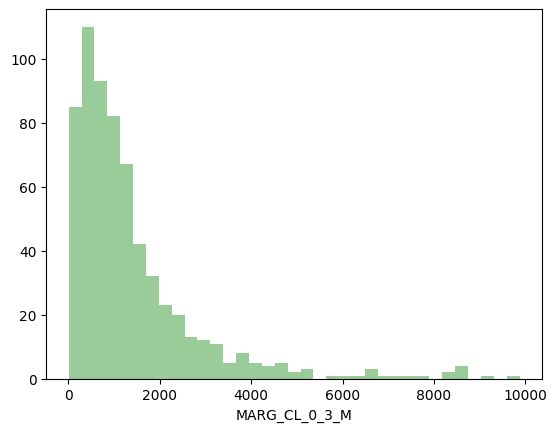

BoxPlot of MARG_CL_0_3_M
----------------------------------------------------------------------------


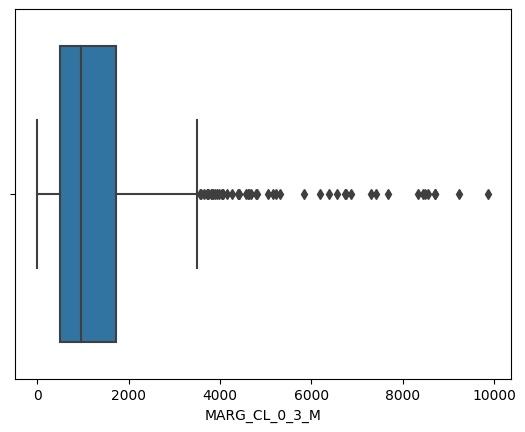

Description of MARG_CL_0_3_F
----------------------------------------------------------------------------
count      640.000000
mean      2757.050000
std       2788.776676
min         30.000000
25%        957.250000
50%       1928.000000
75%       3599.750000
max      21611.000000
Name: MARG_CL_0_3_F, dtype: float64 Distribution of MARG_CL_0_3_F
----------------------------------------------------------------------------


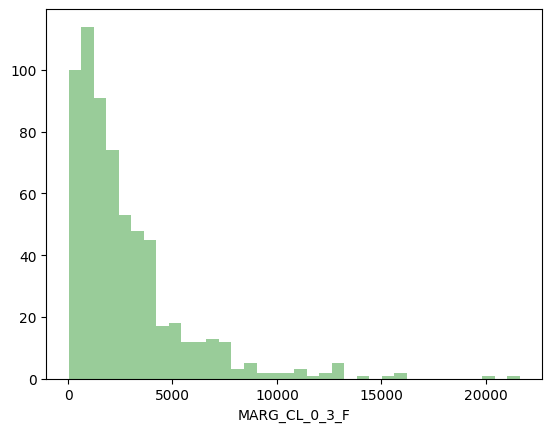

BoxPlot of MARG_CL_0_3_F
----------------------------------------------------------------------------


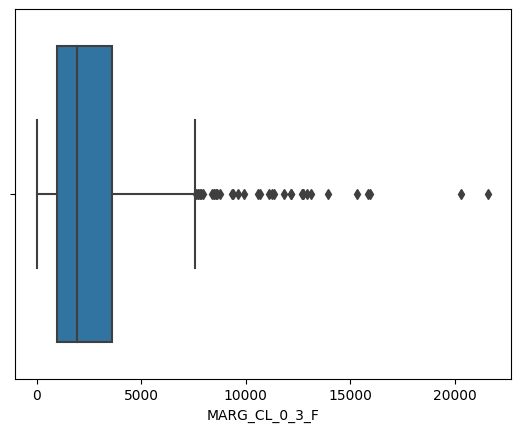

Description of MARG_AL_0_3_M
----------------------------------------------------------------------------
count     640.000000
mean      250.889062
std       453.336594
min         0.000000
25%        47.000000
50%       114.500000
75%       270.750000
max      5775.000000
Name: MARG_AL_0_3_M, dtype: float64 Distribution of MARG_AL_0_3_M
----------------------------------------------------------------------------


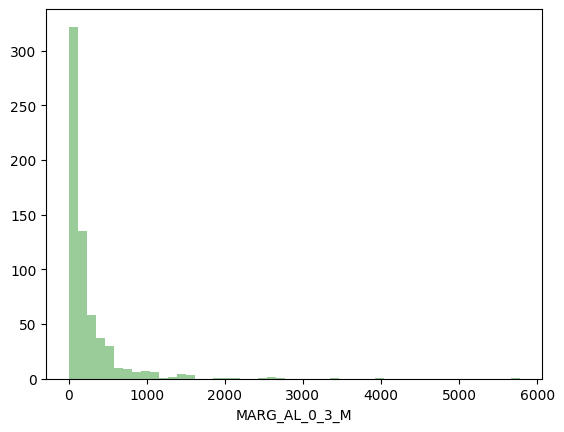

BoxPlot of MARG_AL_0_3_M
----------------------------------------------------------------------------


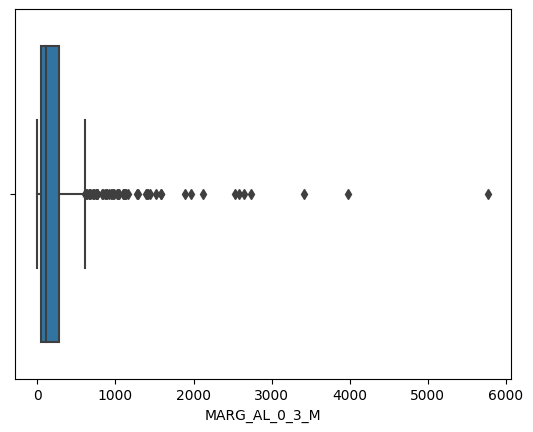

Description of MARG_AL_0_3_F
----------------------------------------------------------------------------
count      640.000000
mean       558.098438
std       1117.642748
min          0.000000
25%        109.000000
50%        247.500000
75%        568.750000
max      17153.000000
Name: MARG_AL_0_3_F, dtype: float64 Distribution of MARG_AL_0_3_F
----------------------------------------------------------------------------


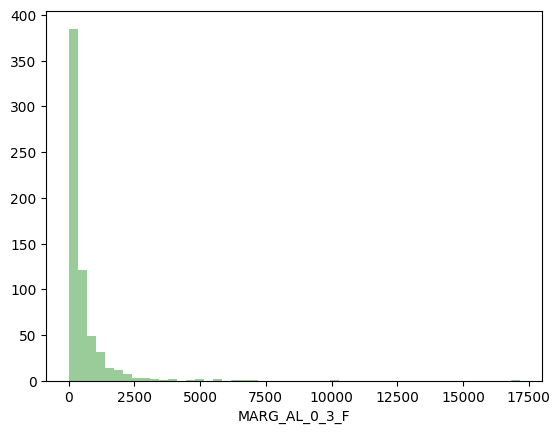

BoxPlot of MARG_AL_0_3_F
----------------------------------------------------------------------------


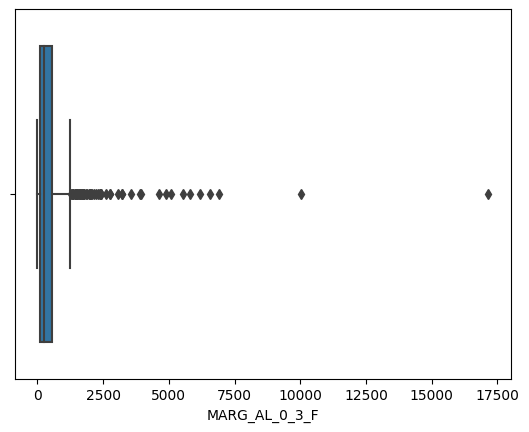

Description of MARG_HH_0_3_M
----------------------------------------------------------------------------
count     640.000000
mean      560.690625
std       762.578991
min         0.000000
25%       136.500000
50%       308.000000
75%       642.000000
max      6116.000000
Name: MARG_HH_0_3_M, dtype: float64 Distribution of MARG_HH_0_3_M
----------------------------------------------------------------------------


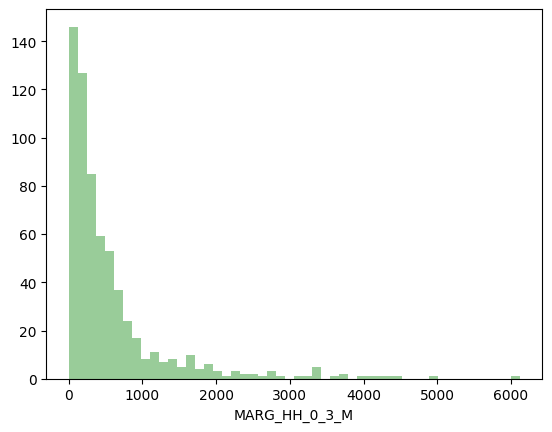

BoxPlot of MARG_HH_0_3_M
----------------------------------------------------------------------------


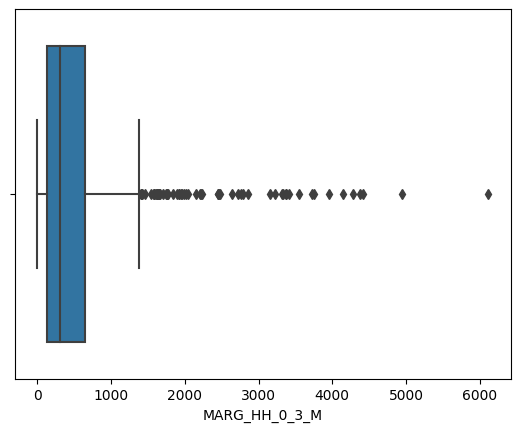

Description of MARG_HH_0_3_F
----------------------------------------------------------------------------
count      640.000000
mean      1293.431250
std       1585.377936
min          0.000000
25%        298.000000
50%        717.000000
75%       1710.750000
max      13714.000000
Name: MARG_HH_0_3_F, dtype: float64 Distribution of MARG_HH_0_3_F
----------------------------------------------------------------------------


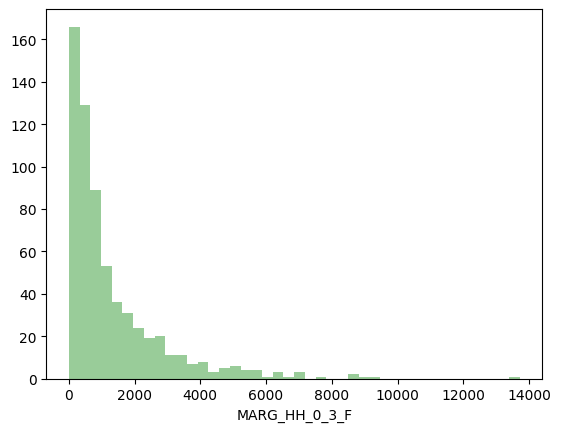

BoxPlot of MARG_HH_0_3_F
----------------------------------------------------------------------------


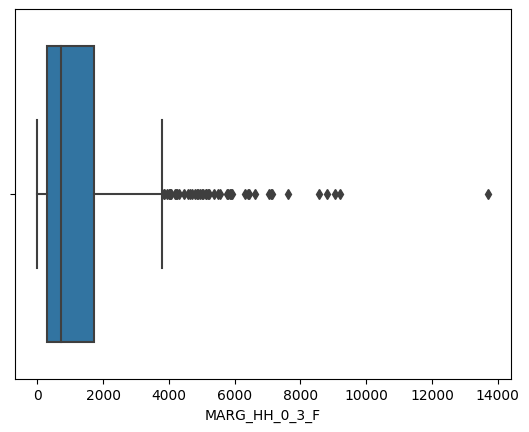

Description of MARG_OT_0_3_M
----------------------------------------------------------------------------
count    640.000000
mean      71.379688
std      107.897627
min        0.000000
25%       14.000000
50%       35.000000
75%       79.000000
max      895.000000
Name: MARG_OT_0_3_M, dtype: float64 Distribution of MARG_OT_0_3_M
----------------------------------------------------------------------------


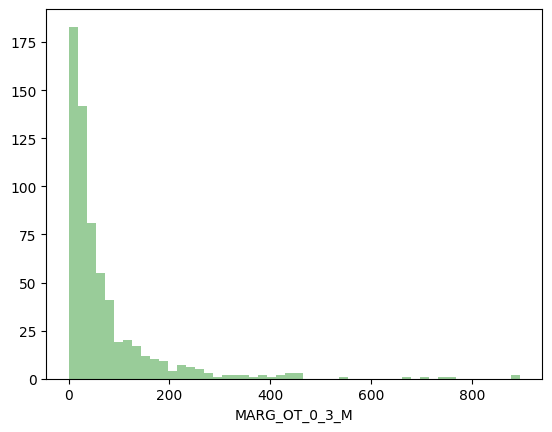

BoxPlot of MARG_OT_0_3_M
----------------------------------------------------------------------------


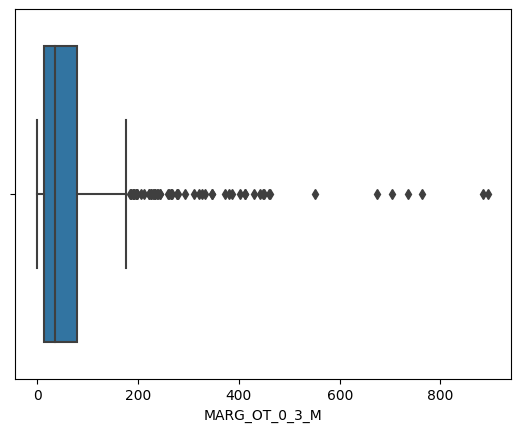

Description of MARG_OT_0_3_F
----------------------------------------------------------------------------
count     640.000000
mean      200.742188
std       309.740854
min         0.000000
25%        43.000000
50%       113.000000
75%       240.000000
max      3354.000000
Name: MARG_OT_0_3_F, dtype: float64 Distribution of MARG_OT_0_3_F
----------------------------------------------------------------------------


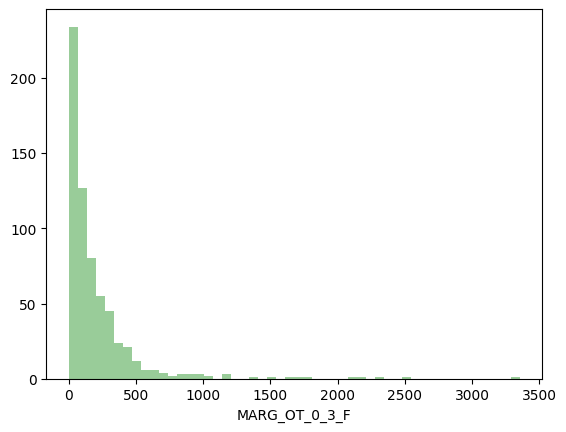

BoxPlot of MARG_OT_0_3_F
----------------------------------------------------------------------------


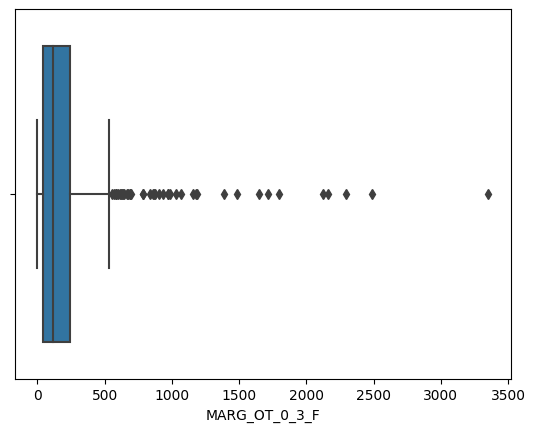

Description of NON_WORK_M
----------------------------------------------------------------------------
count     640.000000
mean      510.014063
std       610.603187
min         0.000000
25%       161.000000
50%       326.000000
75%       604.500000
max      6456.000000
Name: NON_WORK_M, dtype: float64 Distribution of NON_WORK_M
----------------------------------------------------------------------------


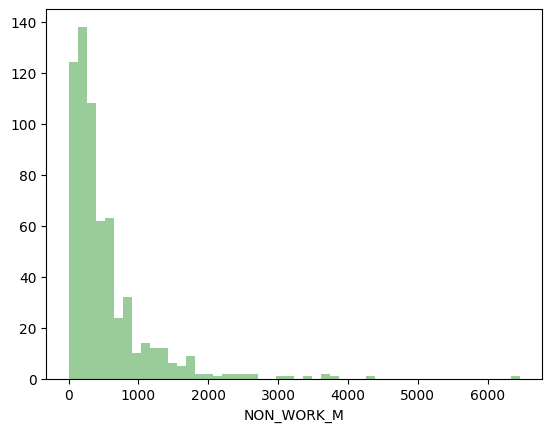

BoxPlot of NON_WORK_M
----------------------------------------------------------------------------


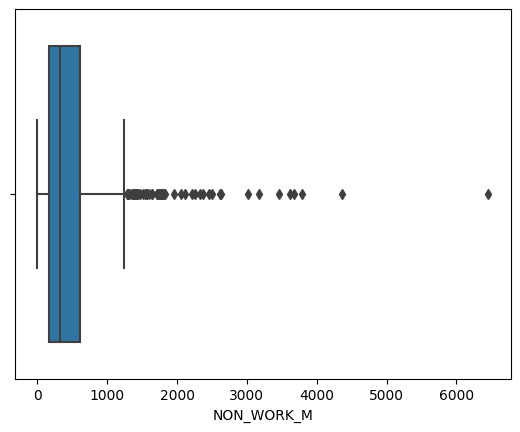

Description of NON_WORK_F
----------------------------------------------------------------------------
count      640.000000
mean       704.778125
std        910.209225
min          5.000000
25%        220.500000
50%        464.500000
75%        853.500000
max      10533.000000
Name: NON_WORK_F, dtype: float64 Distribution of NON_WORK_F
----------------------------------------------------------------------------


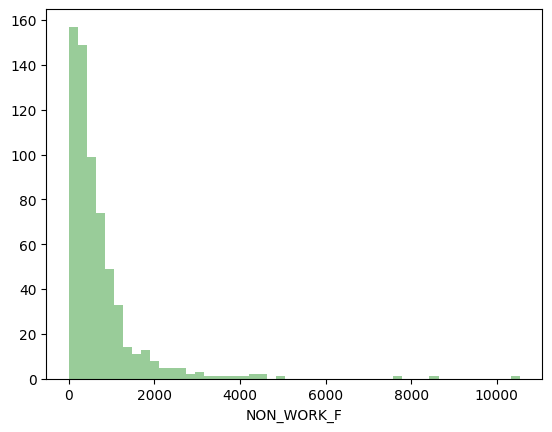

BoxPlot of NON_WORK_F
----------------------------------------------------------------------------


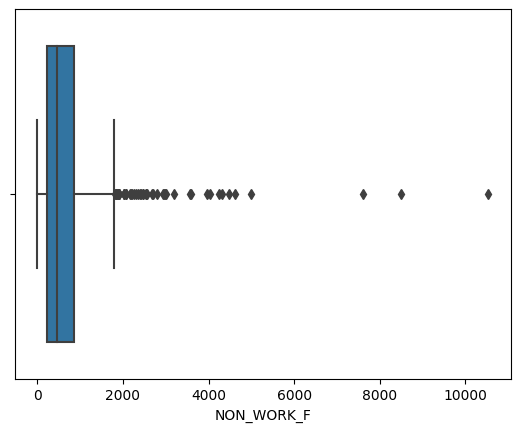

In [82]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

In [83]:
def univariateAnalysis_category(cat_column):
    print("Details of " + cat_column)
    print("----------------------------------------------------------------")
    print(df_cat[cat_column].value_counts())
    plt.figure()
    df_cat[cat_column].value_counts().plot.bar(title="Frequency Distribution of " + cat_column)
    plt.show()
    print("       ")

In [84]:
df_cat = df.select_dtypes(include = ['object'])
lstcatcolumns = list(df_cat.columns.values)
lstcatcolumns

['State', 'Area Name']

In [85]:
lstcatcolumns.remove('Area Name')

Details of State
----------------------------------------------------------------
Uttar Pradesh               71
Madhya Pradesh              50
Bihar                       38
Maharashtra                 35
Rajasthan                   33
Tamil Nadu                  32
Karnataka                   30
Odisha                      30
Assam                       27
Gujarat                     26
Jharkhand                   24
Andhra Pradesh              23
Jammu & Kashmir             22
Haryana                     21
Punjab                      20
West Bengal                 19
Chhattisgarh                18
Arunachal Pradesh           16
Kerala                      14
Uttarakhand                 13
Himachal Pradesh            12
Nagaland                    11
Manipur                      9
NCT of Delhi                 9
Mizoram                      8
Meghalaya                    7
Tripura                      4
Sikkim                       4
Puducherry                   4
Andaman & Nicobar I

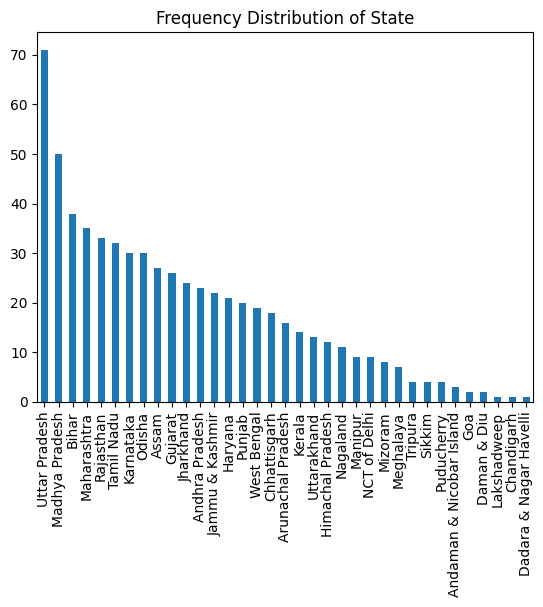

In [86]:
for x in lstcatcolumns:
    univariateAnalysis_category(x)

In [87]:
corr = df_num.corr(method='pearson')

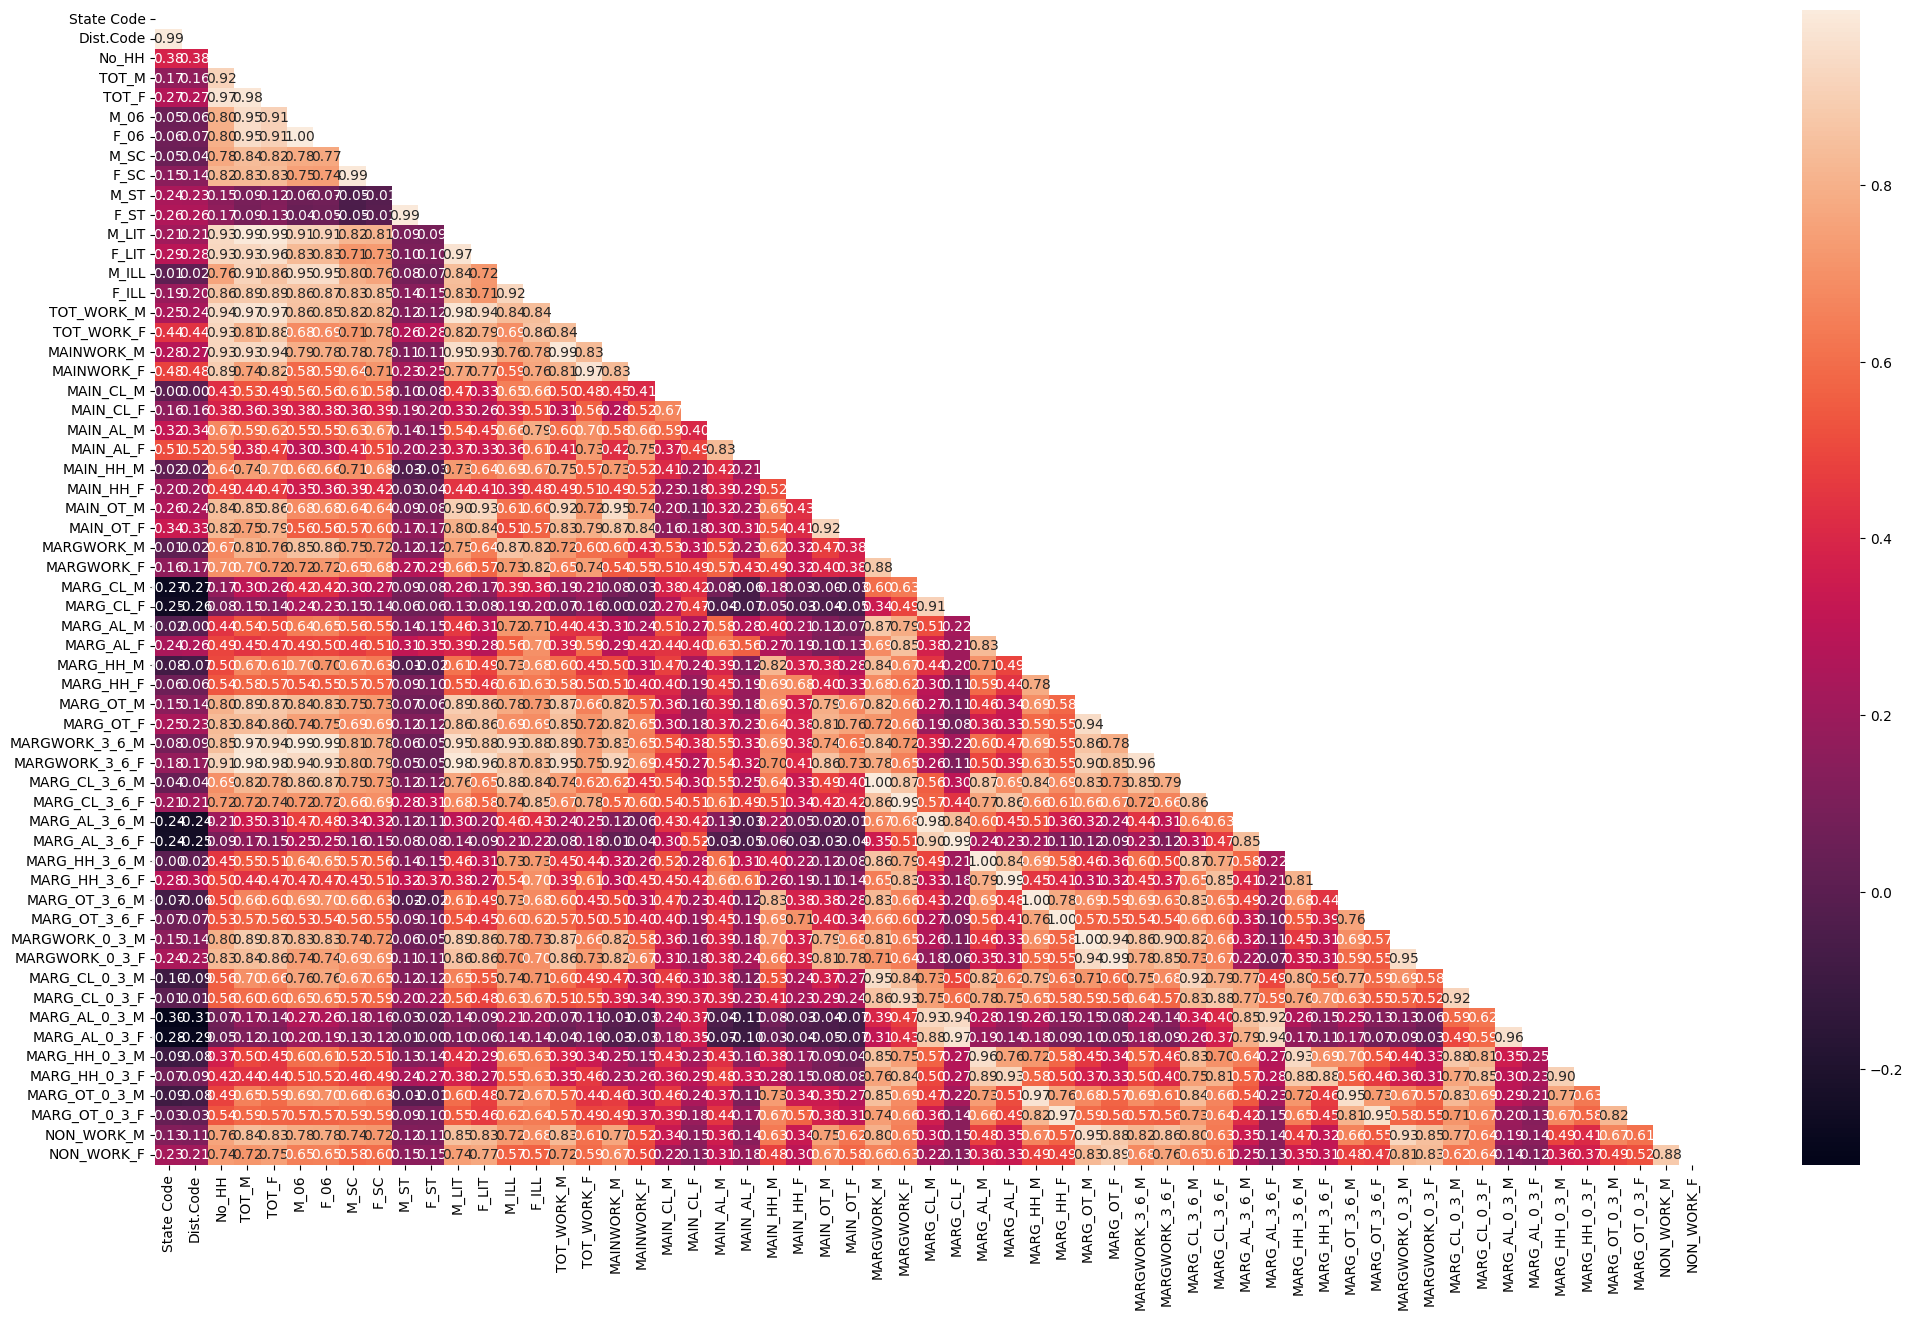

In [88]:
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(25, 15))
sns.heatmap(df_num.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

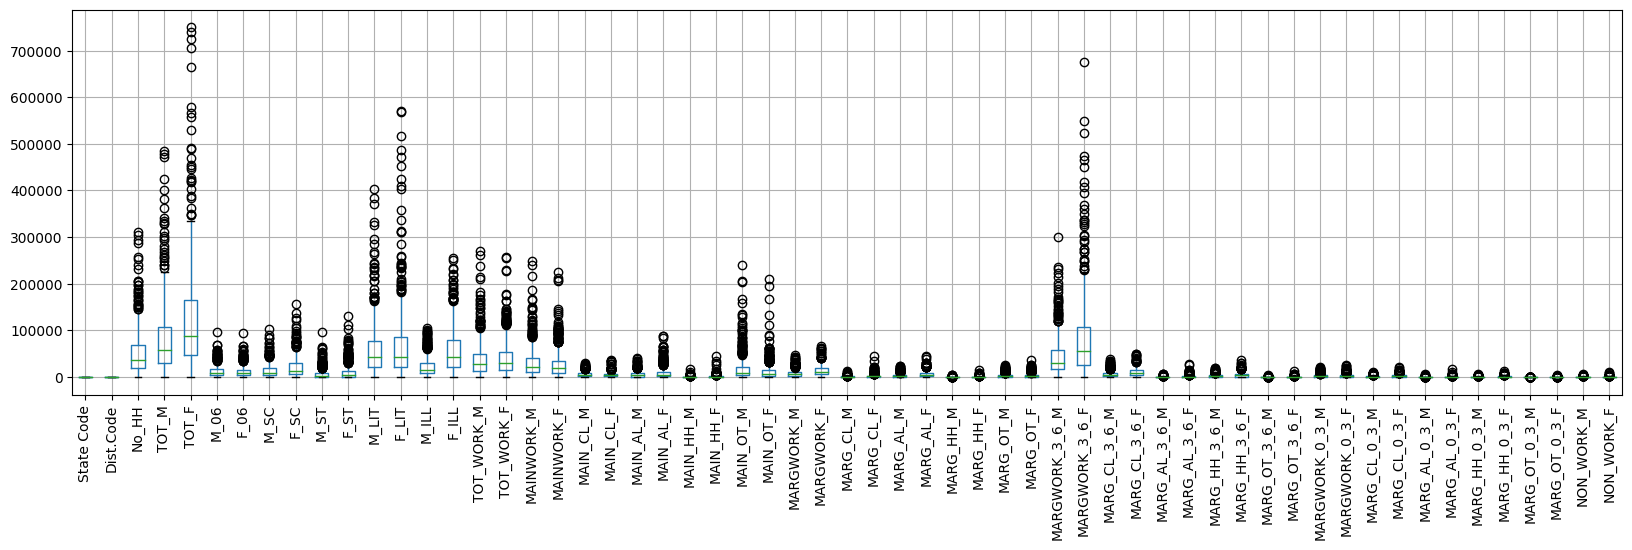

In [89]:
df_num.boxplot(figsize=(20,5))
plt.xticks(rotation=90)
plt.show()

In [90]:
def treat_outlier(x):
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
    IQR=q75-q25
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    return x.apply(lambda y: dt if y > upper_bound else y).apply(lambda y: q5 if y < lower_bound else y)

In [91]:
outlier_list = [x for x in df_num.columns]

In [92]:
for i in df_num[outlier_list]:    
    df_num[i]=treat_outlier(df_num[i])

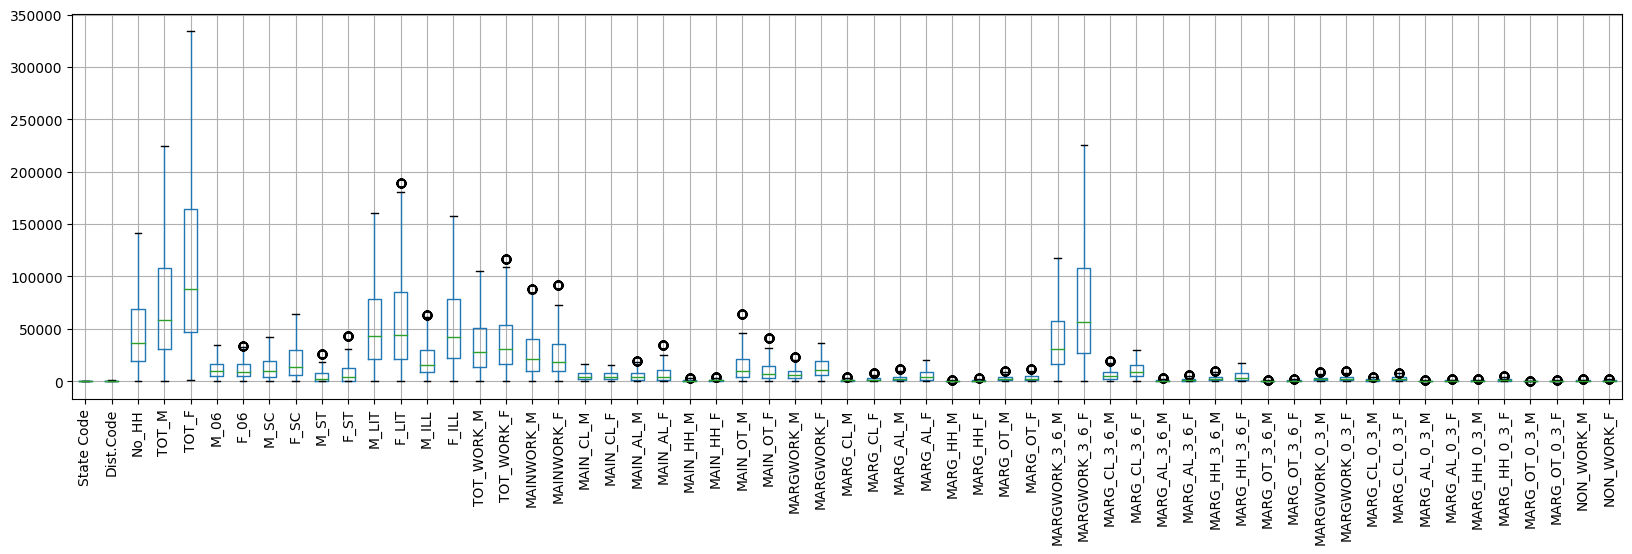

In [93]:
df_num.boxplot(figsize=(20,5))
plt.xticks(rotation=90)
plt.show()

In [94]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 59 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State Code      640 non-null    int64  
 1   Dist.Code       640 non-null    int64  
 2   No_HH           640 non-null    float64
 3   TOT_M           640 non-null    float64
 4   TOT_F           640 non-null    float64
 5   M_06            640 non-null    float64
 6   F_06            640 non-null    float64
 7   M_SC            640 non-null    float64
 8   F_SC            640 non-null    float64
 9   M_ST            640 non-null    float64
 10  F_ST            640 non-null    float64
 11  M_LIT           640 non-null    float64
 12  F_LIT           640 non-null    float64
 13  M_ILL           640 non-null    float64
 14  F_ILL           640 non-null    float64
 15  TOT_WORK_M      640 non-null    float64
 16  TOT_WORK_F      640 non-null    float64
 17  MAINWORK_M      640 non-null    flo

In [95]:
from scipy.stats import zscore
df_num_scaled=df_num.apply(zscore)
df_num_scaled.head()

State Code  Dist.Code     No_HH     TOT_M     TOT_F      M_06      F_06  \
0   -1.710782  -1.729347 -1.041642 -0.885319 -0.944698 -0.624961 -0.559565   
1   -1.710782  -1.723934 -1.079714 -0.949965 -1.018470 -0.774401 -0.830782   
2   -1.710782  -1.718521 -1.124868 -1.171610 -1.152239 -1.142585 -1.129747   
3   -1.710782  -1.713109 -1.204950 -1.235559 -1.226717 -1.198788 -1.167297   
4   -1.710782  -1.707696 -0.940721 -0.932864 -0.942659 -0.701305 -0.736742   

       M_SC      F_SC      M_ST  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  \
0 -1.088133 -1.086934 -0.489103  ...      -0.125546      -0.856600   
1 -1.087801 -1.086603 -0.700845  ...      -0.687402      -0.872659   
2 -1.088133 -1.086603  0.023684  ...      -1.056879      -1.121574   
3 -1.088382 -1.086934 -0.399261  ...      -0.984962      -1.093707   
4 -1.086722 -1.085112  0.274757  ...      -0.373662      -0.299729   

   MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  \
0      -0.140449      -0.417314       0.292457      -0.747836      -0.433762   
1      -0.359482      -0.431807      -0.579336      -0.828396       0.156122   
2      -0.663055      -0.685421      -0.902288      -0.916703      -0.862768   
3      -0.597729      -0.614772      -0.884640      -0.904309      -0.809142   
4       0.954718       1.042782      -0.545806      -0.709105      -0.541013   

   MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
0      -0.720534   -0.485320   -0.731633  
1       0.040267   -0.753381   -0.825245  
2      -0.962607   -0.919215   -0.996869  
3      -0.928025   -0.807902   -1.000336  
4      -0.380479   -0.662513   -0.273970  

[5 rows x 59 columns]

In [96]:
df_num_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 59 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State Code      640 non-null    float64
 1   Dist.Code       640 non-null    float64
 2   No_HH           640 non-null    float64
 3   TOT_M           640 non-null    float64
 4   TOT_F           640 non-null    float64
 5   M_06            640 non-null    float64
 6   F_06            640 non-null    float64
 7   M_SC            640 non-null    float64
 8   F_SC            640 non-null    float64
 9   M_ST            640 non-null    float64
 10  F_ST            640 non-null    float64
 11  M_LIT           640 non-null    float64
 12  F_LIT           640 non-null    float64
 13  M_ILL           640 non-null    float64
 14  F_ILL           640 non-null    float64
 15  TOT_WORK_M      640 non-null    float64
 16  TOT_WORK_F      640 non-null    float64
 17  MAINWORK_M      640 non-null    flo

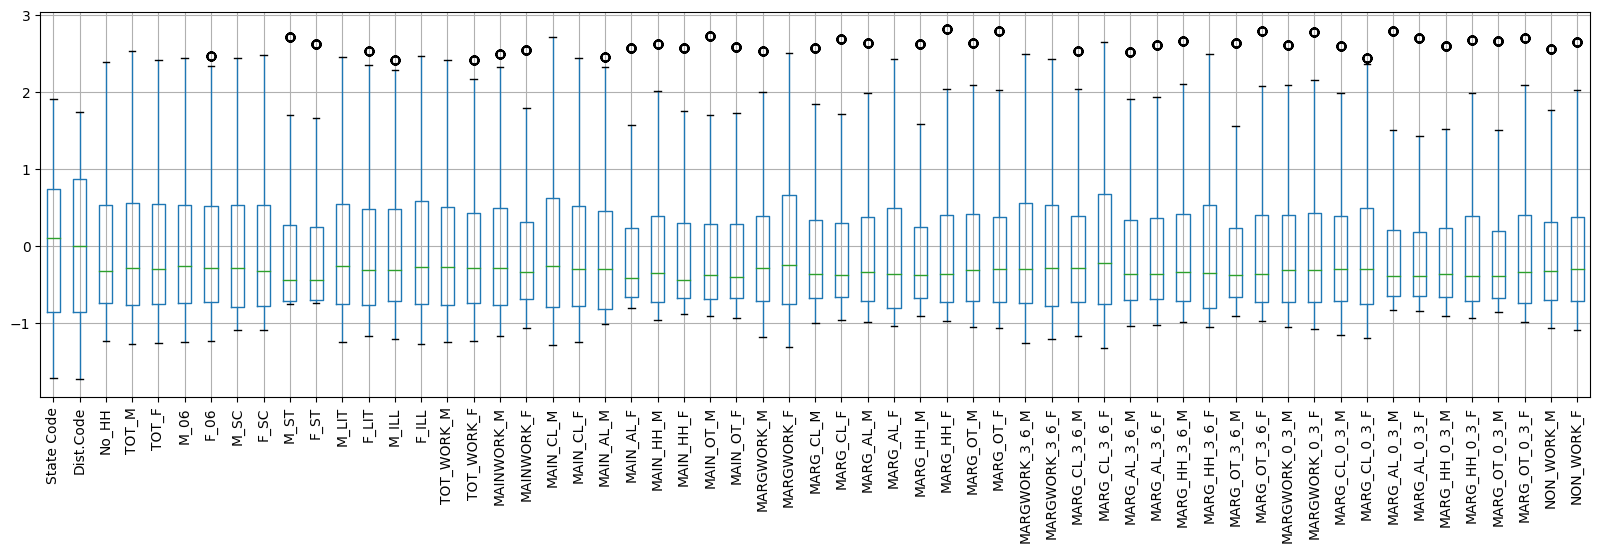

In [97]:
df_num_scaled.boxplot(figsize=(20,5))
plt.xticks(rotation=90)
plt.show()

In [98]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_num_scaled)
kmo_model

0.9449981830784535

In [99]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6, random_state=123)
df_pca = pca.fit_transform(df_num_scaled)
df_pca.transpose()

array([[-5.54451422, -5.56785826, -7.28396124, ..., -7.47377299,
        -7.42306338, -7.00408475],
       [ 0.97352942,  0.6244142 ,  0.36046801, ..., -1.41367436,
        -1.4320993 , -1.77671815],
       [-2.12473517, -2.56996669, -1.25786273, ...,  0.16994905,
         0.2179821 ,  0.12381622],
       [-1.08634315, -1.48865698, -0.04405209, ..., -1.23810886,
        -0.85358124, -0.75066449],
       [ 0.14945166, -0.11727734,  0.12045278, ...,  0.99072678,
         0.7918747 ,  0.91306269],
       [ 0.98518329, -0.17173854,  0.83888088, ..., -1.55651128,
        -1.32843098, -1.20372908]])

In [100]:
pca.components_

array([[ 0.02974329,  0.0297866 ,  0.15107972,  0.16096151,  0.16015736,
         0.1578286 ,  0.15817826,  0.14473544,  0.14501669,  0.02154826,
         0.02037201,  0.15717239,  0.14715112,  0.1554733 ,  0.1596483 ,
         0.15562513,  0.14340484,  0.14302325,  0.12319015,  0.11099582,
         0.08262729,  0.11940346,  0.08617767,  0.1407821 ,  0.13030329,
         0.12025251,  0.11461378,  0.15724499,  0.14961366,  0.08713042,
         0.06101739,  0.1273329 ,  0.11602752,  0.14243629,  0.14093902,
         0.15076292,  0.14671324,  0.15965759,  0.15785071,  0.15810967,
         0.15008804,  0.09376298,  0.06294847,  0.12843837,  0.11371619,
         0.14222327,  0.13974449,  0.15076465,  0.14725721,  0.1430377 ,
         0.1348468 ,  0.06142822,  0.0532304 ,  0.11789123,  0.11343071,
         0.13877207,  0.14119055,  0.14683885,  0.14084168],
       [-0.17527833, -0.17162717, -0.11927801, -0.06695545, -0.08870129,
        -0.00648756, -0.0019427 , -0.06303194, -0.07728715,  0.

In [101]:
var_exp = pca.explained_variance_ratio_

In [102]:
pca.explained_variance_ratio_

array([0.59323452, 0.13703069, 0.0764248 , 0.04951909, 0.03514954,
       0.02100913])

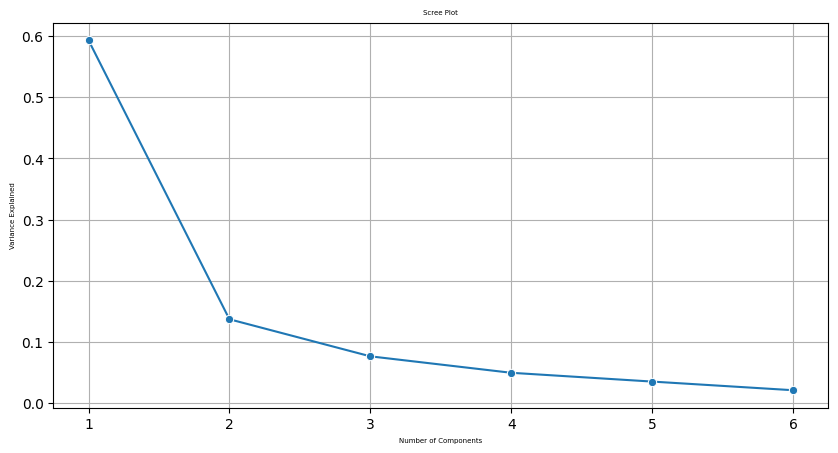

In [103]:
plt.figure(figsize=(10,5))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=5)
plt.ylabel('Variance Explained',fontsize=5)
plt.title('Scree Plot',fontsize=5)
plt.grid()
plt.show()

In [104]:
df_pca_loading = pd.DataFrame(pca.components_,columns=list(df_num_scaled))
df_pca_loading.shape

(6, 59)

In [105]:
df_pca_loading

State Code  Dist.Code     No_HH     TOT_M     TOT_F      M_06      F_06  \
0    0.029743   0.029787  0.151080  0.160962  0.160157  0.157829  0.158178   
1   -0.175278  -0.171627 -0.119278 -0.066955 -0.088701 -0.006488 -0.001943   
2    0.288158   0.292897  0.072334 -0.051553  0.009758 -0.075749 -0.068249   
3   -0.009819  -0.031949  0.075172  0.050070  0.067510  0.026877  0.014418   
4    0.158903   0.146417 -0.030907 -0.060668 -0.041658 -0.080527 -0.074534   
5   -0.283650  -0.279246 -0.013557  0.109015  0.047796  0.152277  0.143192   

       M_SC      F_SC      M_ST  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  \
0  0.144735  0.145017  0.021548  ...       0.143038       0.134847   
1 -0.063032 -0.077287  0.028022  ...       0.144434       0.156493   
2 -0.065812 -0.011057  0.291526  ...      -0.063196       0.069455   
3  0.008673  0.014209  0.085193  ...      -0.018909       0.013908   
4 -0.183449 -0.174440  0.334440  ...       0.109374       0.122452   
5  0.069172  0.011837  0.272645  ...       0.047684      -0.009556   

   MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  \
0       0.061428       0.053230       0.117891       0.113431       0.138772   
1       0.275541       0.277429       0.180640       0.158771       0.081142   
2      -0.044645      -0.019248       0.036193       0.172005      -0.127912   
3       0.220976       0.260952      -0.234994      -0.182651      -0.170230   
4       0.008954      -0.006585       0.011760       0.046002       0.030311   
5      -0.073467      -0.084383       0.100262       0.070607      -0.080035   

   MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
0       0.141191    0.146839    0.140842  
1       0.044858   -0.041381   -0.044872  
2      -0.077178   -0.121035   -0.029248  
3      -0.164267    0.031549    0.062814  
4       0.070425    0.206423    0.255082  
5      -0.270087    0.021354   -0.045374  

[6 rows x 59 columns]

In [106]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_num_scaled = scaler.fit_transform(df_num)

In [107]:
pca = PCA(n_components=None)
pca.fit(df_num_scaled)

PCA()

In [108]:
cumulative_var = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_var >= 0.9) + 1
print('Number of components required:', num_components)

Number of components required: 6


In [111]:
from matplotlib.patches import Rectangle

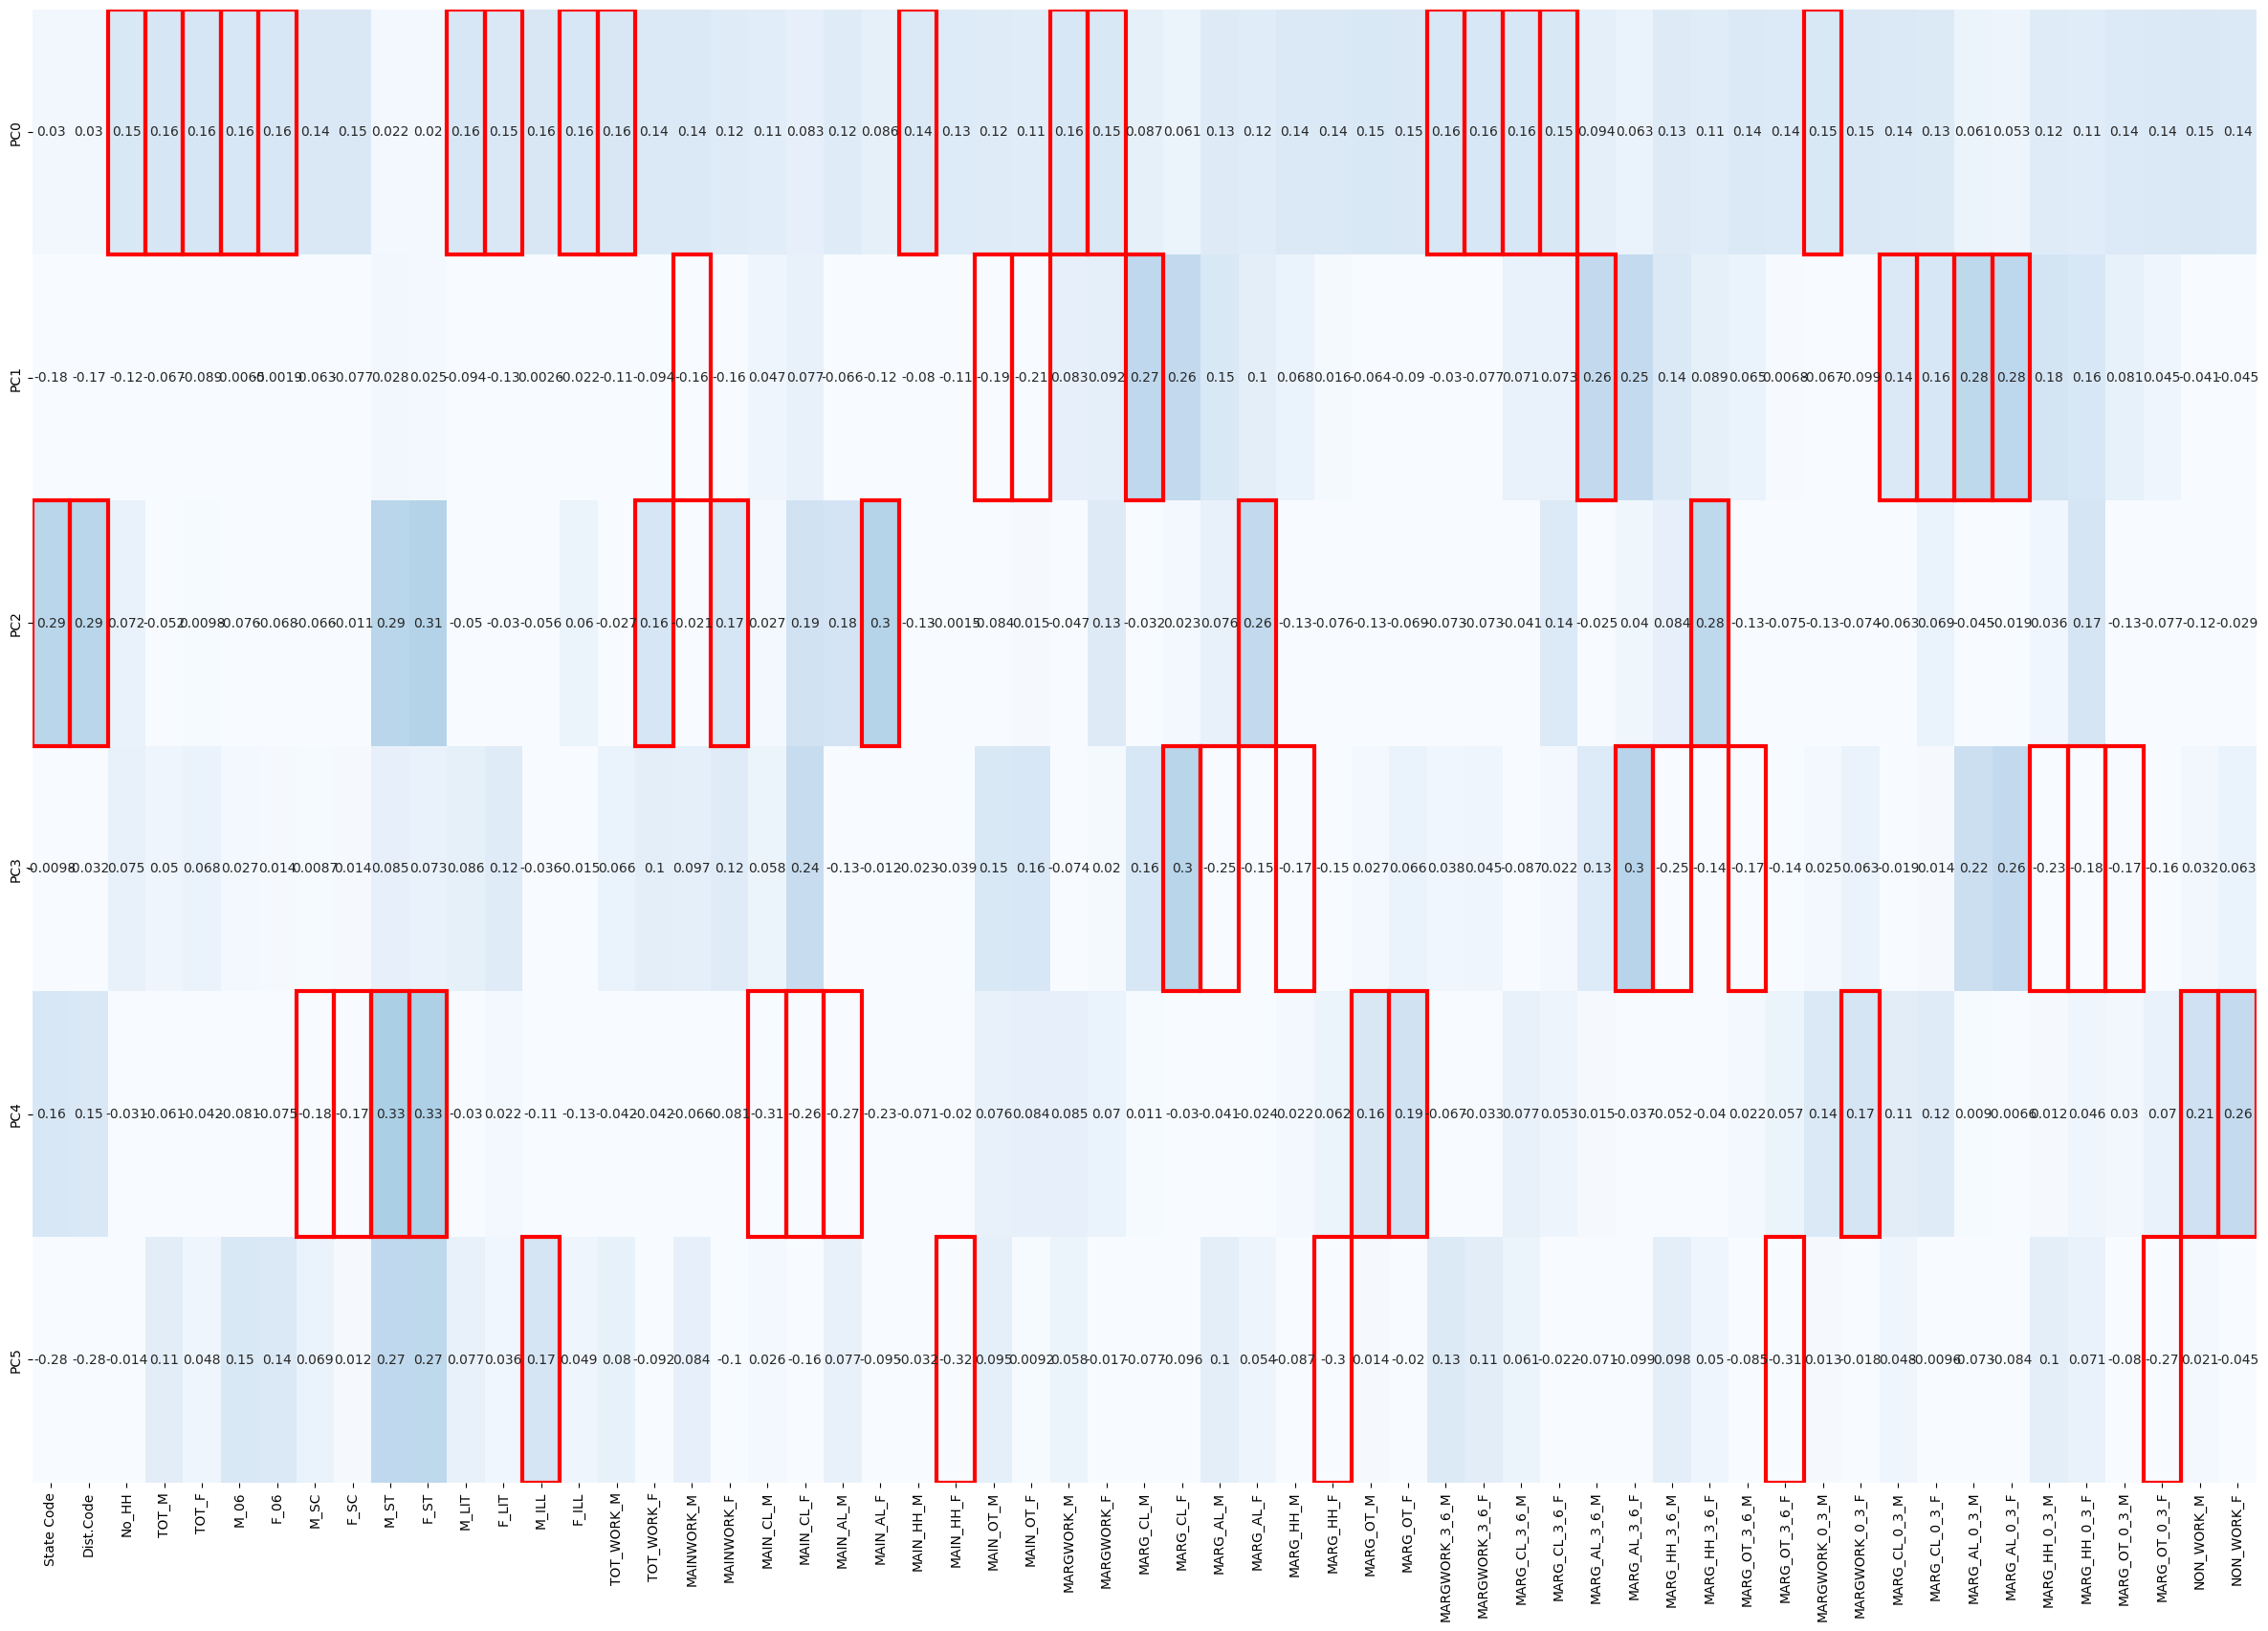

In [112]:
fig,ax = plt.subplots(figsize=(30, 20), facecolor='w', edgecolor='k')
ax = sns.heatmap(df_pca_loading, annot=True, vmax=1.0, vmin=0, cmap='Blues', cbar=False, fmt='.2g', ax=ax,
                 yticklabels=['PC0','PC1','PC2','PC3','PC4','PC5'])

column_max = df_pca_loading.abs().idxmax(axis=0)

for col, variable in enumerate(df_pca_loading.columns):
    position = df_pca_loading.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='red', lw=3))